# Data Preprocessing

In [1692]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import scipy.stats as ss

## Importing the Data

In [1693]:
df_train = pd.read_csv('train_data.csv')

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\4102572529.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train_data.csv')


Firstly we need to get a general idea of the data we are working with.

In [1694]:
df_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [1695]:
df_train.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


"WCIO Part Of Body Code" has a value of -9, which could be a mistake.

In [1696]:
df_train_minus_9 = df_train[df_train['WCIO Part Of Body Code'] == -9]
df_train_minus_9['WCIO Part Of Body Description'].unique()

array(['MULTIPLE'], dtype=object)

This could be a value that was the result of a wrong input, it could possibly be 9.

In [1697]:
df_train_9 = df_train[df_train['WCIO Part Of Body Code'] == 9]
df_train_9.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


Although it is unlikely the real value could actually be 90.

In [1698]:
df_train_90 = df_train[df_train['WCIO Part Of Body Code'] == 90]
df_train_90['WCIO Part Of Body Description'].unique()

array(['MULTIPLE BODY PARTS (INCLUDING BODY'], dtype=object)

No obvious connections can be found so this value will kept, if necessary it can later be changed into a positive value

The dataset regards the “New York Workers’ Compensation Board (WCB)”, an association that works in the state of New York, and covers work accidents (volunteer work included). In the state of New York there is no maximum age for volunteer work, nor is there a minimum wage requirement, though the earliest opportunities for children that  the group could find, only start at 3 years of age (and they can only attend if they are accompanied by chaperone). With this information in mind, it is safe to assume that any observations under the age of 3 (and different from 0) are most likely errors, and therefore can be removed. As for the values above 100 years of age, although unlikely, these observations have no clear reason that would mean their removal, as so they will be kept. Values equal to 0 will be handled in the data cleaning phase.

References:

https://www.volunteernewyork.org/youth-families

https://workerscompensationexperts.org/law/state/new-york/

https://www.thesilvermanfirm.com/workers-compensation-claims/workers-compensation-faqs/

https://www.wcb.ny.gov/

In [1699]:
df_train = df_train[(df_train['Age at Injury'] == 0) | (df_train['Age at Injury'] >= 3)]

The next step is looking and null/missing values, and trying to understand if these observations are missing at random or not.

In [1700]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574024 entries, 0 to 593467
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570335 non-null  object 
 1   Age at Injury                       574024 non-null  float64
 2   Alternative Dispute Resolution      574024 non-null  object 
 3   Assembly Date                       574024 non-null  object 
 4   Attorney/Representative             574024 non-null  object 
 5   Average Weekly Wage                 545374 non-null  float64
 6   Birth Year                          544946 non-null  float64
 7   C-2 Date                            559464 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574024 non-null  object 
 10  Carrier Type                        574024 non-null  object 
 11  Claim Identifier               

It possible to observe see that in certain columns a majority of the values are null. Further research is ncessary to understand the extent of the missing values.

In [1701]:
missing_values_count = df_train.isna().sum()
missing_values_percentage = df_train.isna().sum() / df_train.shape[0] * 100
missing_values_table = pd.DataFrame({'Missing Values Count': missing_values_count,'Missing Values Percentage': missing_values_percentage})
missing_values_table

,Missing Values Count,Missing Values Percentage
Accident Date,3689,0.642656
Age at Injury,0,0.000000
Alternative Dispute Resolution,0,0.000000
Assembly Date,0,0.000000
Attorney/Representative,0,0.000000
Average Weekly Wage,28650,4.991081
Birth Year,29078,5.065642
C-2 Date,14560,2.536479
C-3 Date,386779,67.380284
Carrier Name,0,0.000000


The variable "OIICS Nature of Injury Description" is completly empty, so it will be removed.

There are also a high percentage of NA values (more than 30%) in a some other variables, to impute these columns would mean that most of the data had been created instead of collected, which could skew the data. The best course of action is to remove these columns. 

In [1702]:
df_train = df_train.drop(columns=['OIICS Nature of Injury Description', 'C-3 Date', 'First Hearing Date', 'IME-4 Count'])

In [1703]:
len(df_train)

574024

It is also necessary to check for suplicate values

In [1704]:
df_train[df_train.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


No duplicates.

Some of the variables have the wrong data type, such as date variables saved as objects and integer values saved as floats, this issues will be fixed in order to obtain better visualizations. 

In [1705]:
int_list = ['Age at Injury', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']
for i in int_list:
    df_train[i] = pd.to_numeric(df_train[i], errors='coerce').astype('Int64')

In [1706]:
date_list = ['Accident Date', 'Assembly Date', 'C-2 Date']
for i in date_list:
    df_train[i] = pd.to_datetime(df_train[i], errors='coerce')

# Visualization

### Wide View of Numeric Variables

Simply creating histograms and boxplots for the numeric variables can give important insights.

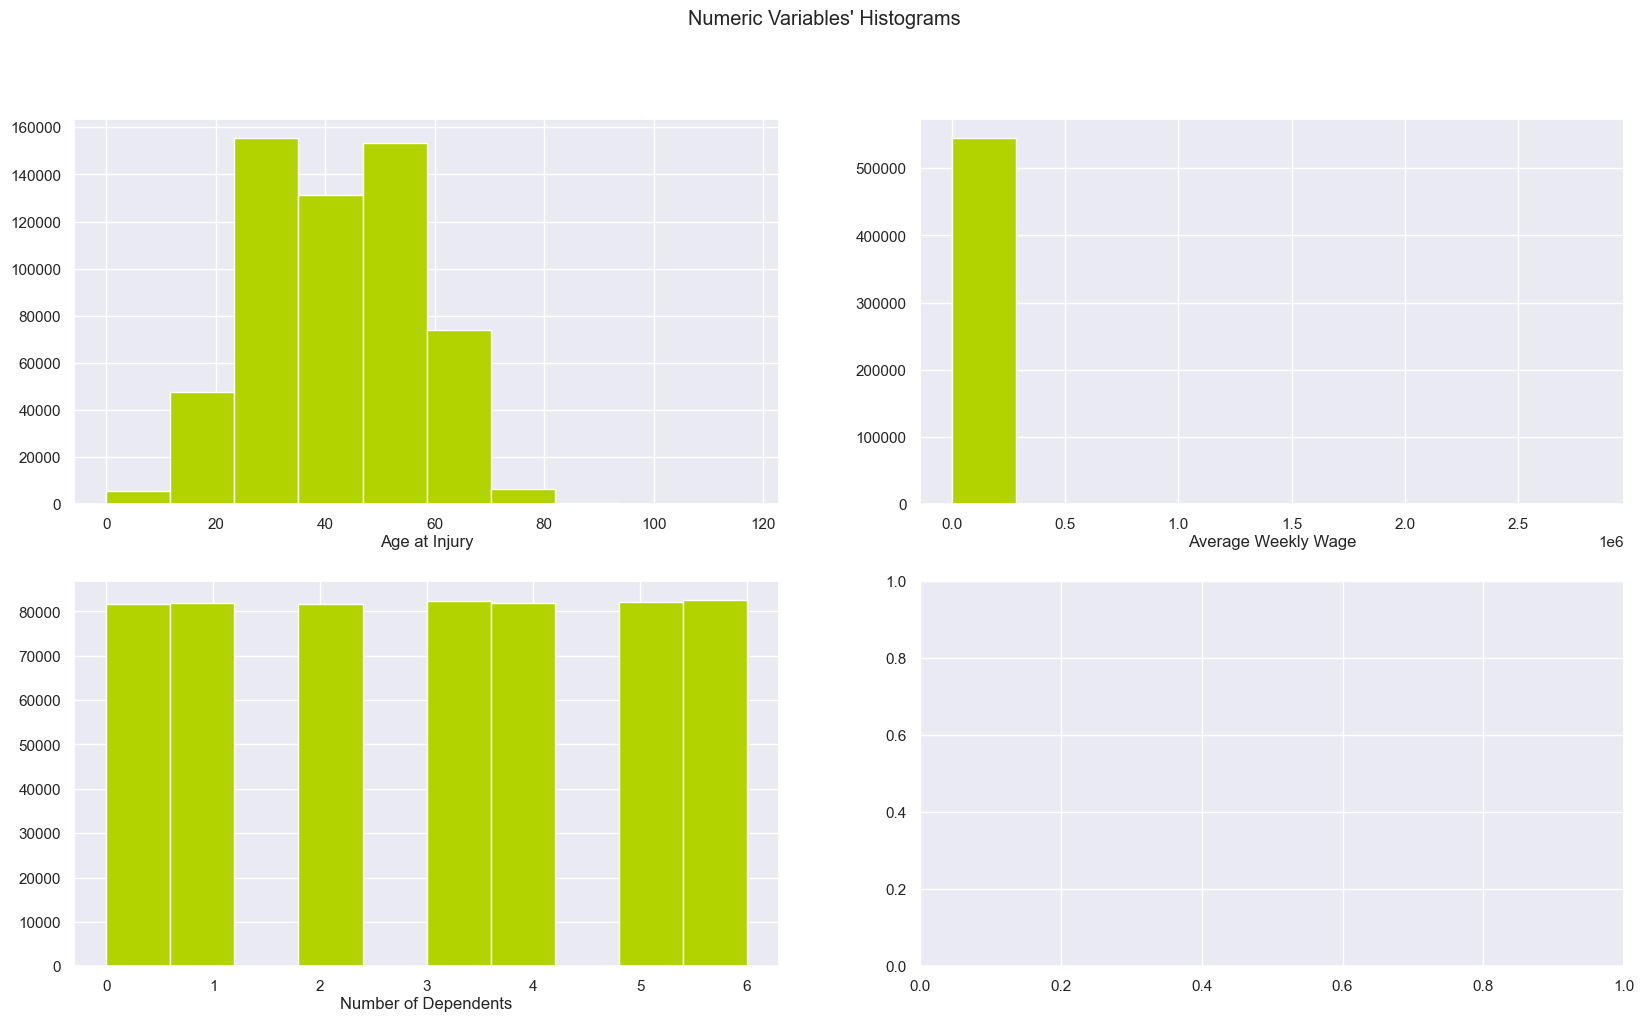

In [1707]:
metric_features = ['Age at Injury', 'Average Weekly Wage', 'Number of Dependents']
df = df_train

sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df[feat], color= '#B2D300')
    ax.set_title(feat, y=-0.13)
plt.suptitle("Numeric Variables' Histograms")
plt.show()

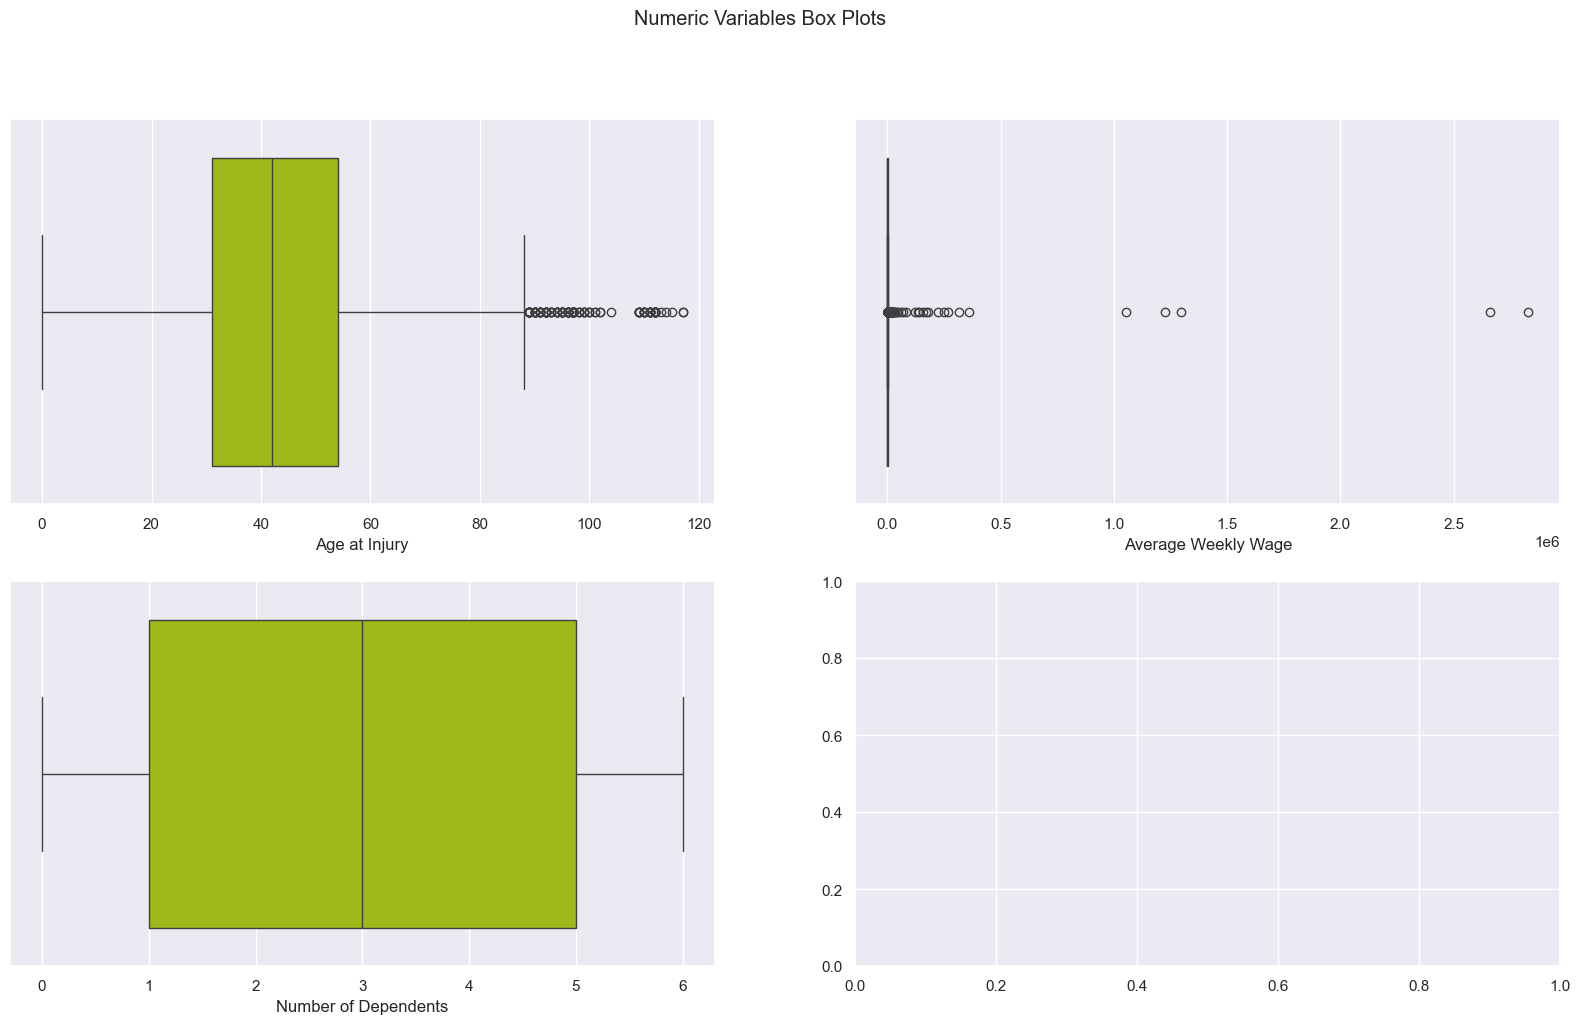

In [1708]:
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax, color= '#B2D300')
plt.suptitle("Numeric Variables Box Plots")
plt.show()

Average Weekly Wage seems to be skewed, later on in the notebook more research will be conducted to understand this variable.

### Dates

Dates can yeld important insights regarding periodicity in the data (for example, tourims tends to rise in summer and lower in winter).

A plot with the frequency of accidents per year and month for every year in the data set could show these tendencies.

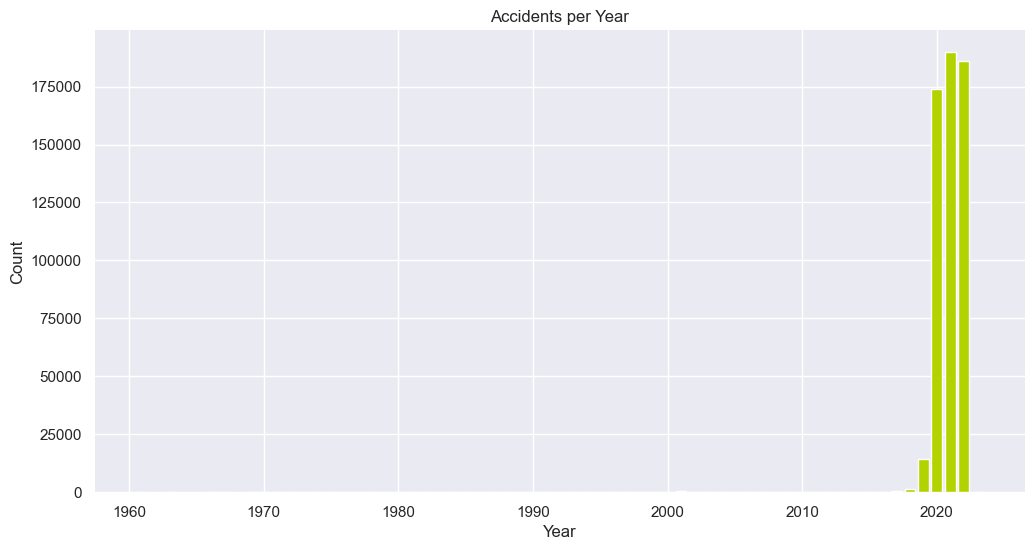

In [1709]:
accidents_per_year = df_train['Accident Date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(accidents_per_year.index, accidents_per_year.values, color='#B2D300')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Accidents per Year')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

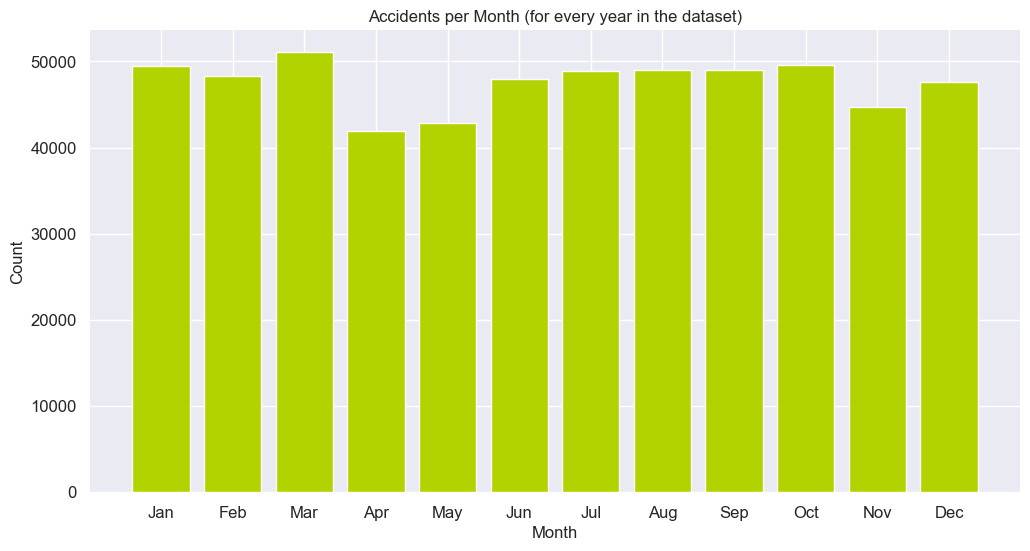

In [1710]:
year_counts = df_train['Accident Date'].groupby(df_train['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (for every year in the dataset)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

There seems to be a slight decrease in March and April, but most of the data regards the years of 2020, 2021 and 2021, so a plot for these years could be more revealing

In [1711]:
df_train_recent = df_train[df_train['Accident Date'].dt.year.isin([2020, 2021, 2022])]

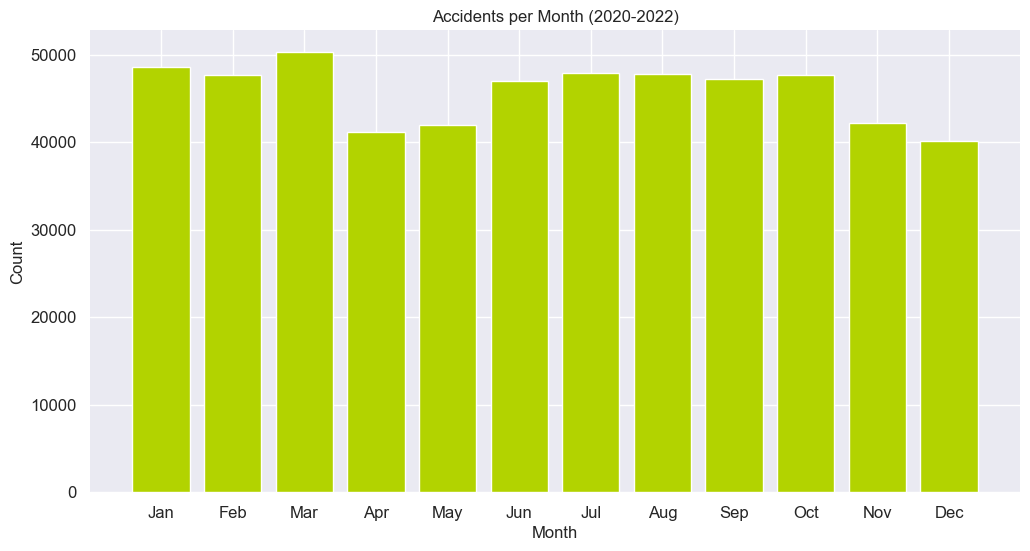

In [1712]:
year_counts = df_train_recent['Accident Date'].groupby(df_train_recent['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (2020-2022)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Only decemeber seems to have changed in the recent years, showing a small decrease. To be more specific bar chart for each year can be created

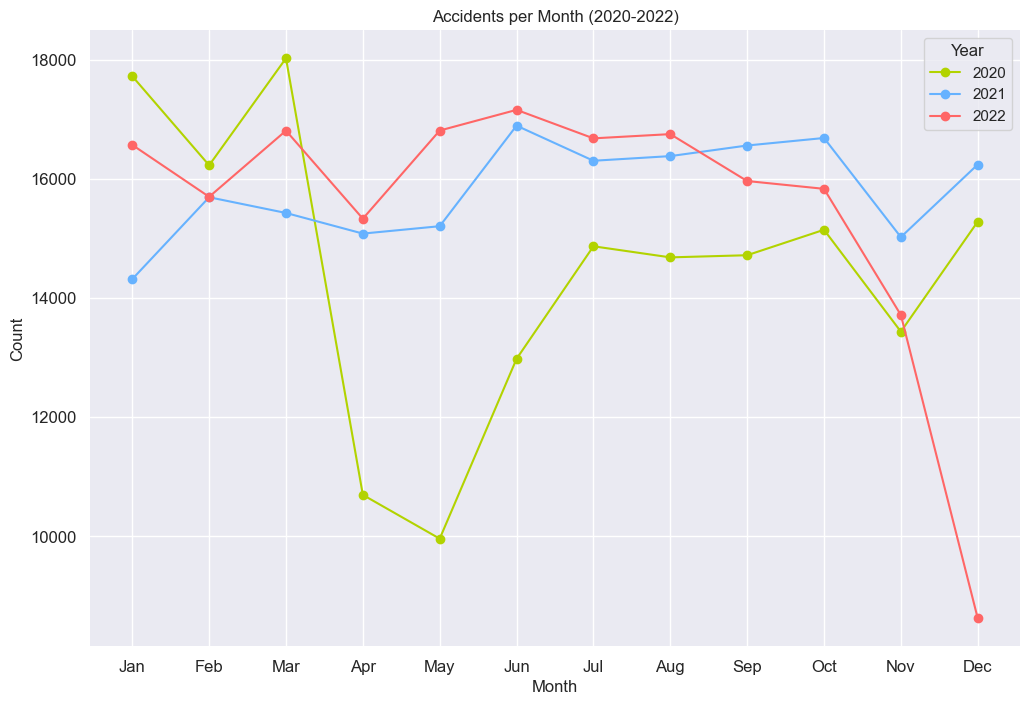

In [1713]:
plt.figure(figsize=(12, 8))
years_list = [2020, 2021, 2022, 2023]
colors = ['#B2D300', '#66B2FF', '#FF6666']
for year, color in zip(years_list, colors):
    year_counts = df_train[df_train['Accident Date'].dt.year == year]['Accident Date'].dt.month.value_counts().sort_index()
    plt.plot(year_counts.index, year_counts.values, marker='o', label=str(year), color=color)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (2020-2022)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(title='Year')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

There seems to be no recognizable pattern in these years.

A look into the years before 2020, the minority subset, could explain the decrease in december in the more recent past.

In [1714]:
df_train_older = df_train[df_train['Accident Date'].dt.year < 2020]

In [1715]:
df_train_older

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31,N,2020-01-01,N,0.00,1988.0,2019-12-31,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,...,27,FROM LIQUID OR GREASE SPILLS,10,CONTUSION,62,BUTTOCKS,13662,0,Not Work Related,1
1,2019-08-30,46,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,...,97,REPETITIVE MOTION,49,SPRAIN OR TEAR,38,SHOULDER(S),14569,1,Not Work Related,4
2,2019-12-06,40,N,2020-01-01,N,1434.80,1979.0,2020-01-01,INDEMNITY INSURANCE CO OF,1A. PRIVATE,...,79,OBJECT BEING LIFTED OR HANDLED,7,CONCUSSION,10,MULTIPLE HEAD INJURY,12589,0,Not Work Related,6
4,2019-12-30,61,N,2020-01-01,N,NaN,1958.0,2019-12-31,STATE INSURANCE FUND,2A. SIF,...,16,"HAND TOOL, UTENSIL; NOT POWERED",43,PUNCTURE,36,FINGER(S),12603,0,Not Work Related,1
5,2019-12-26,67,N,2020-01-01,N,0.00,1952.0,2019-12-31,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,...,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,38,SHOULDER(S),11772,0,Not Work Related,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592648,2019-09-06,109,N,2022-12-29,N,0.00,1910.0,2022-12-29,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,...,85,ANIMAL OR INSECT,43,PUNCTURE,32,ELBOW,11212,0,Not Work Related,0
592680,2019-09-03,20,N,2022-12-29,N,0.00,1999.0,2022-12-29,EVEREST NATIONAL INS COMPANY,1A. PRIVATE,...,99,"OTHER - MISCELLANEOUS, NOC",59,"ALL OTHER SPECIFIC INJURIES, NOC",16,TEETH,11717,0,Not Work Related,6
593136,1980-05-17,45,N,2022-12-30,N,0.00,1935.0,2022-12-30,INFINITY ASSURANCE INS. CO.,1A. PRIVATE,...,29,ON SAME LEVEL,52,STRAIN OR TEAR,42,LOWER BACK AREA,11766,0,Not Work Related,1
593212,2019-07-05,21,N,2022-12-30,N,0.00,1998.0,2022-12-30,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,...,16,"HAND TOOL, UTENSIL; NOT POWERED",40,LACERATION,34,WRIST,11706,0,Not Work Related,5


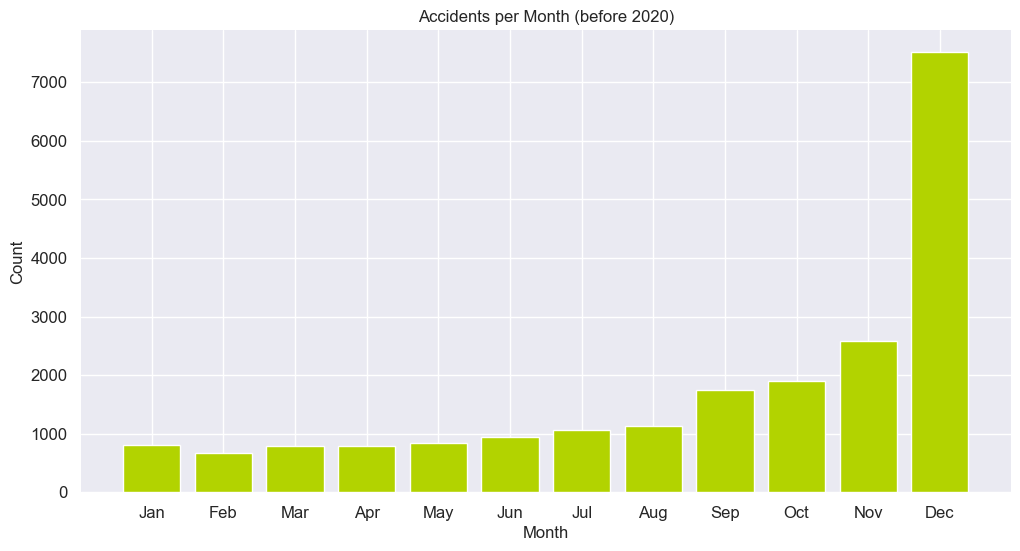

In [1716]:
year_counts = df_train_older['Accident Date'].groupby(df_train_older['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (before 2020)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [1717]:
most_common_year_month = df_train_older['Accident Date'].dt.to_period('M').value_counts().idxmax()
most_common_year_month

Period('2019-12', 'M')

The explosive rise in the month of december can be explained by the the date '2019-12' which is the closest date to when the colection of data starts to grow.

### Claim Types

What are the unique values of the target variable?

In [1718]:
df_train['Claim Injury Type'].unique()

array(['2. NON-COMP', '4. TEMPORARY', '3. MED ONLY', '5. PPD SCH LOSS',
       '6. PPD NSL', '1. CANCELLED', '8. DEATH', '7. PTD'], dtype=object)

This is how the target variable works:

Cancelled – The claim is canceled if it was assembled by mistake or identified as a duplicate of an existing claim.

Non-Comp – No indemnity (financial) benefits are awarded for the claim, meaning the worker is not compensated beyond the claim itself.

Med Only – Only medical benefits are awarded, covering treatment and healthcare costs without additional financial compensation for lost time.

Temporary – The claim provides temporary total or partial disability benefits for the period the worker is unable to work due to injury.

PPD Sch Loss – The claim awards a Permanent Partial Disability benefit for a scheduled body part (e.g., hand, leg) where there’s a specific schedule of compensation.

PPD NSL – The claim awards a Permanent Partial Disability benefit for a non-scheduled body part, such as the neck or back, without a specific compensation schedule.

PTD – Permanent Total Disability benefits are awarded, providing lifetime compensation because the worker is unable to return to work due to the injury.

Death – Death benefits are awarded under WCL §16 due to a worker’s death, providing financial support to dependents.

(https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data)

How are these values distributed?

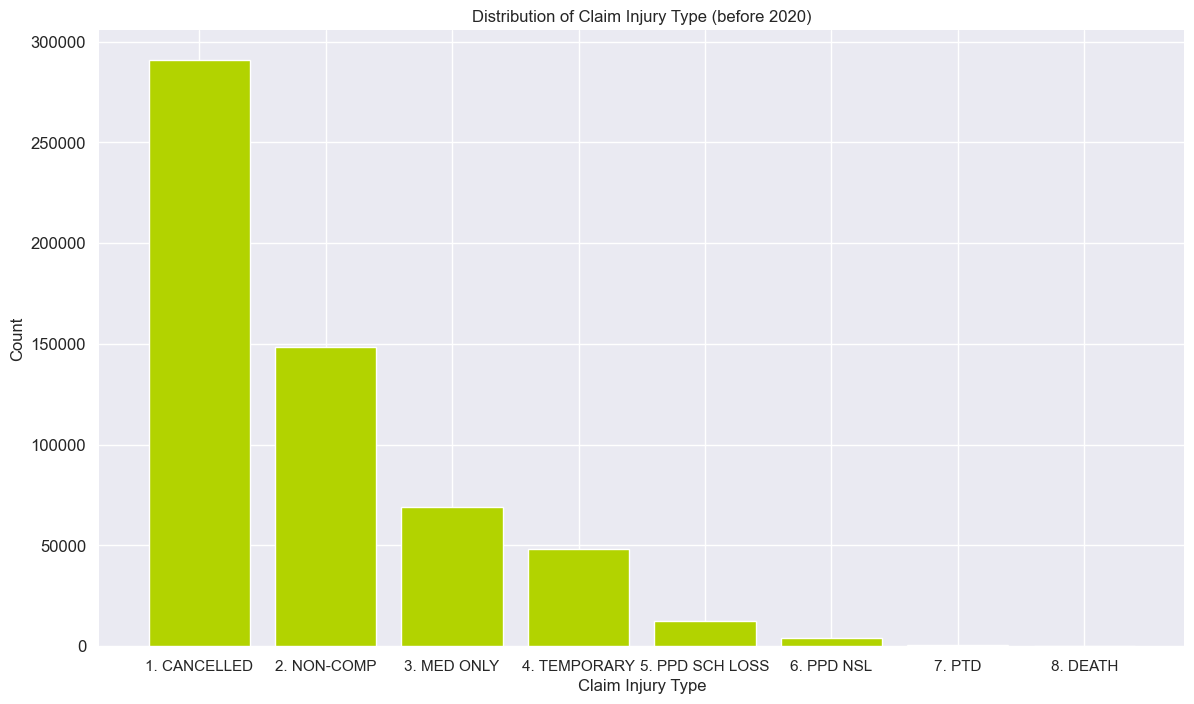

In [1719]:
claim_injury_counts = df_train['Claim Injury Type'].value_counts()
plt.figure(figsize=(14, 8))
bars = plt.bar(claim_injury_counts.index, claim_injury_counts.values, color='#B2D300')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type (before 2020)')
plt.yticks(fontsize=12)
plt.grid(True)
ax = plt.gca()
plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Our dataset is dominated by the first category in such a way that the 7th and 8th categories look like they are empty.

In [1720]:
claim_injury_table = df_train['Claim Injury Type'].value_counts().reset_index()
claim_injury_table.columns = ['Claim Injury Type', 'Count']

claim_injury_table['Claim Injury Type'] = claim_injury_table['Claim Injury Type'].astype(str)
claim_injury_table = claim_injury_table.sort_values(by='Claim Injury Type', key=lambda inj_type: inj_type.str.split('.').str[0].astype(int))
claim_injury_table.reset_index(drop=True, inplace=True)
claim_injury_table

,Claim Injury Type,Count
0,1. CANCELLED,12477
1,2. NON-COMP,291076
2,3. MED ONLY,68906
3,4. TEMPORARY,148507
4,5. PPD SCH LOSS,48280
5,6. PPD NSL,4211
6,7. PTD,97
7,8. DEATH,470


The table allows a different view where the minority can still be seen.

### Attorney VS No Attorney

In the real world the presence of a lawyer can sometimes change the outcome of a insurance claim, how is that presence is distributed by the types of claims

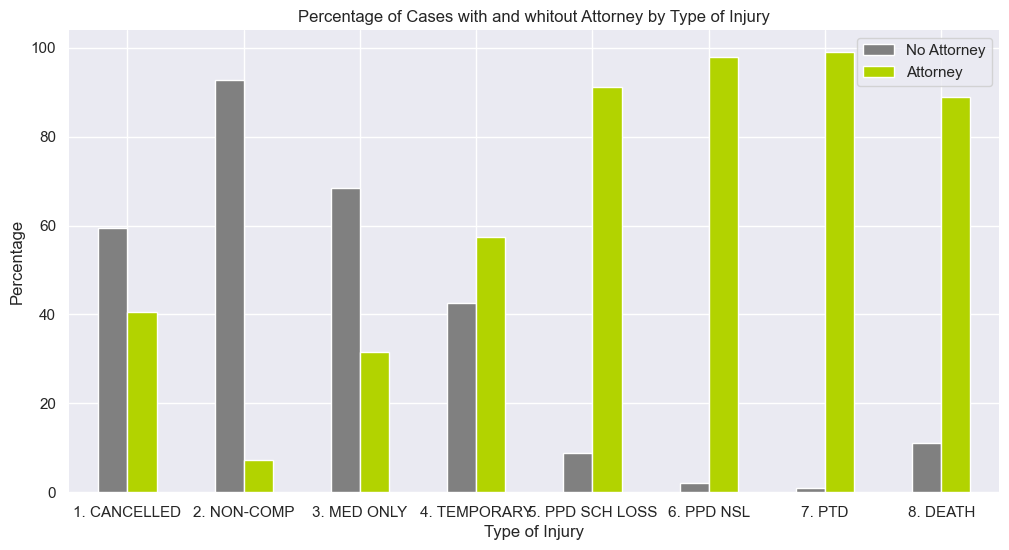

In [1721]:
claim_injury_by_attorney = pd.crosstab(df_train['Claim Injury Type'], df_train['Attorney/Representative'])
claim_injury_by_attorney.columns = ['No Attorney', 'Attorney']
claim_injury_by_attorney.reset_index(inplace=True)
claim_injury_by_attorney['Attorney'] = claim_injury_by_attorney['Attorney'] / (claim_injury_by_attorney['No Attorney'] + claim_injury_by_attorney['Attorney']) * 100
claim_injury_by_attorney['No Attorney'] = 100 - claim_injury_by_attorney['Attorney']
claim_injury_by_attorney
claim_injury_by_attorney.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Type of Injury')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and whitout Attorney by Type of Injury')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()


This graph shows that as the severity of cases increases so does the percentage of cases where a laywer is present

### Ages

Ages will be grouped in order to obtain visualizations that are more meaingful and easier to read

In [1722]:
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 130)
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '+100']
df_train['age_group'] = pd.cut(df_train['Age at Injury'], bins=bins, labels=labels)

In [1723]:
age_group_counts = df_train['age_group'].value_counts().sort_index()
age_group_counts_percentage = age_group_counts / age_group_counts.sum() * 100
age_group_table = pd.DataFrame({'Age Group': age_group_counts.index,'Count': age_group_counts.values,'Percentage': age_group_counts_percentage.values})
age_group_table['Age Group'] = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
age_group_table

,Age Group,Count,Percentage
0,0-10,18,0.003166
1,10-20,19056,3.351625
2,20-30,116489,20.488427
3,30-40,129612,22.796539
4,40-50,118033,20.759990
5,50-60,127283,22.386907
6,60-70,51167,8.999402
7,70-80,6111,1.074821
8,80-90,625,0.109927
9,90-100,166,0.029197


In [1724]:
df_zeros = df_train[df_train['Age at Injury'] == 0]
df_zeros.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,Claim Identifier,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,1775,5464.0,5464,5169.000000,5204.000000,3081,5.464000e+03,3983.0,2940.0,2937.0,2535.0,5464.0,5464.0
mean,2018-05-30 02:25:13.014084608,0.0,2021-05-19 05:29:57.364568064,70.099559,1238.161414,2021-06-11 06:30:15.774099712,5.734683e+06,50.708009,74.727891,53.292475,37.280473,0.068814,2.999817
min,1967-04-05 00:00:00,0.0,2020-01-02 00:00:00,0.000000,0.000000,1997-02-07 00:00:00,5.393794e+06,11.0,1.0,1.0,-9.0,0.0,0.0
25%,2020-01-07 00:00:00,0.0,2020-08-21 00:00:00,0.000000,0.000000,2020-10-08 00:00:00,5.541794e+06,42.0,56.0,37.0,13.0,0.0,1.0
50%,2020-09-29 00:00:00,0.0,2021-04-27 00:00:00,0.000000,1959.000000,2021-07-16 00:00:00,5.708605e+06,48.0,83.0,52.0,35.0,0.0,3.0
75%,2021-09-16 00:00:00,0.0,2022-02-03 00:00:00,0.000000,1967.000000,2022-05-03 00:00:00,5.912161e+06,62.0,98.0,72.0,53.0,0.0,5.0
max,2022-12-20 00:00:00,0.0,2022-12-30 00:00:00,5867.580000,2005.000000,2024-05-31 00:00:00,6.165637e+06,92.0,99.0,91.0,99.0,1.0,6.0
std,NaN,0.0,NaN,321.922818,949.243284,NaN,2.187567e+05,18.743996,27.188004,22.075821,26.238942,0.253161,1.980733


Most observations with 0 years of age dont have an "average weekly wage" and a sizable amount have 0 as their birth year.
For the ones who have a birth year, it is possible to calculate their age at the time of the accident, this is something to be done in the data cleaning section.

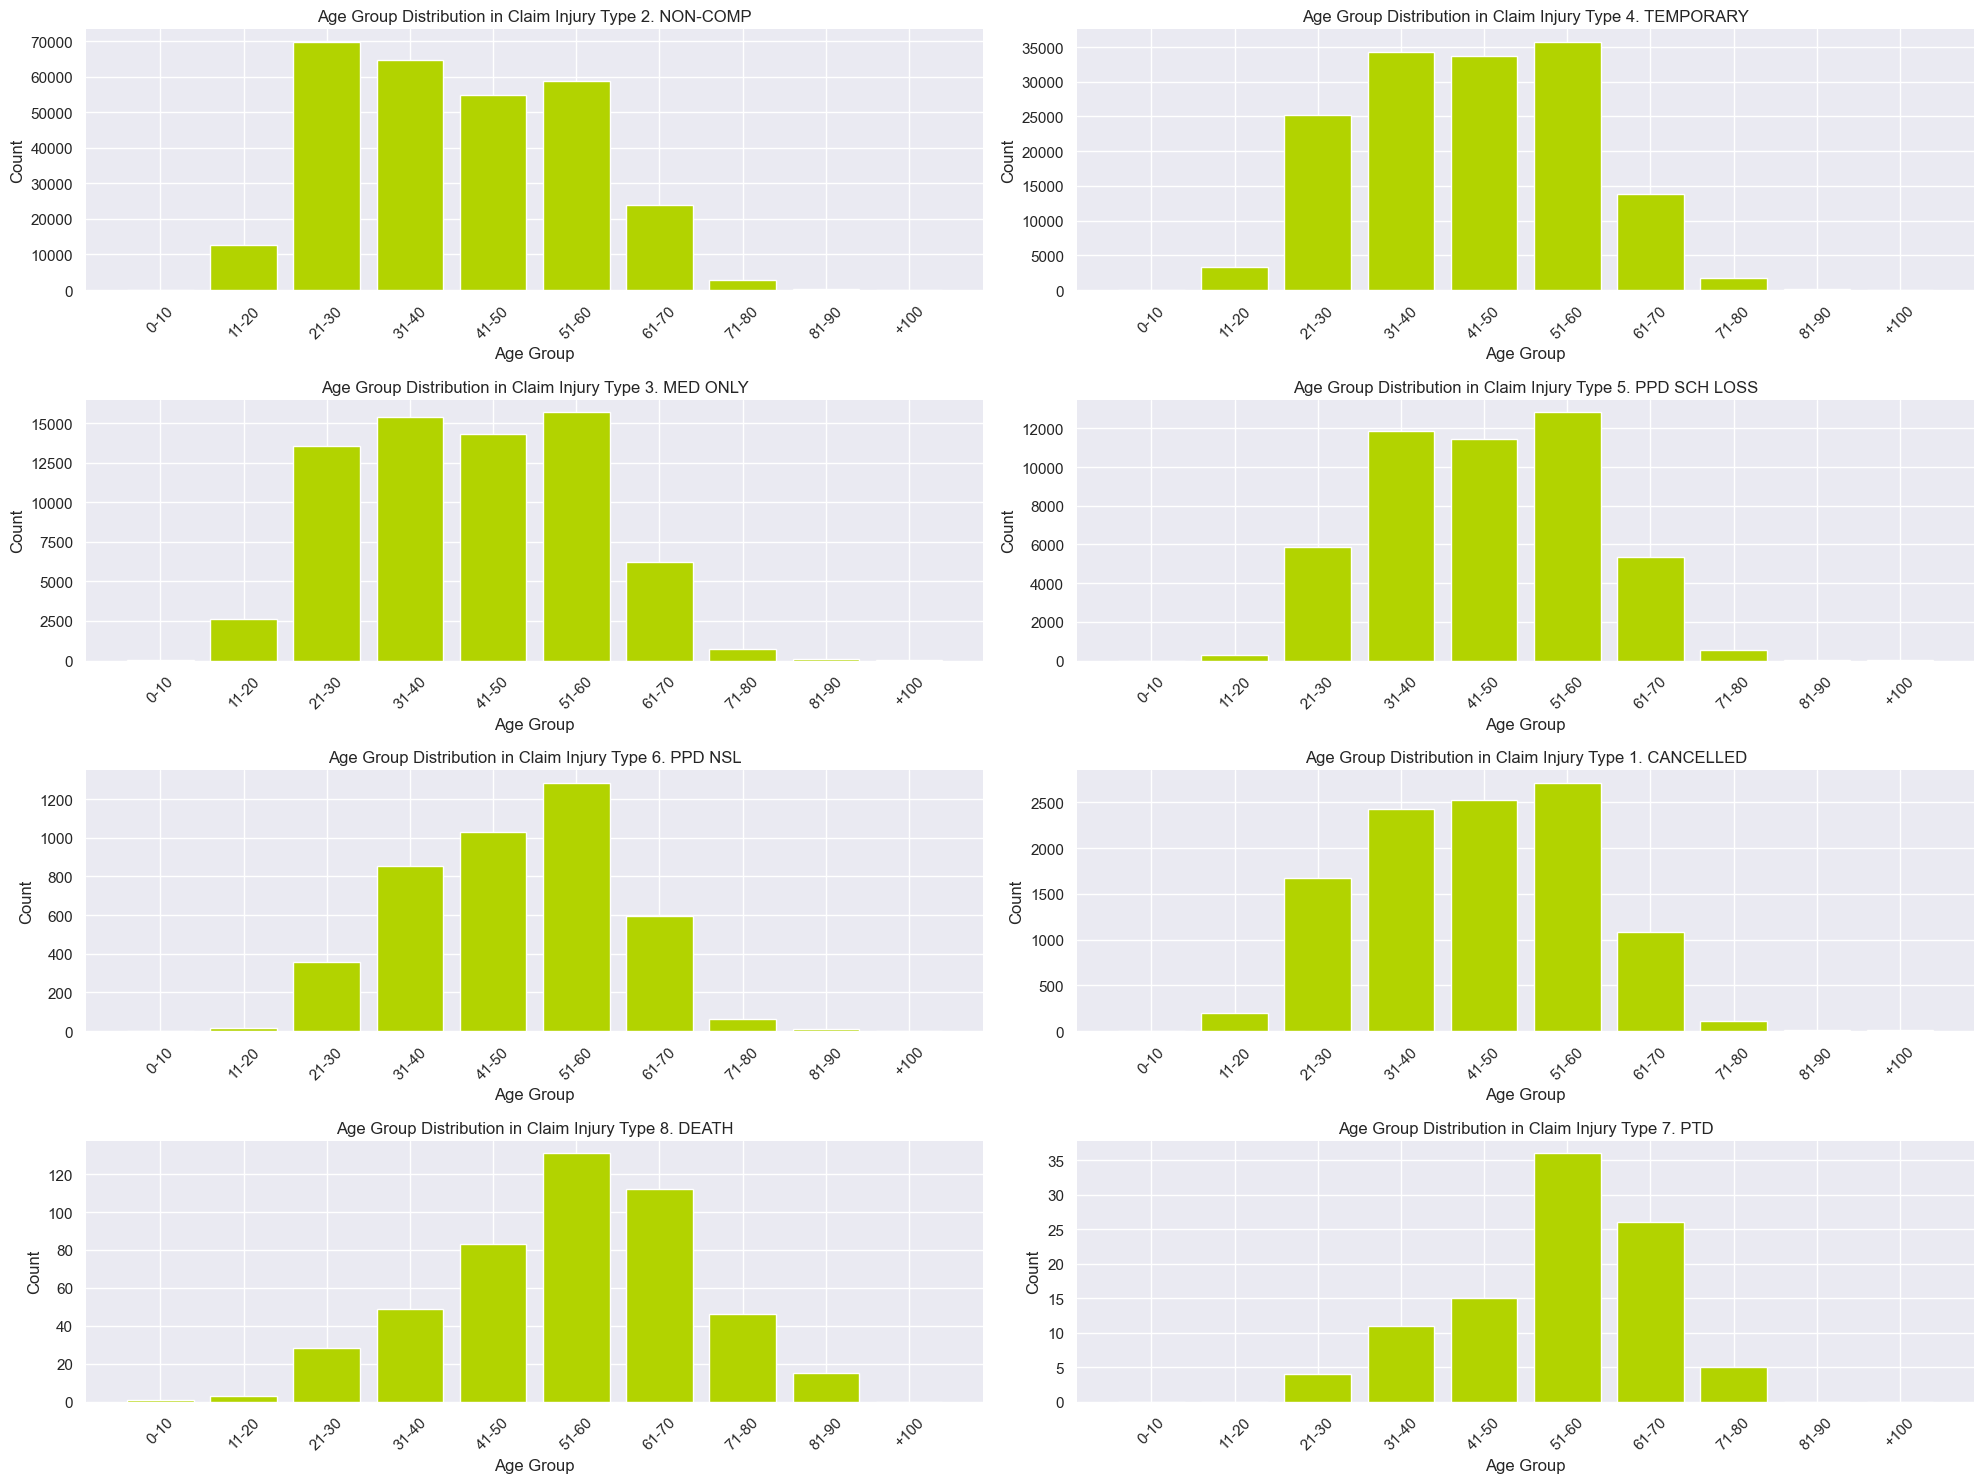

In [1725]:
claim_injury_types = df_train['Claim Injury Type'].unique()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

for ax, claim_injury_type in zip(axes.flatten(), claim_injury_types):
    age_group_counts = df_train[df_train['Claim Injury Type'] == claim_injury_type]['age_group'].value_counts().sort_index()
    bars = ax.bar(age_group_counts.index, age_group_counts.values, color='#B2D300')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.set_title(f'Age Group Distribution in Claim Injury Type {claim_injury_type}')
    ax.set_xticks(range(len(age_group_counts.index)))
    ax.set_xticklabels(age_group_counts.index, rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

In [1726]:
df_train['Agreement Reached'] = df_train['Agreement Reached'].map({0: 'Not Reached', 1: 'Reached'})
mean_age_by_agreement = df_train.groupby('Agreement Reached')['Age at Injury'].mean().reset_index()
mean_age_by_agreement.columns = ['Agreement Reached', 'Mean Age']
mean_age_by_agreement

,Agreement Reached,Mean Age
0,Not Reached,42.054242
1,Reached,43.343674


### Genders

The next step is checking how the dataset is distributed in terms of gender

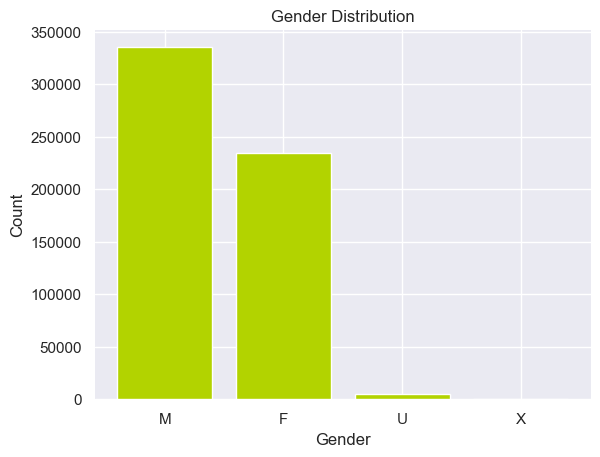

In [1727]:
df_train['Gender'] = df_train['Gender'].astype(str)
gender_counts = df_train['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='#B2D300')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [1728]:
gender_type_of_claim = pd.crosstab(df_train['Gender'], df_train['Claim Injury Type'])
for i in gender_type_of_claim.columns:
    gender_type_of_claim[i] = (gender_type_of_claim[i] / gender_type_of_claim[i].sum()) * 100
gender_type_of_claim

Claim Injury Type,1. CANCELLED,2. NON-COMP,3. MED ONLY,4. TEMPORARY,5. PPD SCH LOSS,6. PPD NSL,7. PTD,8. DEATH
Gender,,,,,,,,
F,33.429510,44.401119,40.794706,37.794851,30.292046,40.156732,23.71134,12.765957
M,65.167909,54.539364,58.523206,61.647599,69.320630,59.534552,76.28866,87.234043
U,1.378537,1.055394,0.655966,0.554183,0.370754,0.308715,0.00000,0.000000
X,0.024044,0.004123,0.026123,0.003367,0.016570,0.000000,0.00000,0.000000


The majority of the dataset is composed of men (M), with a smaller proportion of women (F) and two other options (U for Unknown and X for Nonbinary)

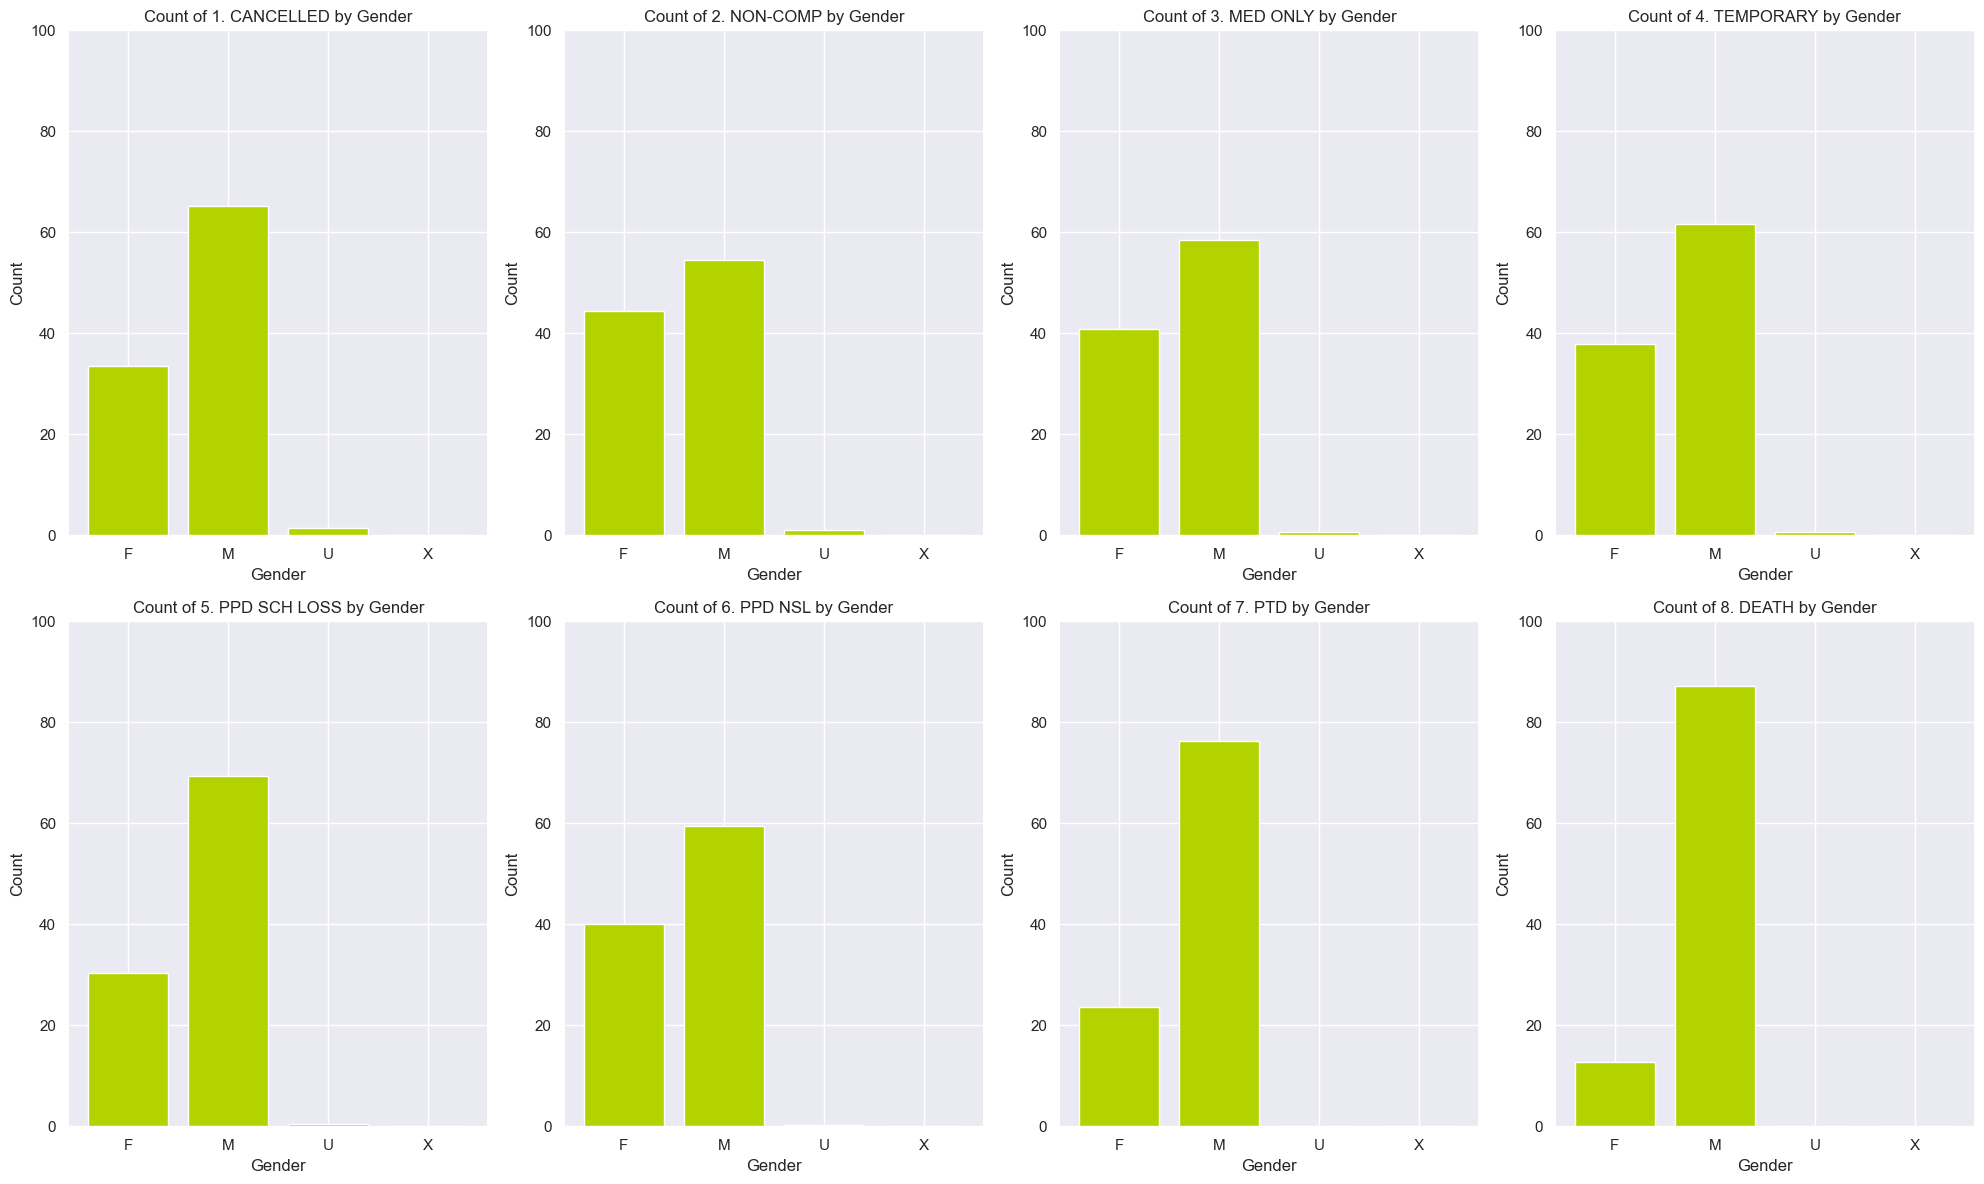

In [1729]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

for ax, col in zip(axes.flatten(), gender_type_of_claim.columns):
    ax.bar(gender_type_of_claim.index, gender_type_of_claim[col], color='#B2D300')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.set_title(f'Count of {col} by Gender')
    ax.grid(True)
    ax.set_ylim(0, 100)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

The graph gives the a better perception of the growth  in the percentage of men as cases get incrisingly severe, with the highest percentage of men present in cases envolving death.

### Unbalanced Columns

Two columns seem to be unbalanced.

In [1730]:
covid_count = df_train['COVID-19 Indicator'].value_counts()
covid_count_percent = covid_count / covid_count.sum() * 100
decision_count = df_train['WCB Decision'].value_counts()
decision_count_percent = decision_count / decision_count.sum() * 100
print(covid_count_percent)
print(decision_count_percent)

COVID-19 Indicator
N    95.205601
Y     4.794399
Name: count, dtype: float64
WCB Decision
Not Work Related    100.0
Name: count, dtype: float64


The "COVID-19 Indicator" is composed by (roughly) 95% of cases where the claimant did **not** have covid and 5% where the claimant **had** covid. This variable is highly unbalanced, which could mean its prediction power is very low. Further research is necessary to understand the utility of this variable.

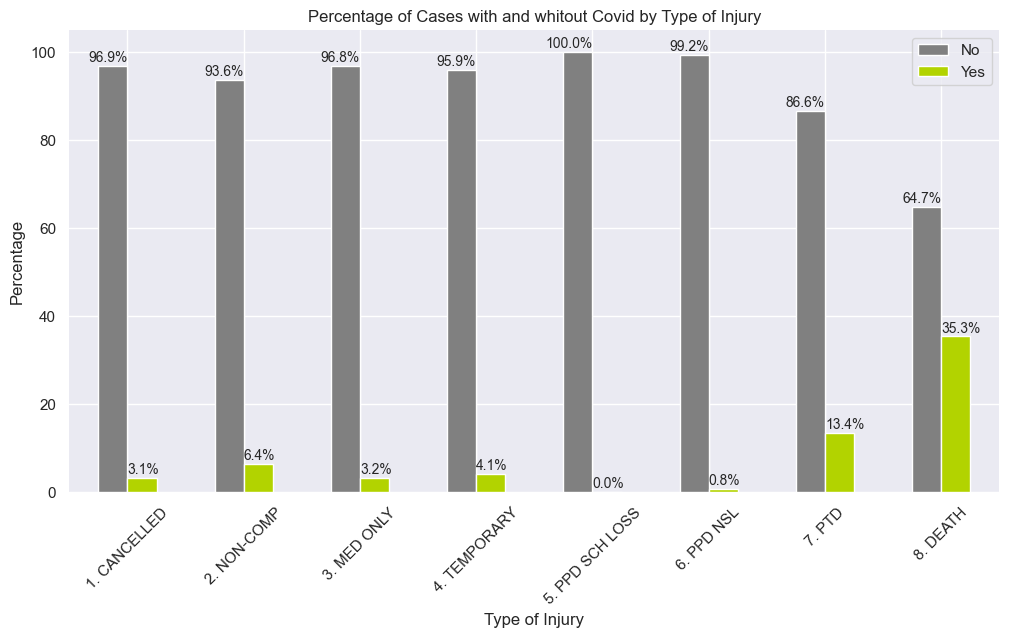

In [1731]:
claim_injury_covid = pd.crosstab(df_train['Claim Injury Type'], df_train['COVID-19 Indicator'])
claim_injury_covid.columns = ['No', 'Yes']
claim_injury_covid.reset_index(inplace=True)
claim_injury_covid['Yes'] = claim_injury_covid['Yes'] / (claim_injury_covid['No'] + claim_injury_covid['Yes']) * 100
claim_injury_covid['No'] = 100 - claim_injury_covid['Yes']
claim_injury_covid
claim_injury_covid.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Type of Injury')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and whitout Covid by Type of Injury')
for index, value in enumerate(claim_injury_covid['Yes']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='left', fontsize=10)
for index, value in enumerate(claim_injury_covid['No']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='right', fontsize=10)
plt.xticks(ticks=claim_injury_covid.index, labels=claim_injury_covid['Claim Injury Type'], rotation=45)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

We can observe that the cases where the injury type is "DEATH" have a much higher rate of covid. There could possibly be a correlation between these variables, so at this time the Covid variable will be kept.

"WCB Decision" is composed in its entirety by "Not Work Related" cases, as such it has no variability and therefore is not a variable of interest, for the sake of simplicity it will be removed.

In [1732]:
df_train = df_train.drop(columns=['WCB Decision'])

### Accidents Location

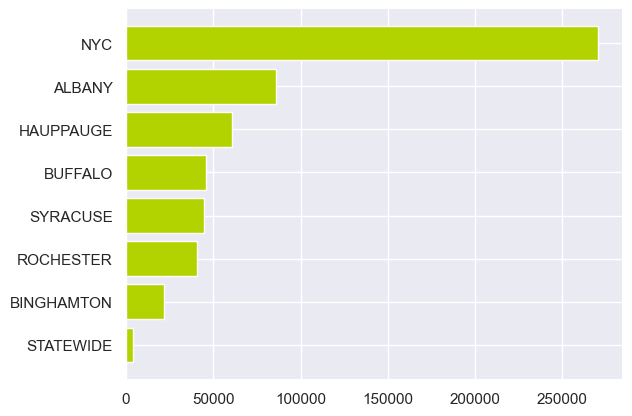

In [1733]:
district_counts = df_train['District Name'].value_counts()
plt.barh(district_counts.index, district_counts.values, color='#B2D300')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.gca().invert_yaxis()
plt.show()

Most cases happen in the region of NYC (New York City, which accounts for 5 counties) this could be due to its higher population count.

(https://worldpopulationreview.com/us-counties/new-york)

How does the target variable behave in these communities?

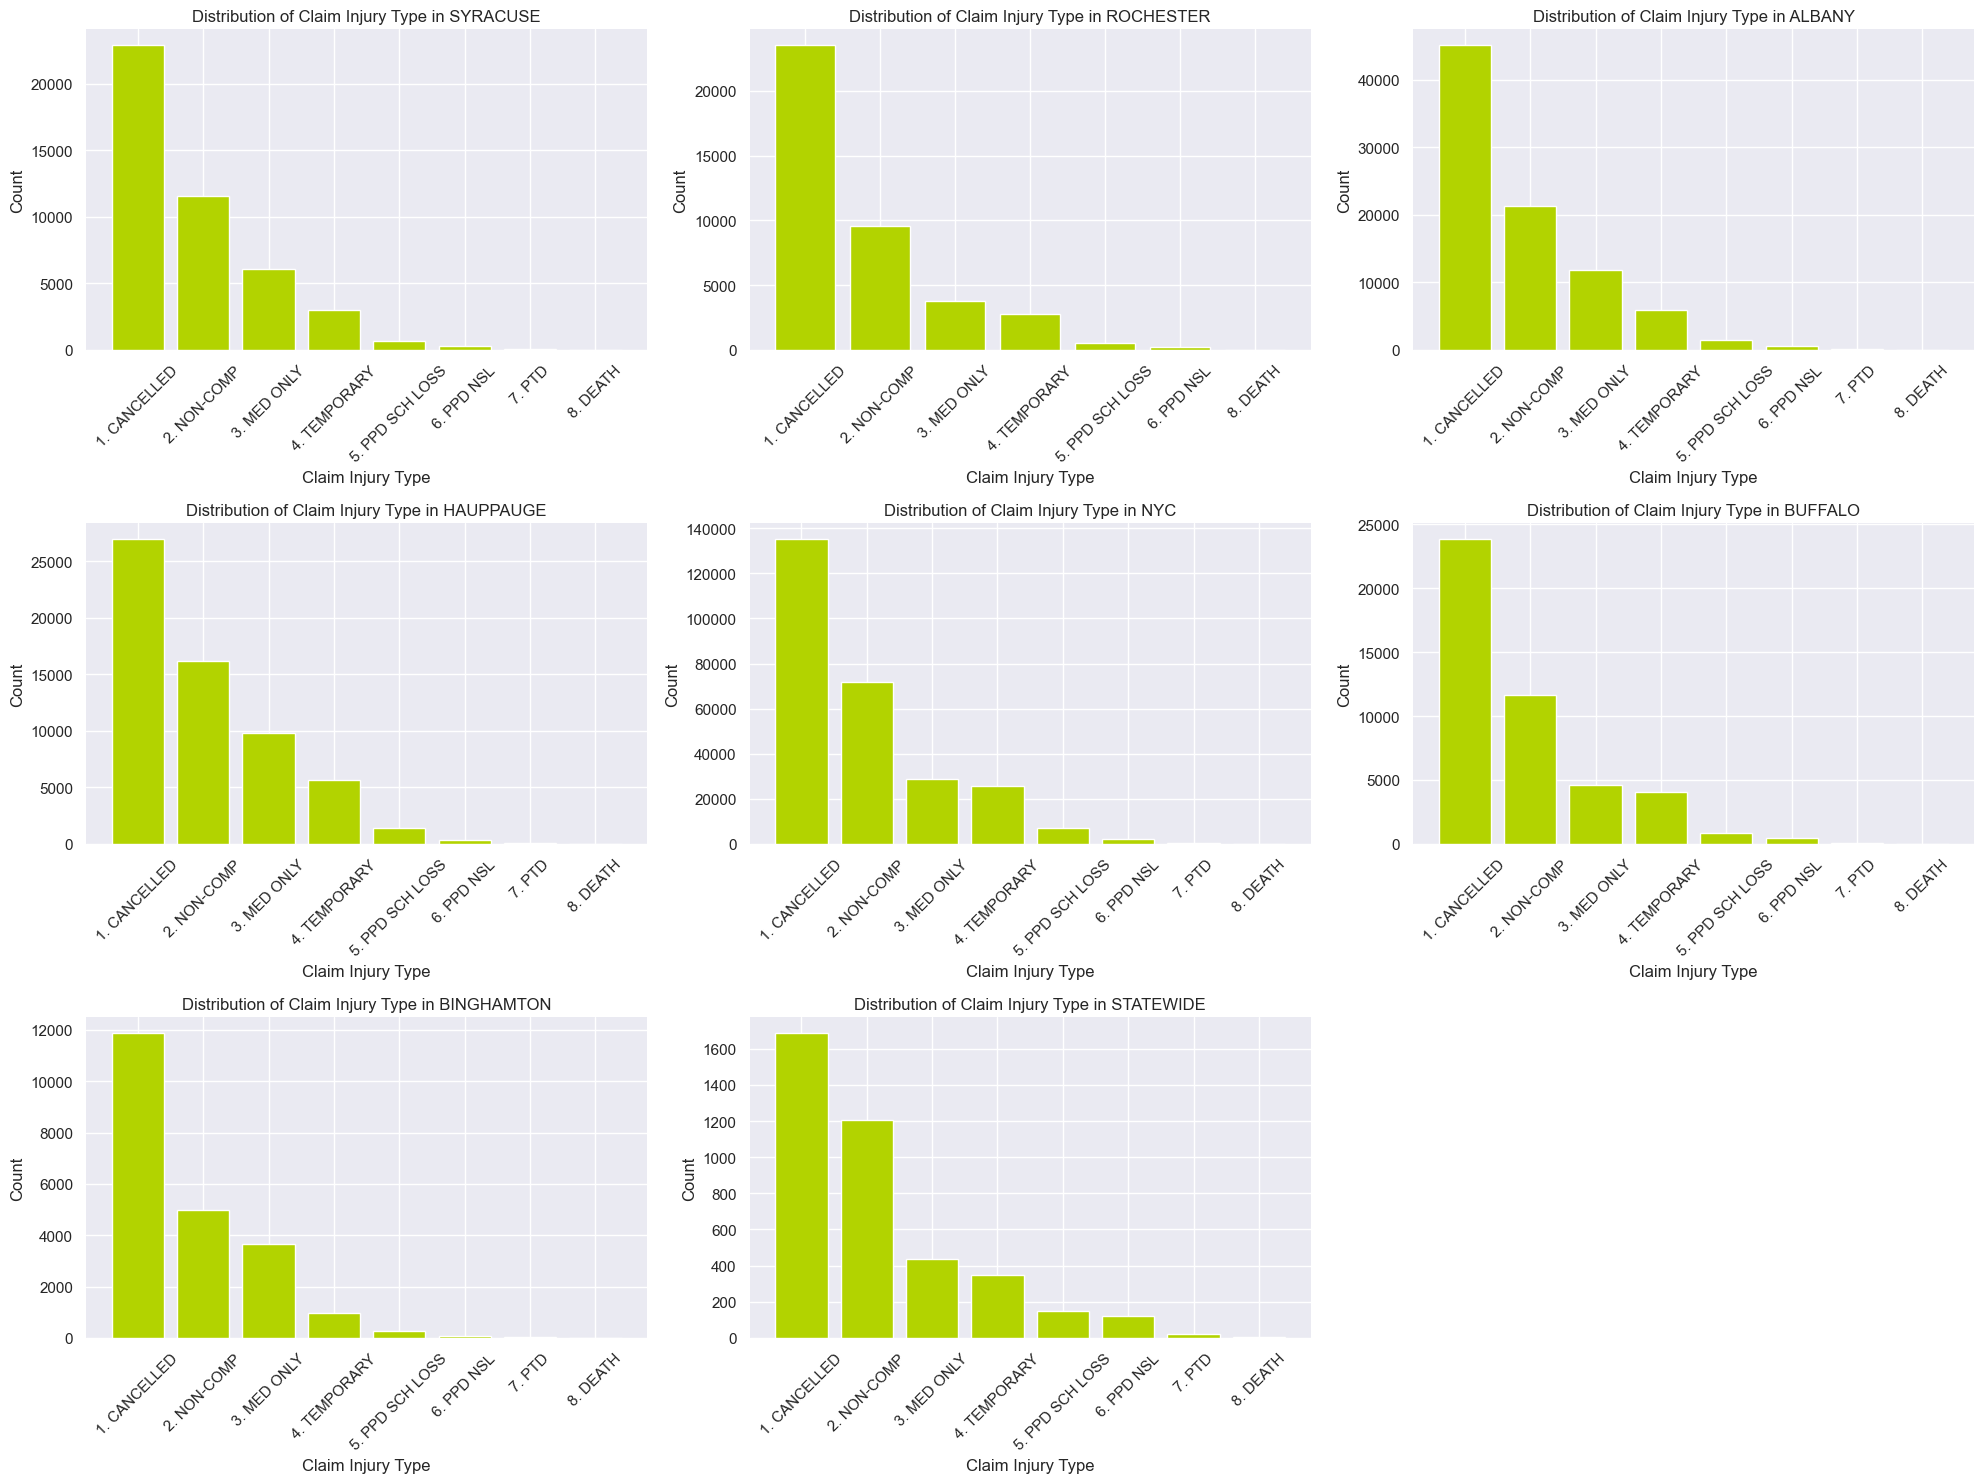

In [1734]:
places = df_train['District Name'].unique()
num_places = len(places)
fig, axes = plt.subplots(nrows=ceil(num_places / 3), ncols=3, figsize=(20, 15))

for ax, place in zip(axes.flatten(), places):
    claim_injury_counts = df_train[df_train['District Name'] == place]['Claim Injury Type'].value_counts()
    bars = ax.bar(claim_injury_counts.index, claim_injury_counts.values, color='#B2D300')
    ax.set_xlabel('Claim Injury Type')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of Claim Injury Type in {place}')
    ax.set_xticks(range(len(claim_injury_counts.index)))
    ax.set_xticklabels(sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Remove any empty subplots
for ax in axes.flatten()[num_places:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

The distribution of cases seems to be mostly equal for all locations

### Average Weekly Wage

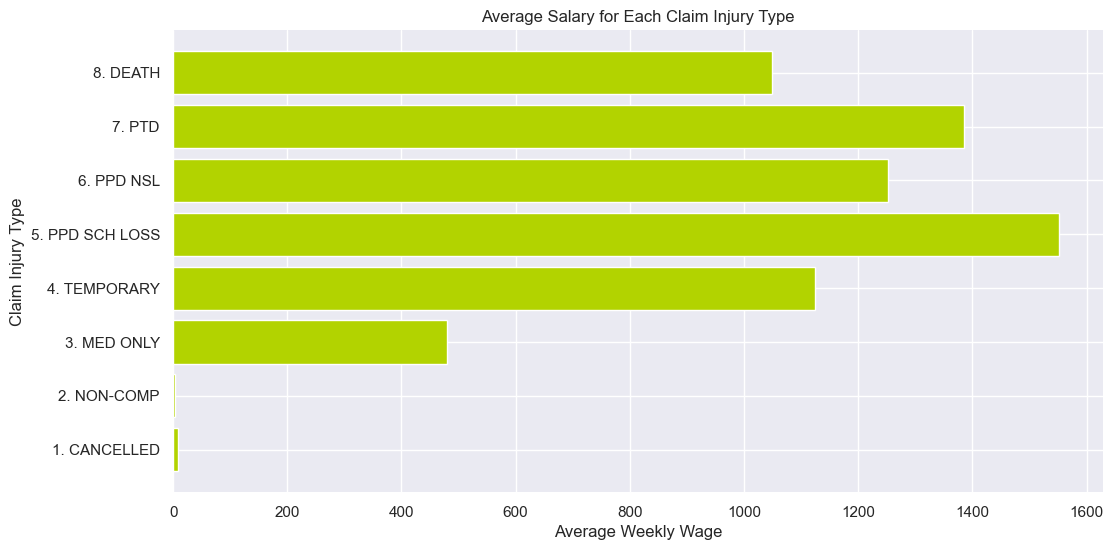

In [1735]:
average_salary_by_claim = df_train.groupby('Claim Injury Type')['Average Weekly Wage'].mean()
average_salary_by_claim_sorted = average_salary_by_claim.sort_index()

plt.figure(figsize=(12, 6))
bars = plt.barh(average_salary_by_claim_sorted.index, average_salary_by_claim_sorted.values, color='#B2D300')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Claim Injury Type')
plt.title('Average Salary for Each Claim Injury Type')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The average salary pertains to 	"the wage used to calculate workers’ compensation benefits, disability benefits, or an employee’s Paid Family Leave wage replacement benefits." The bar chart shows that the categories with the lowest avreage weekly salary are first three, this is reasonable given that these claims are the ones without monetary compensation. Still more can be explore in this variable.

(https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data)

In [1736]:
bins = (0, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 300000, 400000, 500000, 1000000)
df_train['wage_groups'] = pd.cut(df_train['Average Weekly Wage'], bins=bins)

In [1737]:
age_group_counts = df_train['wage_groups'].value_counts().sort_index()
age_group_counts_percentage = age_group_counts / age_group_counts.sum() * 100
age_group_table = pd.DataFrame({'Age Group': age_group_counts.index,'Count': age_group_counts.values,'Percentage': age_group_counts_percentage.values})
age_group_table['Age Group'] = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-10000', '10000-20000', '20000-30000', '30000-40000',
                                 '40000-50000', '50000-100000', '100000-200000', '200000-300000', '300000-400000', '400000-500000', '500000-1000000']
age_group_table

,Age Group,Count,Percentage
0,0-1000,96645,46.038967
1,1000-2000,87274,41.574886
2,2000-3000,20881,9.947123
3,3000-4000,3763,1.792588
4,4000-5000,973,0.463510
5,5000-10000,328,0.156250
6,10000-20000,29,0.013815
7,20000-30000,9,0.004287
8,30000-40000,2,0.000953
9,40000-50000,2,0.000953


Roughly 96% of the data falls in the range of 0 to 3000 monetary units. Further research into this range could reveal some important insights.

In [1738]:
df_train1 = df_train[df_train['Average Weekly Wage'] < 3000]
bins = (0, 500, 1000, 1500, 2000, 2500, 3000)
df_train1['wage_groups'] = pd.cut(df_train1['Average Weekly Wage'], bins=bins)

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\1944115288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['wage_groups'] = pd.cut(df_train1['Average Weekly Wage'], bins=bins)


In [1739]:
df_train1['Average Weekly Wage'].mean()

np.float64(437.4043178023361)

The average falls bellow what it should (it hsould be around 1000 according to our previous table), this could be due to a lot majority of low values in the 0 to 500 range. 

In the begining of the notebook it was pointed out that the boxplot was very skewed, so the next step is to look for zero's.

In [1740]:
df_testing = df_train1[df_train1['Average Weekly Wage'] == 0]
percent = len(df_testing)/len(df_train)*100
print(f'The percentage of observations where the salary is 0 is: {percent:.2f}%')

The percentage of observations where the salary is 0 is: 58.44%


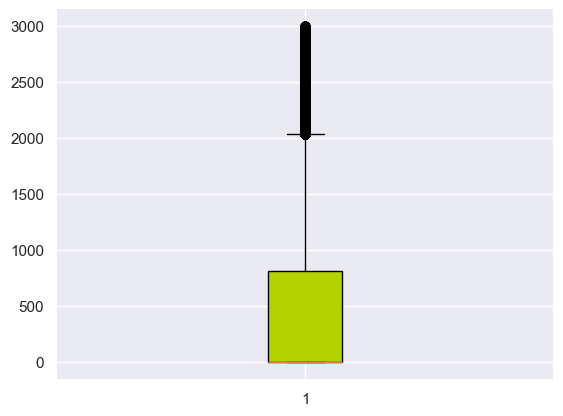

In [1741]:
plt.boxplot(df_train1['Average Weekly Wage'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Again, in the boxplot the fact this variable is dominated by zeros becomes obvious. As stated before this issue will be dealt with in the data cleaning process

The created bins are not a good way to represent the average weekly wage so tehy will be reworked.<br>
The new organization will work as follows:<br>
- No Benefit
- Low Benefit
- Medium Benefit
- High Benefit

This organization method better represents the data as it takes into account the 0 in the class 'No Benefit'

To better pick the limits of each category the data will be plotted without outliers and zeros.

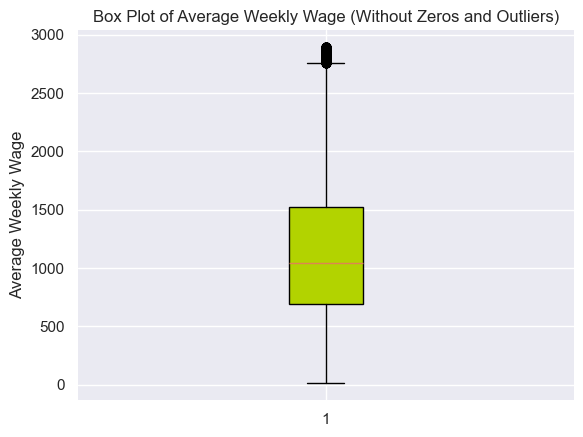

In [1742]:
df_non_zero_wage = df_train[df_train['Average Weekly Wage'] > 0]

Q1 = df_non_zero_wage['Average Weekly Wage'].quantile(0.25)
Q3 = df_non_zero_wage['Average Weekly Wage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_non_zero_wage_no_outliers = df_non_zero_wage[(df_non_zero_wage['Average Weekly Wage'] >= lower_bound) & (df_non_zero_wage['Average Weekly Wage'] <= upper_bound)]

plt.boxplot(df_non_zero_wage_no_outliers['Average Weekly Wage'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.title('Box Plot of Average Weekly Wage (Without Zeros and Outliers)')
plt.ylabel('Average Weekly Wage')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Given the present boxplot the following division was decided:<br>
- No Benefit (0 values)
- Low Benefit (more then 0 and less then 750)
- Medium Benefit (more then 750 and less then 1500)
- High Benefit (more then 1500 and less then 300)
- Very High Benefit (more then 3000)

In [1743]:
bins = [-1, 0, 750, 1500, 3000, df_train['Average Weekly Wage'].max()]
labels = ['No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
df_train['wage_groups'] = pd.cut(df_train['Average Weekly Wage'], bins=bins, labels=labels)
df_train[['Average Weekly Wage', 'wage_groups']].head()

,Average Weekly Wage,wage_groups
0,0.00,No Wage
1,1745.93,High Wage
2,1434.80,Medium Wage
4,NaN,NaN
5,0.00,No Wage


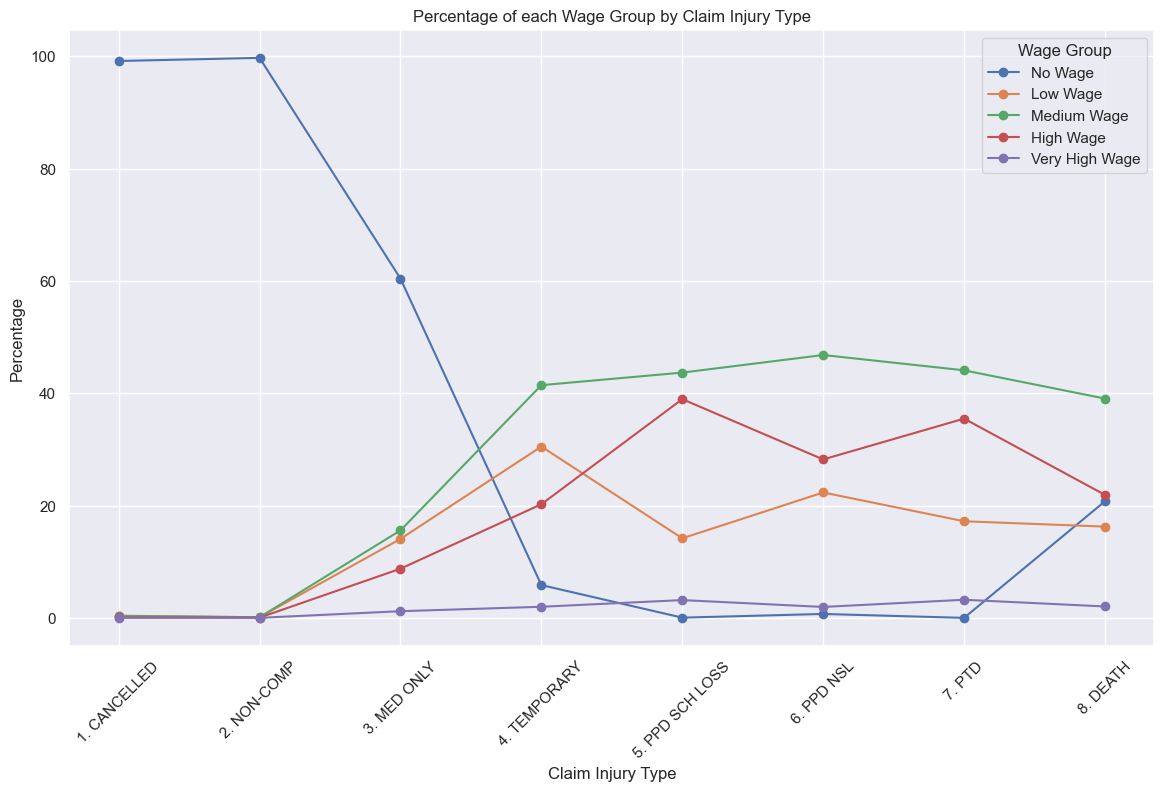

In [1744]:
wage_groups_by_claim = pd.crosstab(df_train['Claim Injury Type'], df_train['wage_groups'])
wage_groups_by_claim_percentage = wage_groups_by_claim.div(wage_groups_by_claim.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
for wage_group in wage_groups_by_claim_percentage.columns:
    plt.plot(wage_groups_by_claim_percentage.index, wage_groups_by_claim_percentage[wage_group], marker='o', label=wage_group)

plt.xlabel('Claim Injury Type')
plt.ylabel('Percentage')
plt.title('Percentage of each Wage Group by Claim Injury Type')
plt.legend(title='Wage Group')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

As expected, the first two categories are dominated by "No Wage" observations. As the wage category increases, the proportion of "No Wage" observations decreases, with the exception of the "Very High Wage" category, which has few observations.

### Medical Fee Region

In [1745]:
df_train['Medical Fee Region'].unique()

array(['I', 'II', 'IV', 'UK', 'III'], dtype=object)

What is the meaning of these codes:

I - Region 1: Rural areas outside of Buffalo, Albany, Syracuse, Rochester, Utica & Binghamton<br>
II - Region 2: Buffalo, Albany, Syracuse, Rochester, Utica & Binghamton<br>
III - Region 3: Westchester, Rockland & most of Suffolk, Orange, & Putnam<br>
IV - Region 4: New York City, Nassau, and Western Suffolk<br>
UK - Unknown<br>

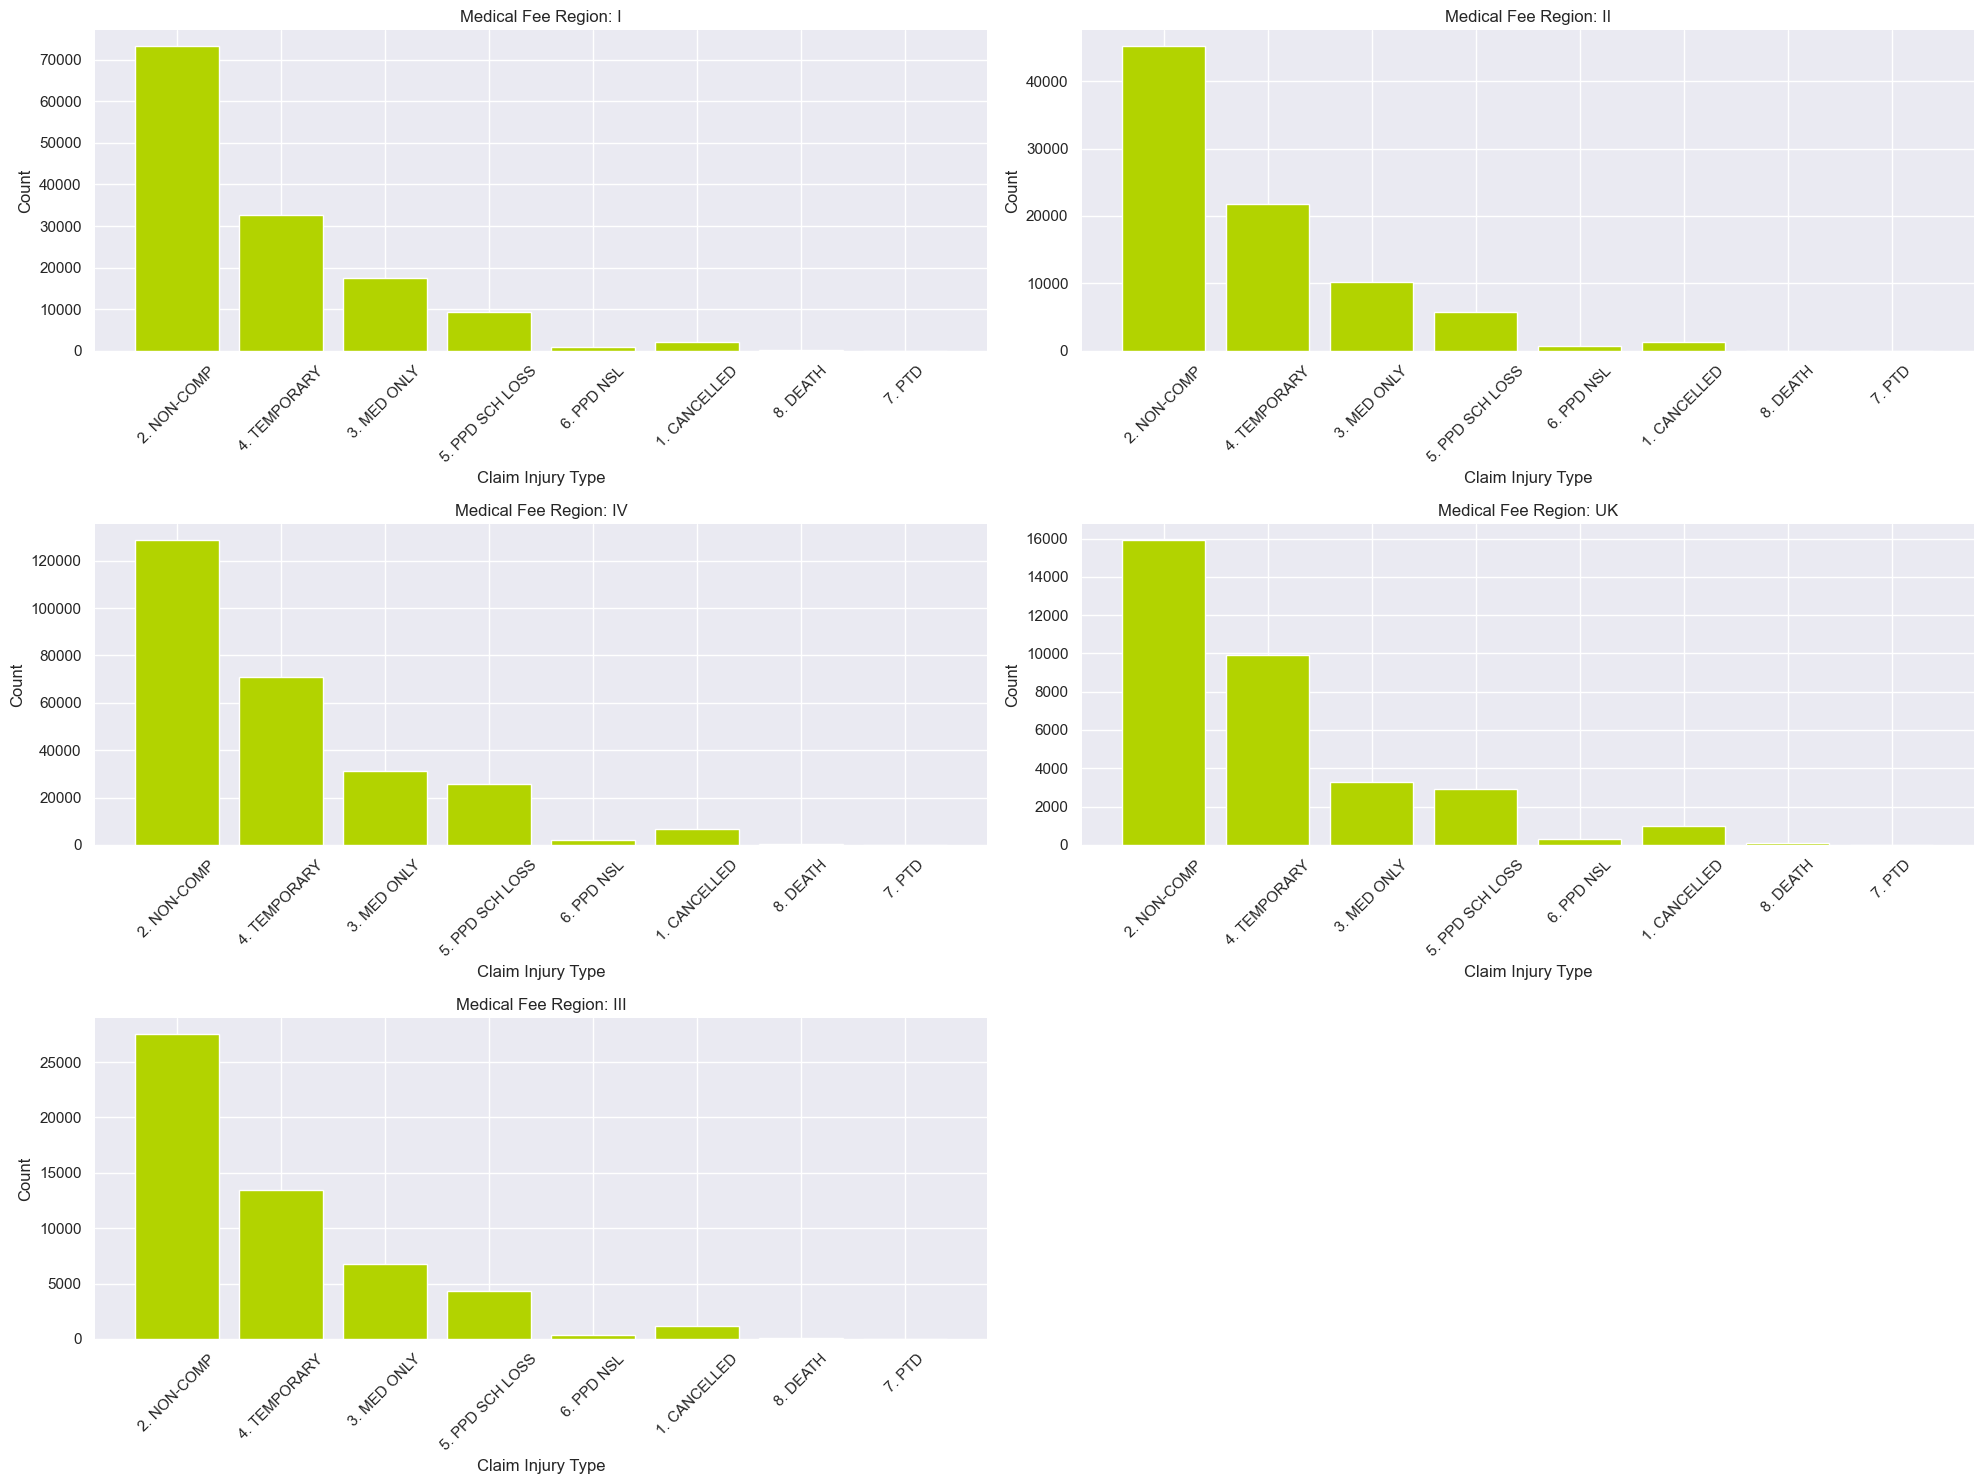

In [1746]:
medical_fee_regions = df_train['Medical Fee Region'].unique()
claim_injury_types = df_train['Claim Injury Type'].unique()

fig, axes = plt.subplots(nrows=ceil(len(medical_fee_regions) / 2), ncols=2, figsize=(20, 15))
for ax, region in zip(axes.flatten(), medical_fee_regions):
    region_data = df_train[df_train['Medical Fee Region'] == region]
    claim_counts = region_data['Claim Injury Type'].value_counts().reindex(claim_injury_types, fill_value=0)
    ax.bar(claim_counts.index, claim_counts.values, color='#B2D300')
    ax.set_title(f'Medical Fee Region: {region}')
    ax.set_xlabel('Claim Injury Type')
    ax.set_ylabel('Count')
    ax.set_xticks(range(len(claim_counts.index)))
    ax.set_xticklabels(claim_counts.index, rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
for ax in axes.flatten()[len(medical_fee_regions):]:
    fig.delaxes(ax)
plt.tight_layout()
plt.show()

The distribution remains the same in the first target variable.

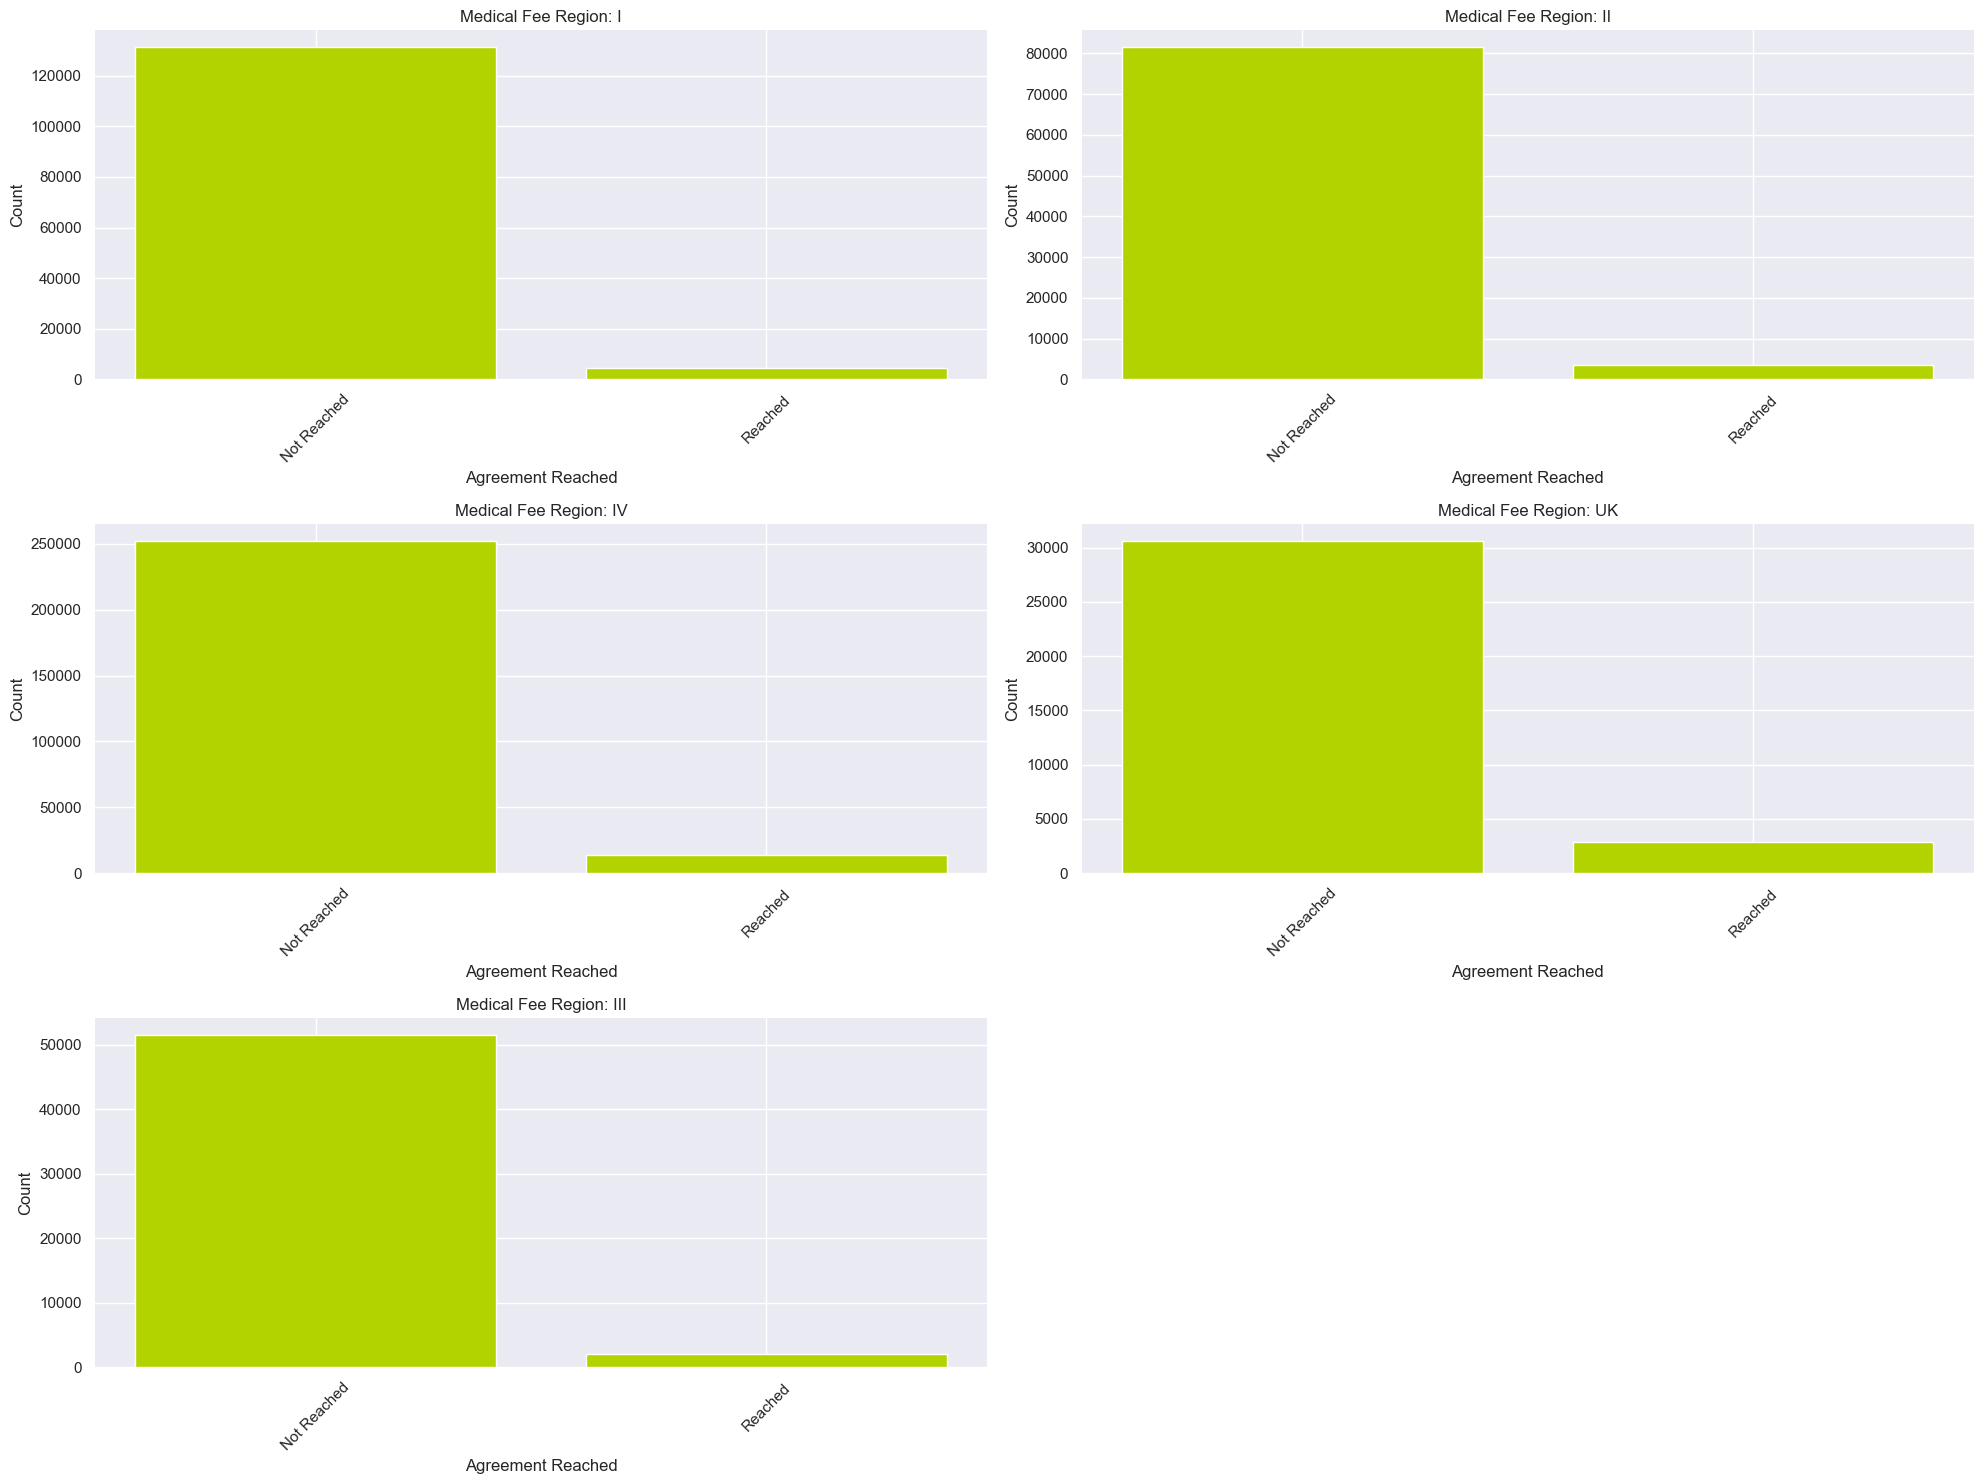

In [1747]:
medical_fee_regions = df_train['Medical Fee Region'].unique()
claim_injury_types = df_train['Agreement Reached'].unique()

fig, axes = plt.subplots(nrows=ceil(len(medical_fee_regions) / 2), ncols=2, figsize=(20, 15))
for ax, region in zip(axes.flatten(), medical_fee_regions):
    region_data = df_train[df_train['Medical Fee Region'] == region]
    claim_counts = region_data['Agreement Reached'].value_counts().reindex(claim_injury_types, fill_value=0)
    ax.bar(claim_counts.index, claim_counts.values, color='#B2D300')
    ax.set_title(f'Medical Fee Region: {region}')
    ax.set_xlabel('Agreement Reached')
    ax.set_ylabel('Count')
    ax.set_xticks(range(len(claim_counts.index)))
    ax.set_xticklabels(claim_counts.index, rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
for ax in axes.flatten()[len(medical_fee_regions):]:
    fig.delaxes(ax)
plt.tight_layout()
plt.show()

As expected the variable follows the same distribution and most of the cases are not agreed upon.

## C-2 Date
	
"Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2). Blank indicates no form received. For data sets published prior to the first quarter of 2022, the C-2 Date is the date of receipt of the “Employer’s Report of Work-Related Injury/Illness” for C-2. For data sets created in the first quarter of 2022 and forward, the C-2 Date is set to the earliest received date of equivalent injury/illness filings, including electronic data filed though the Board’s eClaims process."

(https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data)

Given that the data focuses mostly on the years of 2020 to 2022 the line chart for C-2 Forms will look into this period.

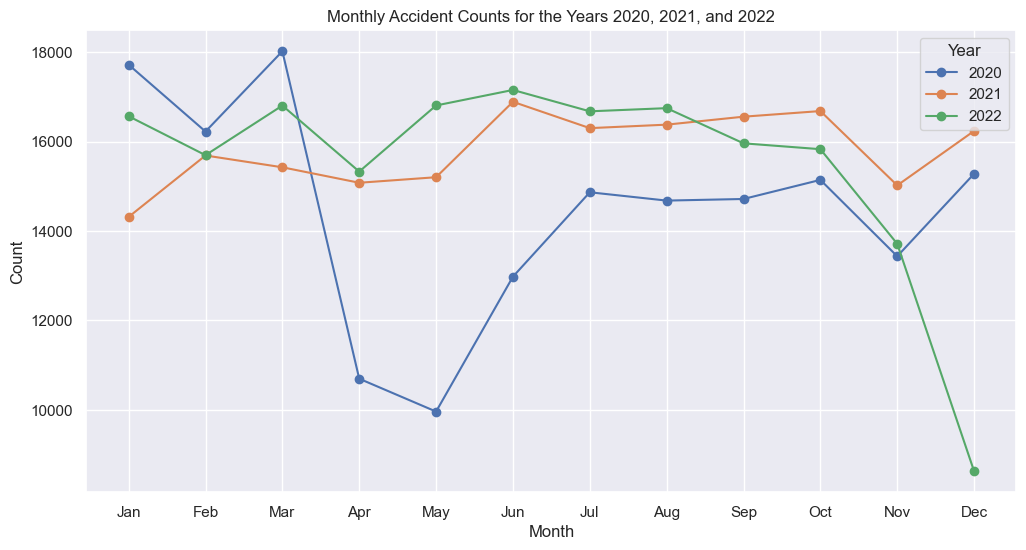

In [1748]:
df_filtered = df_train[df_train['Accident Date'].dt.year.isin([2020, 2021, 2022])]
monthly_counts = df_filtered.groupby([df_filtered['Accident Date'].dt.year, df_filtered['Accident Date'].dt.month]).size().unstack(level=0)
plt.figure(figsize=(12, 6))
for year in [2020, 2021, 2022]:
    plt.plot(monthly_counts.index, monthly_counts[year], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Accident Counts for the Years 2020, 2021, and 2022')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

There appears to be no type of periodicity.

Given that C-2 is the date of a form filled out by the employee after the accident, "C2-Date" cannot happen before "Accident Date". In order to ensure the data is consistent, it must be confirmed if such cases occured:

In [1749]:
c2_before_accident = df_train[df_train['C-2 Date'] < df_train['Accident Date']]
print(f"Number of times the C-2 report is filled before the accident happens: {c2_before_accident.shape[0]}")


Number of times the C-2 report is filled before the accident happens: 982


In [1750]:
c2_before_accident[c2_before_accident["C-2 Date"] == 0]


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,age_group,wage_groups


In [1751]:
c2_before_accident[c2_before_accident["C-2 Date"].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,age_group,wage_groups


None of these rows are missing values of NaN.

In [1752]:
# c2_before_accident["C-2 Date"] = pd.to_datetime(c2_before_accident["C-2 Date"], errors='coerce')
# pd.DataFrame(c2_before_accident["C-2 Date"].dt.year.value_counts()).sort_index()

Most of the cases happen between 2020 and 2022.

These rows will be addressed in the data cleaning stage

## Code Variables

In the data set there are a lot of columns regarding codes (industry codes, injury codes, etc.). These codes have a high cardinality (there are between 50 to 70 codes) and as tehy stand they are of no use to the model or visualization.

In [1753]:
unique_cause_codes = df_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()
unique_nature_codes = df_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()
unique_body_codes = df_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

In [1754]:
unique_body_codes

,WCIO Part Of Body Code,WCIO Part Of Body Description
0,62,BUTTOCKS
1,38,SHOULDER(S)
2,10,MULTIPLE HEAD INJURY
4,36,FINGER(S)
8,60,LUNGS
9,14,EYE(S)
10,55,ANKLE
11,53,KNEE
12,37,THUMB
14,42,LOWER BACK AREA


### Body Groups

To reduce the dimensionality the codes can be grouped into 5 groups:
- Head
- Torso
- Arms
- Legs
- Other (for unkown codes)

This has to be done manually.

In [1755]:
head = [
    "MULTIPLE HEAD INJURY", "EYE(S)", "MOUTH", "EAR(S)", "SKULL", "FACIAL BONES", 
    "TEETH", "NOSE", "BRAIN", "LARYNX", "TRACHEA", "MULTIPLE NECK INJURY"
]

torso = [
    "TORSO", "SHOULDER(S)", "LUNGS", "BUTTOCKS", "LOWER BACK AREA", "ABDOMEN INCLUDING GROIN", 
    "HIP", "CHEST", "DISC", "UPPER BACK AREA", "PELVIS", "HEART", "VERTEBRAE", 
    "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA", "SACRUM AND COCCYX", "SPINAL CORD"
]

arm = [
    "ARMS", "FINGER(S)", "THUMB", "WRIST", "HAND", "UPPER ARM", "ELBOW", "WRIST (S) & HAND(S)"
]

leg = [
    "LEGS", "ANKLE", "KNEE", "LOWER LEG", "UPPER LEG", "FOOT", "TOES", "GREAT TOE", 
    "MULTIPLE LOWER EXTREMITIES"
]

other = [
    "SPINAL CORD", "SOFT TISSUE", "MULTIPLE UPPER EXTREMITIES", "MULTIPLE BODY PARTS (INCLUDING BODY", 
    "BODY SYSTEMS AND MULTIPLE BODY SYSTEMS", "NO PHYSICAL INJURY", "MULTIPLE TRUNK", 
    "WHOLE BODY", "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...", "INTERNAL ORGANS"
]


In [1756]:
df_train['body_group'] = np.nan
df_train.loc[df_train['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(torso), 'body_group'] = 'Torso'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(arm), 'body_group'] = 'Arms'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(leg), 'body_group'] = 'Legs'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(other), 'body_group'] = 'Other'

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\2576631169.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Head' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'


<BarContainer object of 5 artists>

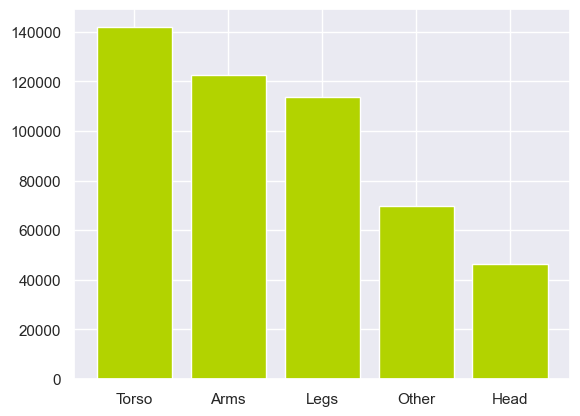

In [1757]:
df_train['body_group'].value_counts()
plt.bar(df_train['body_group'].value_counts().index, df_train['body_group'].value_counts().values, color='#B2D300')

Most of our observations suffered injuries to the torso area.

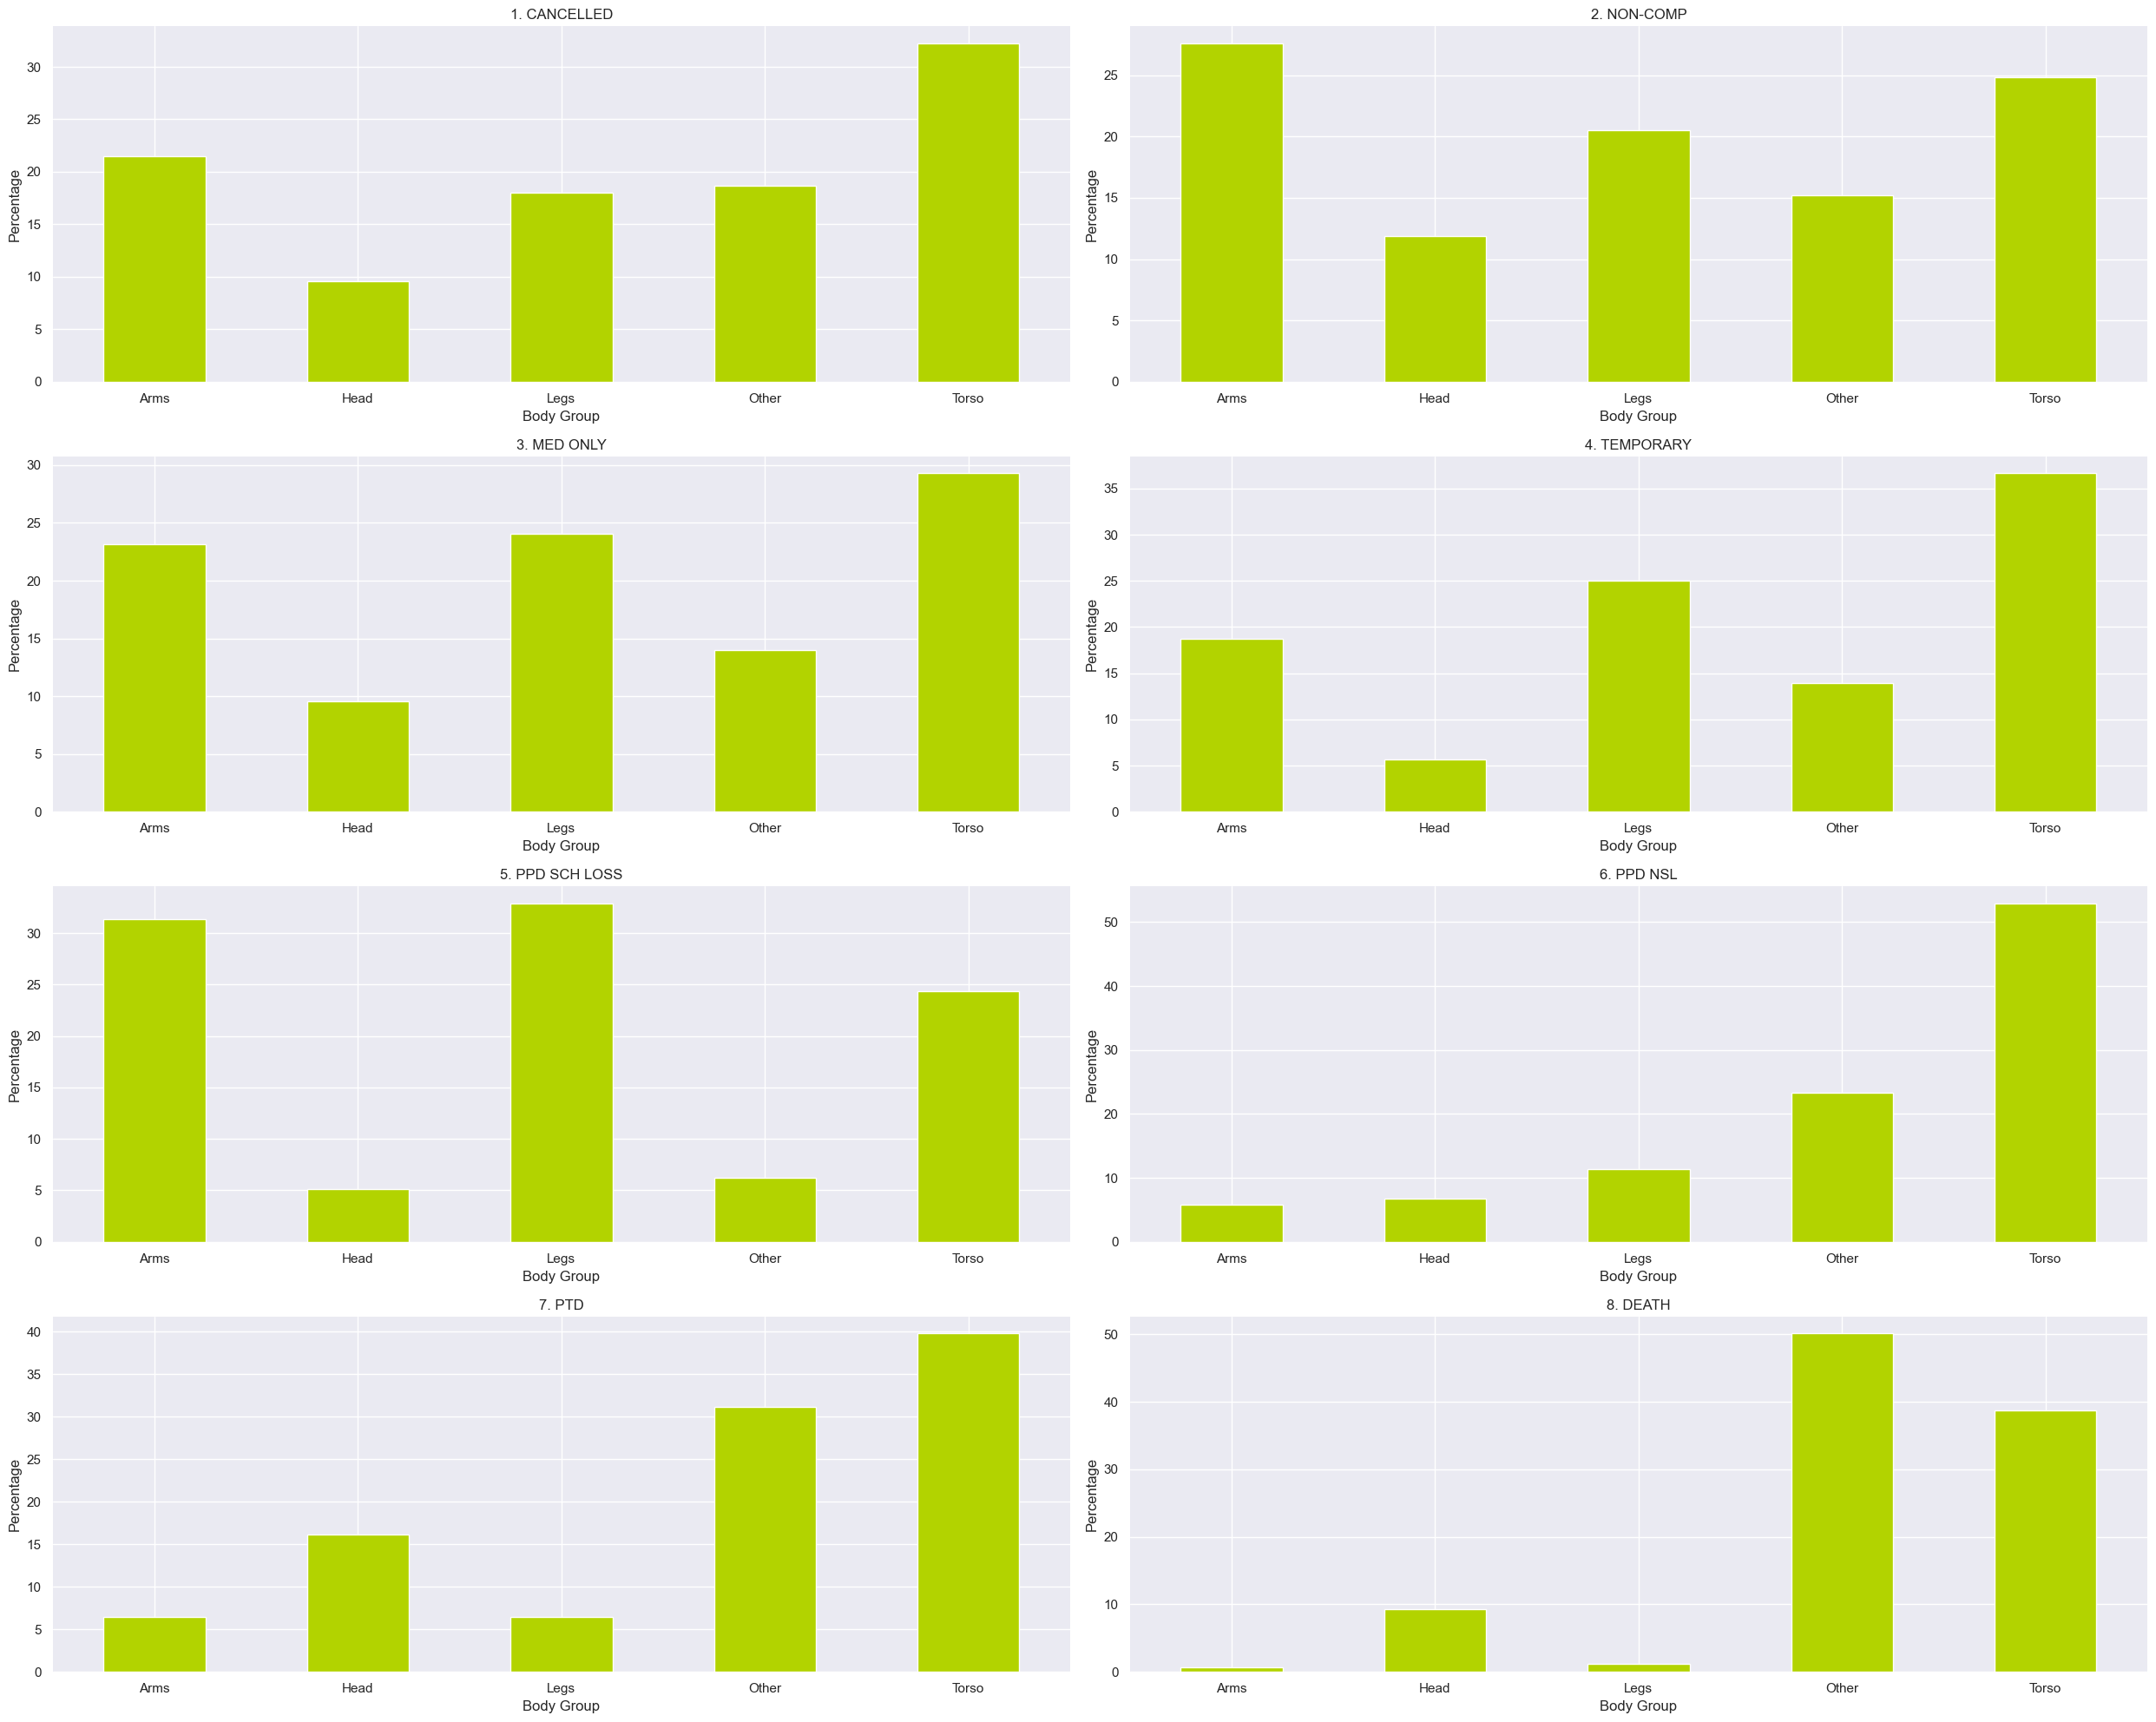

In [1758]:
body_group_percentage = df_train.groupby(['Claim Injury Type', 'body_group']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, body_group_percentage.index):
    body_group_percentage.loc[claim_type].plot(kind='bar', ax=ax, color='#B2D300')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_xlabel('Body Group')
    ax.set_ylabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

The 'Other' category grows as the cases get more severe, reaching its peak in the most severe cases. The 'Head' category also shows a slight increase in the 7th and 8th categories.

In [1759]:
unique_nature_codes

,WCIO Nature of Injury Code,WCIO Nature of Injury Description
0,10,CONTUSION
1,49,SPRAIN OR TEAR
2,7,CONCUSSION
4,43,PUNCTURE
6,40,LACERATION
7,71,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC"
8,59,"ALL OTHER SPECIFIC INJURIES, NOC"
11,37,INFLAMMATION
12,4,BURN
13,52,STRAIN OR TEAR


### Injury Nature

The same can be done for the diseases, grouping them will reduce their dimensionality. They are grouped as follows:
- External Physical Trauma (caused by direct impact, injury, or physical force)
- Chronic and Repetitive Stress Injuries (due to repetitive motion or long-term strain)
- Cumulative and Occupational Injuries (work-related conditions or cumulative injuries)
- Infectious Diseases (disease or infection-related injuries)
- Poisoning and Chemical Exposure (injuries related to toxic substances or reactions)
- Cardiovascular and Respiratory Conditions (heart, lung, and vascular system-related)
- Neurological and Sensory Conditions (affecting the nervous system, vision, or hearing)
- Mental Health and Stress-Related Conditions (psychological or emotional conditions)
- Other (Multiple injuries and special/rare conditions combined)

Again, this needs to be done manually and in the case of some injuries, research is necessary.

In [1760]:
physical_trauma = ["CONTUSION", "SPRAIN OR TEAR", "CONCUSSION", "PUNCTURE", "LACERATION", "BURN", 
                   "STRAIN OR TEAR", "FRACTURE", "FOREIGN BODY", "RUPTURE", "DISLOCATION", "CRUSHING", 
                   "SEVERANCE", "ELECTRIC SHOCK", "AMPUTATION"]

repetitive_stress_injuries = ["INFLAMMATION", "CARPAL TUNNEL SYNDROME", "HERNIA", "VDT - RELATED DISEASES"]

cumulative_occupational_injuries = ["ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC", "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER CUMULATIVE INJURY, NOC", 
                                    "DUST DISEASE, NOC", "ASBESTOSIS", "SILICOSIS", "BLACK LUNG", "BYSSINOSIS"]

infectious_diseases = ["INFECTION", "COVID-19", "CONTAGIOUS DISEASE", "HEPATITIS C", "AIDS"]

poisoning_chemical_exposure = ["POISONING - GENERAL (NOT OD OR CUMULATIVE)", "POISONING - CHEMICAL, (OTHER THAN METALS)", "POISONING - METAL", "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION"]

cardiovascular_respiratory = ["ANGINA PECTORIS", "MYOCARDIAL INFARCTION", "RESPIRATORY DISORDERS", 
                              "VASCULAR", "ASPHYXIATION", "HEAT PROSTRATION"]

neurological_sensory = ["HEARING LOSS OR IMPAIRMENT", "LOSS OF HEARING", "VISION LOSS", 
                        "ENUCLEATION", "SYNCOPE"]

mental_health_stress = ["MENTAL STRESS", "MENTAL DISORDER"]

other = ["MULTIPLE PHYSICAL INJURIES ONLY", "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL", 
         "FREEZING", "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION"]


In [1761]:
df_train['injury_type'] = np.nan
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(repetitive_stress_injuries), 'injury_type'] = 'Repetitive Stress Injuries'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(cumulative_occupational_injuries), 'injury_type'] = 'Cumulative Occupational Injuries'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(infectious_diseases), 'injury_type'] = 'Infectious Diseases'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(poisoning_chemical_exposure), 'injury_type'] = 'Poisoning/Chemical Exposure'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(cardiovascular_respiratory), 'injury_type'] = 'Cardiovascular/Respiratory'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(neurological_sensory), 'injury_type'] = 'Neurological/Sensory'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(mental_health_stress), 'injury_type'] = 'Mental Health/Stress'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(other), 'injury_type'] = 'Other'

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\2206559919.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Physical Trauma' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'


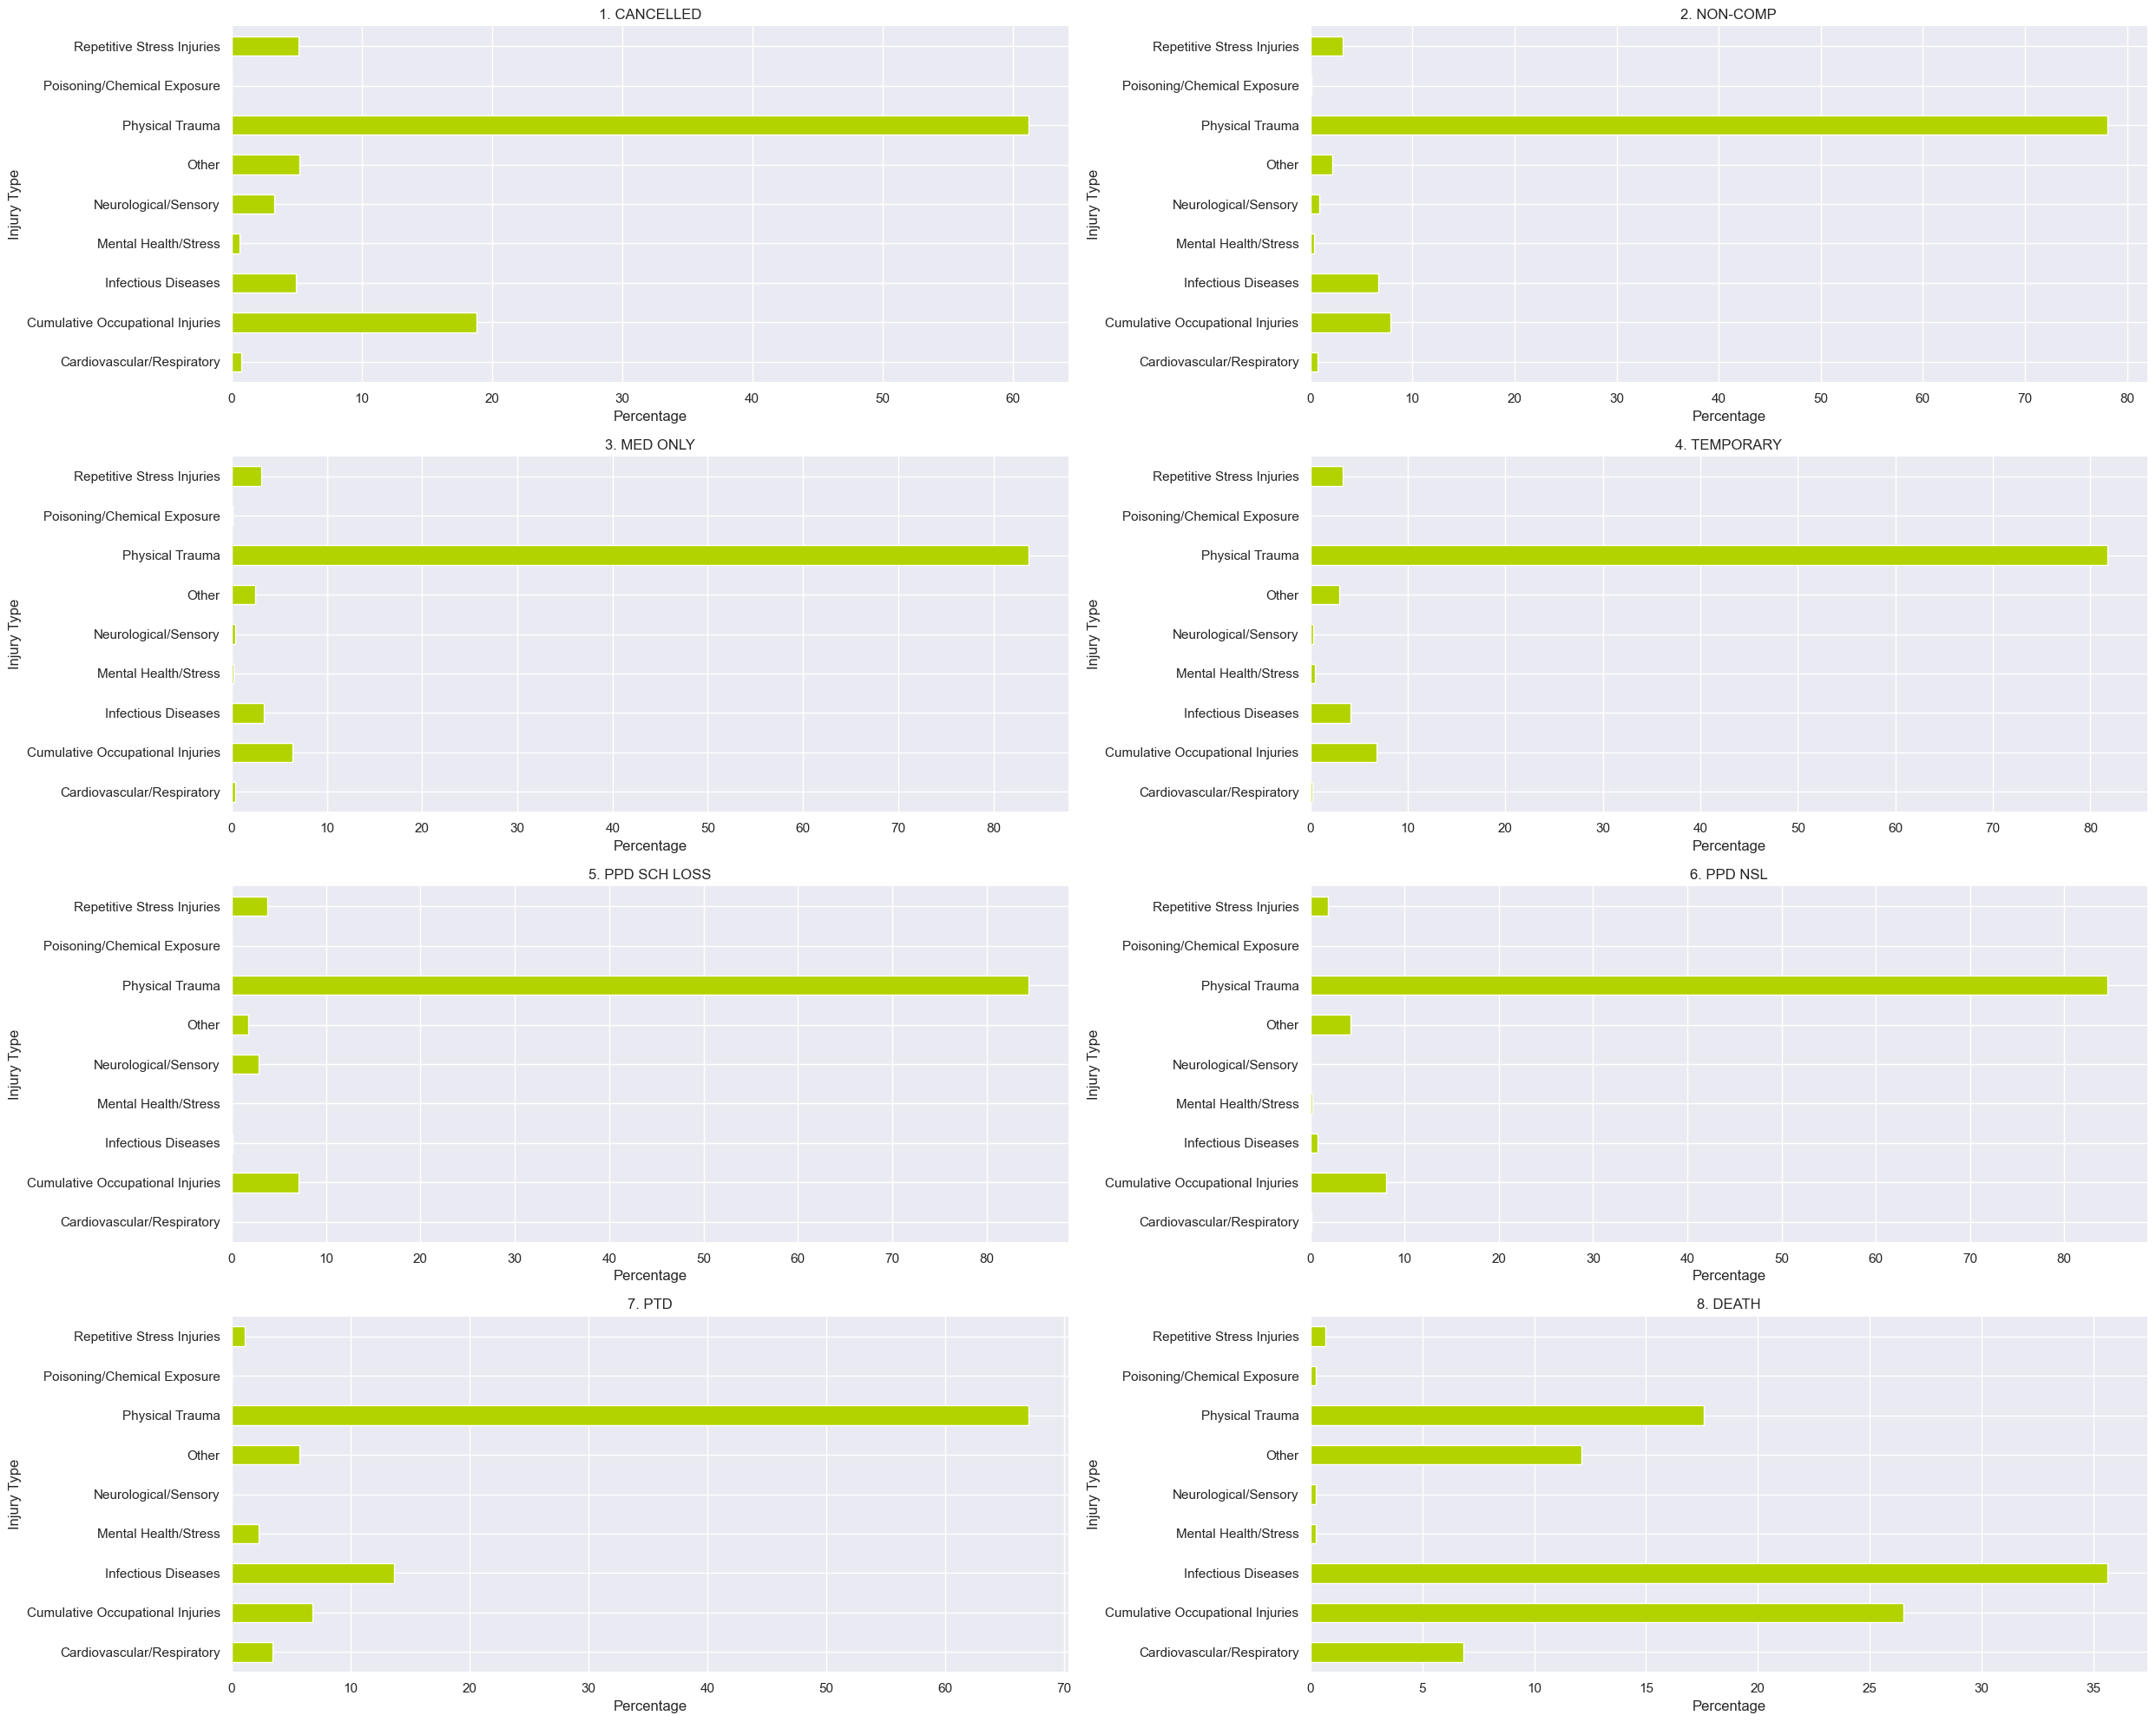

In [1762]:
injury_group_percentage = df_train.groupby(['Claim Injury Type', 'injury_type']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, injury_group_percentage.index):
    injury_group_percentage.loc[claim_type].plot(kind='barh', ax=ax, color='#B2D300')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_ylabel('Injury Type')
    ax.set_xlabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

This graph, like some of the graphs shown before, changes the most in cases where death is envolved. Other types of cases are not so easily separated by these codes, as the increaases and decreases are only minor.

In [1763]:
for i in unique_cause_codes['WCIO Cause of Injury Description']:
    print(i)

FROM LIQUID OR GREASE SPILLS
REPETITIVE MOTION
OBJECT BEING LIFTED OR HANDLED
HAND TOOL, UTENSIL; NOT POWERED
FALL, SLIP OR TRIP, NOC
CUT, PUNCTURE, SCRAPE, NOC
OTHER - MISCELLANEOUS, NOC
STRUCK OR INJURED, NOC
FALLING OR FLYING OBJECT
CHEMICALS
COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE
LIFTING
TWISTING
ON SAME LEVEL
STRAIN OR INJURY BY, NOC
MOTOR VEHICLE, NOC
FROM DIFFERENT LEVEL (ELEVATION)
PUSHING OR PULLING
FOREIGN MATTER (BODY) IN EYE(S)
FELLOW WORKER, PATIENT OR OTHER PERSON
STEAM OR HOT FLUIDS
STATIONARY OBJECT
ON ICE OR SNOW
ABSORPTION, INGESTION OR INHALATION, NOC
PERSON IN ACT OF A CRIME
OBJECT BEING LIFTED OR HANDLED
INTO OPENINGS
ON STAIRS
FROM LADDER OR SCAFFOLDING
SLIP, OR TRIP, DID NOT FALL
JUMPING OR LEAPING
OBJECT BEING LIFTED OR HANDLED
MOTOR VEHICLE
RUBBED OR ABRADED, NOC
REACHING
OBJECT HANDLED
HOT OBJECTS OR SUBSTANCES
ELECTRICAL CURRENT
HOLDING OR CARRYING
CAUGHT IN, UNDER OR BETWEEN, NOC
nan
FIRE OR FLAME
CUMULATIVE, NOC
POWERED HAND TOOL, APPLIANCE
STRIKING AG

### Cause of Injury

The causes of accident can also be grouped:
- Slips, Trips, and Falls (related to losing balance or falling)
- Lifting, Carrying, and Handling (injuries related to lifting or handling objects)
- Struck by or Contact with Objects (injuries from being hit or coming into contact with objects)
- Vehicle and Machinery Accidents (related to collisions, crashes, or machine injuries)
- Chemical, Environmental, and Biological Hazards (exposure to harmful substances or environments)
- Manual Tools and Physical Operations (injuries caused by tools or physical operations)
- Repetitive Motion and Strain (injuries from repeated actions or excessive strain)
- Miscellaneous Causes (other causes that don’t fit into the above categories)

Note: 'NOC' means 'Not Otherwise Classified', this code is used for observations that don't fit into a specific claissification/category. 'FALL, SLIP OR TRIP, NOC' means it is a fall, slip or trip that does not fit in the categories present in the list such as snow or stairs.

(https://workinjuryrights.com/glossary/not-otherwise-classified-noc/)

In [1764]:
slips_trips_falls = ["FROM LIQUID OR GREASE SPILLS", "FALL, SLIP OR TRIP, NOC", "ON SAME LEVEL", "FROM DIFFERENT LEVEL (ELEVATION)", 
                     "ON ICE OR SNOW", "INTO OPENINGS", "ON STAIRS", "FROM LADDER OR SCAFFOLDING", "SLIP, OR TRIP, DID NOT FALL", 
                     "JUMPING OR LEAPING"]

lifting_carrying_handling = ["OBJECT BEING LIFTED OR HANDLED", "LIFTING", "PUSHING OR PULLING", "HOLDING OR CARRYING", 
                             "OBJECT HANDLED", "OBJECT HANDLED BY OTHERS"]

struck_by_or_contact = ["STRUCK OR INJURED, NOC", "FALLING OR FLYING OBJECT", "STEAM OR HOT FLUIDS", 
                        "STATIONARY OBJECT", "ELECTRICAL CURRENT", "HOT OBJECTS OR SUBSTANCES", 
                        "CAUGHT IN, UNDER OR BETWEEN, NOC", "FIRE OR FLAME", "CONTACT WITH, NOC", 
                        "BROKEN GLASS", "STEPPING ON SHARP OBJECT", "GUNSHOT", "ANIMAL OR INSECT"]

vehicle_machinery_accidents = ["COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE", "MOTOR VEHICLE, NOC", "MOTOR VEHICLE", "VEHICLE UPSET", "COLLISION WITH A FIXED OBJECT", 
                               "CRASH OF RAIL VEHICLE", "CRASH OF WATER VEHICLE", "CRASH OF AIRPLANE", "MOVING PARTS OF MACHINE", "MACHINE OR MACHINERY", "POWERED HAND TOOL, APPLIANCE", 
                               "USING TOOL OR MACHINERY", "MOVING PART OF MACHINE", "HAND TOOL OR MACHINE IN USE"]

chemical_environmental_biological = ["CHEMICALS", "DUST, GASES, FUMES OR VAPORS", "ABSORPTION, INGESTION OR INHALATION, NOC", 
                                     "MOLD", "CUMULATIVE, NOC", "TEMPERATURE EXTREMES", "COLD OBJECTS OR SUBSTANCES", "RADIATION", 
                                     "ABNORMAL AIR PRESSURE"]

manual_tools_operations = ["HAND TOOL, UTENSIL; NOT POWERED", "CUT, PUNCTURE, SCRAPE, NOC", "RUBBED OR ABRADED, NOC", 
                           "SANDING, SCRAPING, CLEANING OPERATION", "WELDING OPERATION", "STRIKING AGAINST OR STEPPING ON, NOC", 
                           "USING TOOL OR MACHINERY"]

repetitive_motion_strain = ["REPETITIVE MOTION", "REACHING", "TWISTING", "STRAIN OR INJURY BY, NOC"]

Other = ["OTHER - MISCELLANEOUS, NOC", "FELLOW WORKER, PATIENT OR OTHER PERSON", "FOREIGN MATTER (BODY) IN EYE(S)",
                "OTHER THAN PHYSICAL CAUSE OF INJURY", "PANDEMIC", "TERRORISM", "NATURAL DISASTERS", "EXPLOSION OR FLARE BACK", 
                "COLLAPSING MATERIALS (SLIDES OF EARTH)"]


In [1765]:
df_train['injury_cause'] = np.nan
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(lifting_carrying_handling), 'injury_cause'] = 'Lifting, Carrying, and Handling'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(struck_by_or_contact), 'injury_cause'] = 'Struck by or Contact with Objects'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(vehicle_machinery_accidents), 'injury_cause'] = 'Vehicle and Machinery Accidents'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(chemical_environmental_biological), 'injury_cause'] = 'Chemical, Environmental, and Biological Hazards'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(manual_tools_operations), 'injury_cause'] = 'Manual Tools and Physical Operations'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(repetitive_motion_strain), 'injury_cause'] = 'Repetitive Motion and Strain'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(Other), 'injury_cause'] = 'Other'


C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\322722587.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Slips, Trips, and Falls' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'


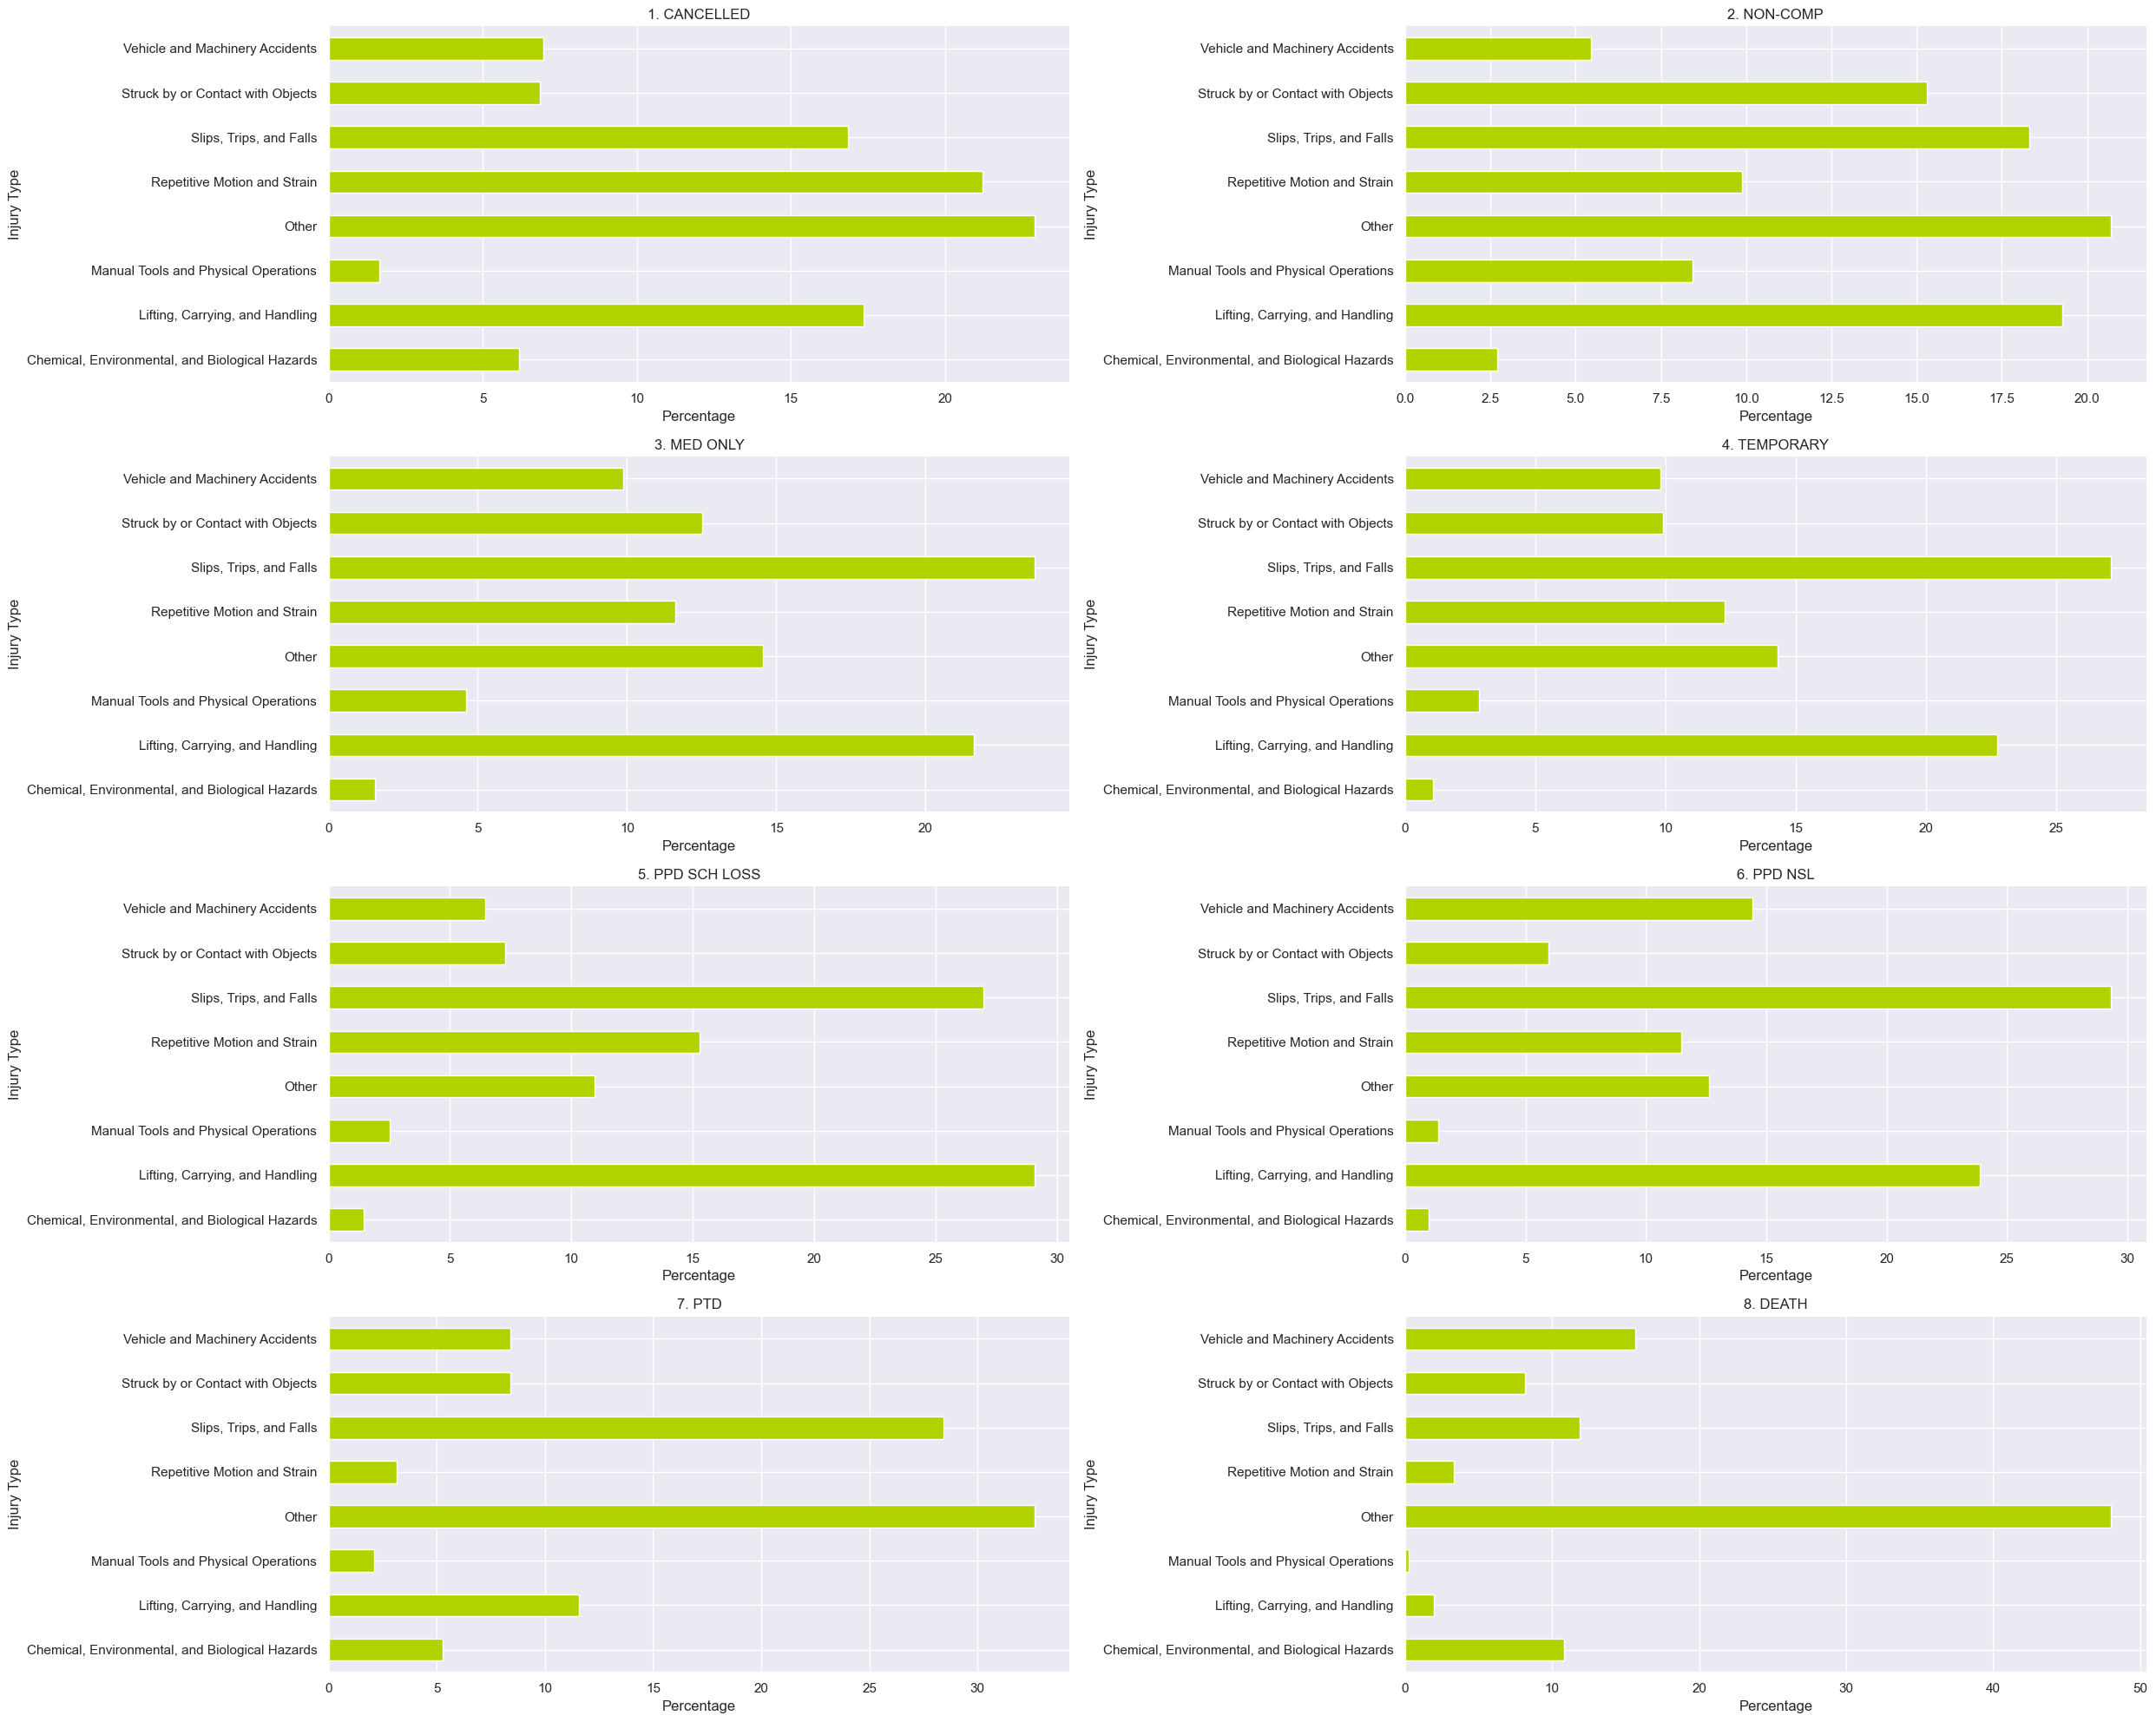

In [1766]:
cause_group_percentage = df_train.groupby(['Claim Injury Type', 'injury_cause']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, cause_group_percentage.index):
    cause_group_percentage.loc[claim_type].plot(kind='barh', ax=ax, color='#B2D300')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_ylabel('Injury Type')
    ax.set_xlabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

Unlike in the other bar charts, the causes for the accidents seem to be a differenciating factor. As always, this could be due to the fact that as cases get more severe the number of cases dwindles and so 3 or for cases caused by "repetitive motion or strain" can already account for a large portion of the cases in a category.

### Industry Codes

Industry codes can be categorized into five main groups:

- Natural Resources and Utilities
- Goods Production and Trade
- Services
- Education Health Public Services
- Leisure Hospitality

Like before this selection is done manually.

In [1767]:
unique_industry_codes = df_train[['Industry Code', 'Industry Code Description']].drop_duplicates()

In [1768]:
unique_industry_codes

,Industry Code,Industry Code Description
0,44,RETAIL TRADE
1,23,CONSTRUCTION
2,56,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
4,62,HEALTH CARE AND SOCIAL ASSISTANCE
6,72,ACCOMMODATION AND FOOD SERVICES
8,61,EDUCATIONAL SERVICES
11,51,INFORMATION
16,31,MANUFACTURING
17,48,TRANSPORTATION AND WAREHOUSING
18,45,RETAIL TRADE


In [1769]:
natural_resources_utilities = ["AGRICULTURE, FORESTRY, FISHING AND HUNTING", "MINING", "UTILITIES"]

goods_production_and_trade = ["CONSTRUCTION", "MANUFACTURING", "WHOLESALE TRADE", "RETAIL TRADE"]

services = ["TRANSPORTATION AND WAREHOUSING", "INFORMATION", "FINANCE AND INSURANCE", "REAL ESTATE AND RENTAL AND LEASING", 
            "PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES", "MANAGEMENT OF COMPANIES AND ENTERPRISES", 
            "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION SERVICES",
            "OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)"]

education_health_public_services = ["EDUCATIONAL SERVICES", "HEALTH CARE AND SOCIAL ASSISTANCE",
                                    "PUBLIC ADMINISTRATION"]

leisure_hospitality = ["ARTS, ENTERTAINMENT, AND RECREATION", "ACCOMMODATION AND FOOD SERVICES"]

In [1770]:
df_train['industry_group'] = np.nan
df_train.loc[df_train['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources and Utilities'
df_train.loc[df_train['Industry Code Description'].isin(goods_production_and_trade), 'industry_group'] = 'Goods Production and Trade'
df_train.loc[df_train['Industry Code Description'].isin(services), 'industry_group'] = 'Services'
df_train.loc[df_train['Industry Code Description'].isin(education_health_public_services), 'industry_group'] = 'Education Health and Public Services'
df_train.loc[df_train['Industry Code Description'].isin(leisure_hospitality), 'industry_group'] = 'Leisure Hospitality'

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\2895561375.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Natural Resources and Utilities' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources and Utilities'


<BarContainer object of 5 artists>

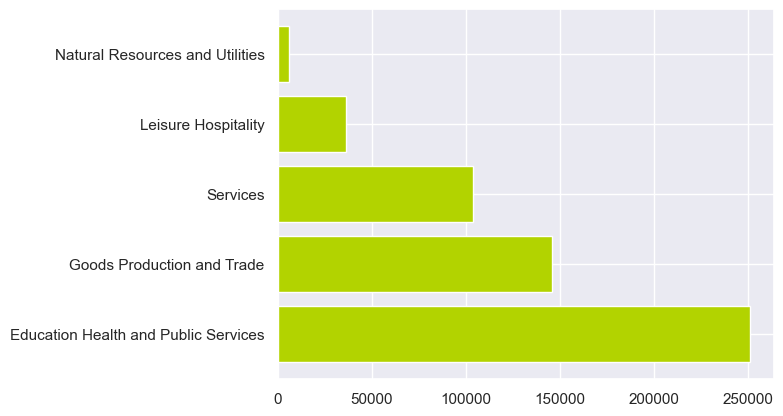

In [1771]:
df_train['industry_group'].value_counts()
plt.barh(df_train['industry_group'].value_counts().index, df_train['industry_group'].value_counts().values, color='#B2D300')

Most of the cases belong to the education, health and public services, with almos double the number of cases of the second most frequent industry group.

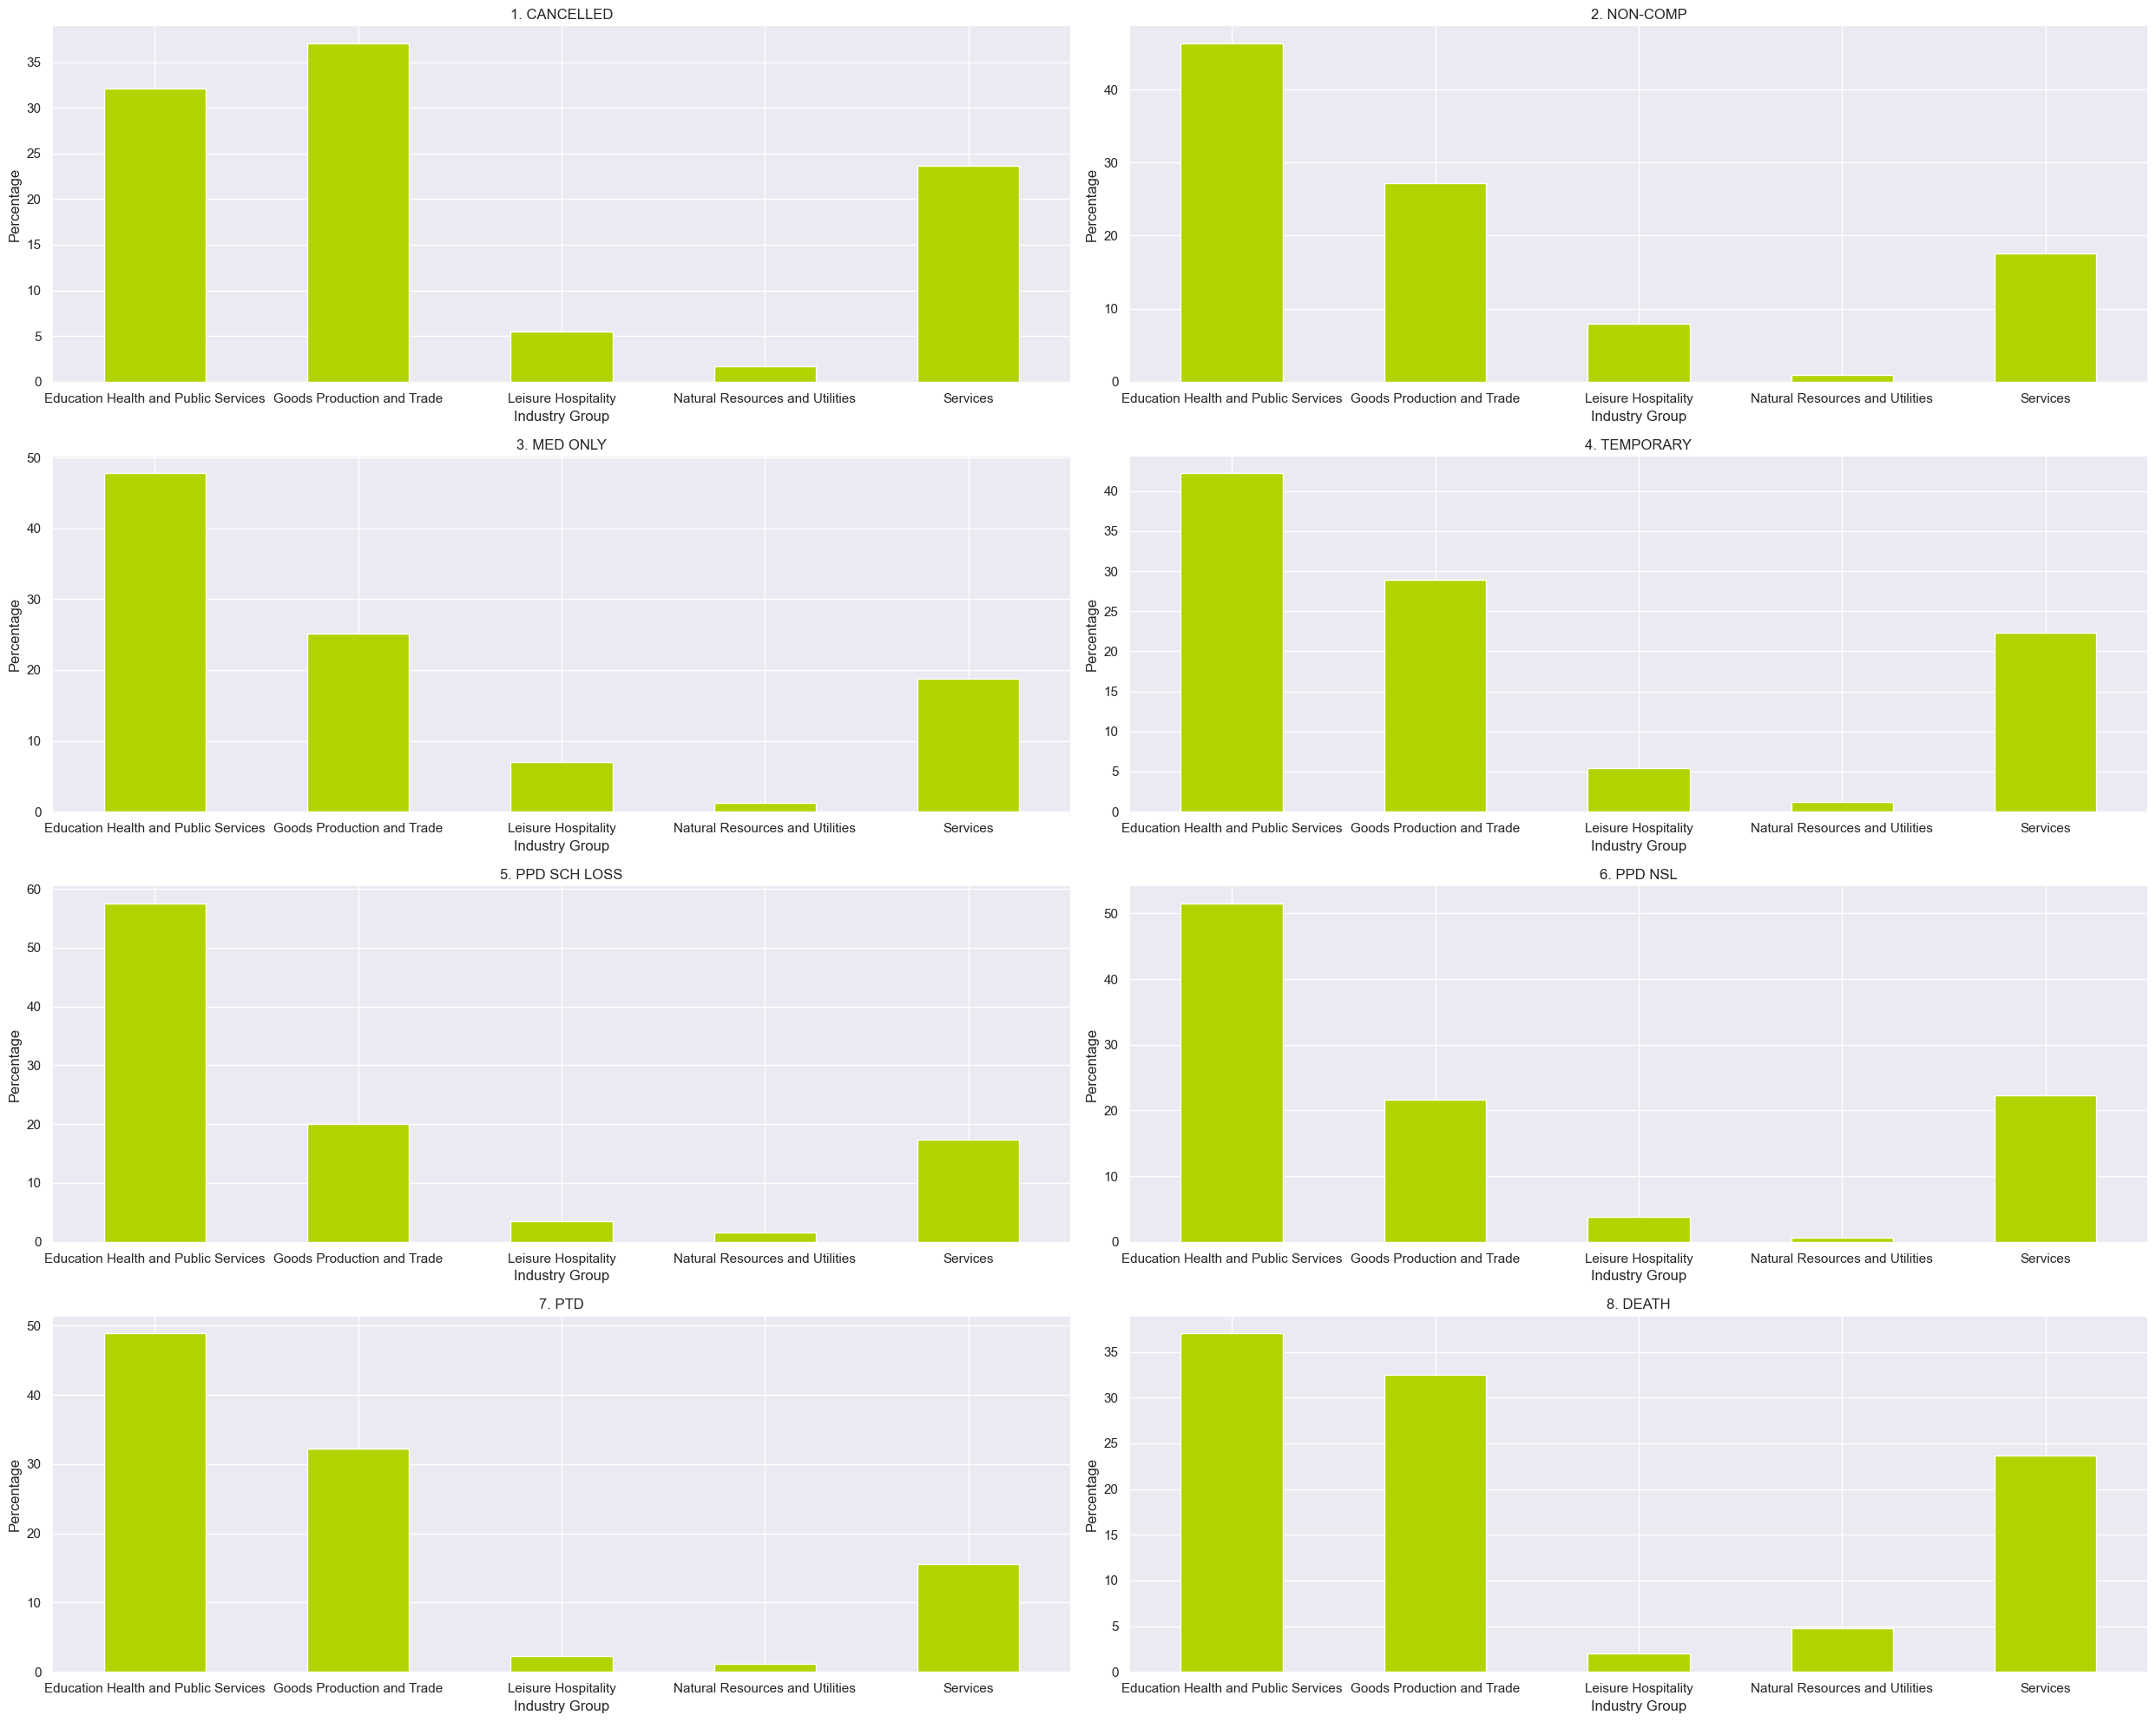

In [1772]:
industry_group_percentage = df_train.groupby(['Claim Injury Type', 'industry_group']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, industry_group_percentage.index):
    industry_group_percentage.loc[claim_type].plot(kind='bar', ax=ax, color='#B2D300')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_xlabel('Industry Group')
    ax.set_ylabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

'Education Health and Public Services' takes the lead in every category except for one. For canceled cases the most l industry is 'Goods Production and Trade' (by around 5%). The least represented industry is 'Natural Resources and Utilities'. This industry like other minority code groups ('head' in the body_groups, 'Infecteous Diseases' in the nature group), reacehs its peak in the most severe accidents.

## Agreement Reached

For the open-ended segment of our project, the group has chosen to predict an additional variable: Agreement Reached.

This variable indicates whether an agreement was reached between the parties involved before the intervention of the Workers' Compensation Board.

Exploring the relationships between 'Agreement Reached' and other variables can uncover information about the conditions that favor agreements before Workers' Compensation Board intervention.

First, let's look at the distribution of the Agreement Reached to see how this variable behaves in this data set.

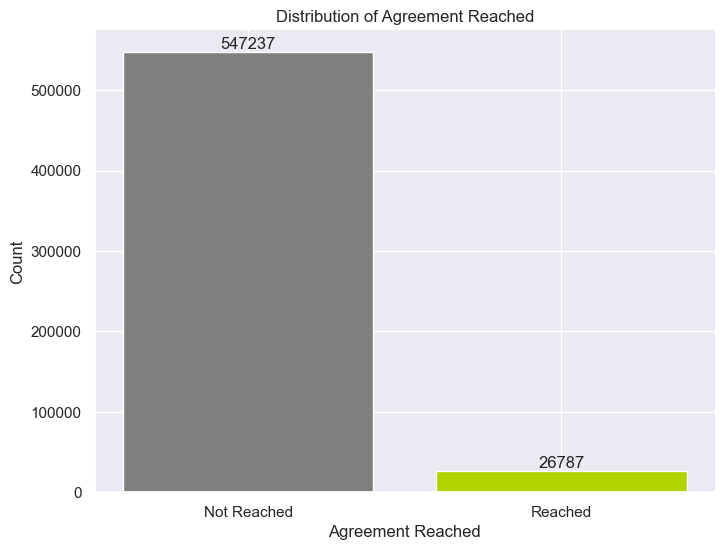

In [1773]:
agreement_reached_counts = df_train['Agreement Reached'].value_counts()
plt.figure(figsize=(8, 6)) 
plt.bar(agreement_reached_counts.index, agreement_reached_counts.values, color=['grey','#B2D300'])
plt.xticks(ticks=[0, 1], labels=['Not Reached', 'Reached'])
plt.xlabel('Agreement Reached')
plt.ylabel('Count')
plt.title('Distribution of Agreement Reached')
plt.grid(True)

for index, value in enumerate(agreement_reached_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

It is essential to analyze the relationships between "Agreement Reached" and other variables in the dataset to determine its relevance for prediction.

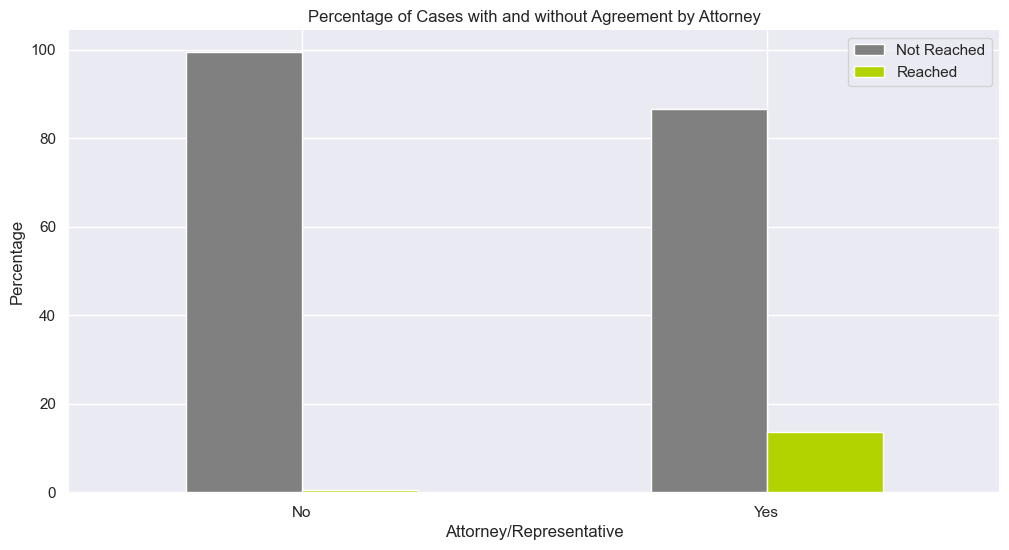

In [1774]:
df_train['Attorney/Representative'] = df_train['Attorney/Representative'].replace({'N': 'No', 'Y': 'Yes'})
agreement_by_attorney = pd.crosstab(df_train['Attorney/Representative'], df_train['Agreement Reached'])
agreement_by_attorney.columns = ['Not Reached', 'Reached']
agreement_by_attorney['Reached'] = (agreement_by_attorney['Reached'] / (agreement_by_attorney['Not Reached'] + agreement_by_attorney['Reached'])) * 100
agreement_by_attorney['Not Reached'] = 100 - agreement_by_attorney['Reached']
agreement_by_attorney.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Attorney/Representative')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and without Agreement by Attorney')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

From this graph, it is possible to understand that the presence of an attorney influences the likelihood of reaching an agreement. Even though there are way more cases where it was not reached, there is still a big increase in the number of cases in which it is possible to reach an agreement, when an attorney is present.

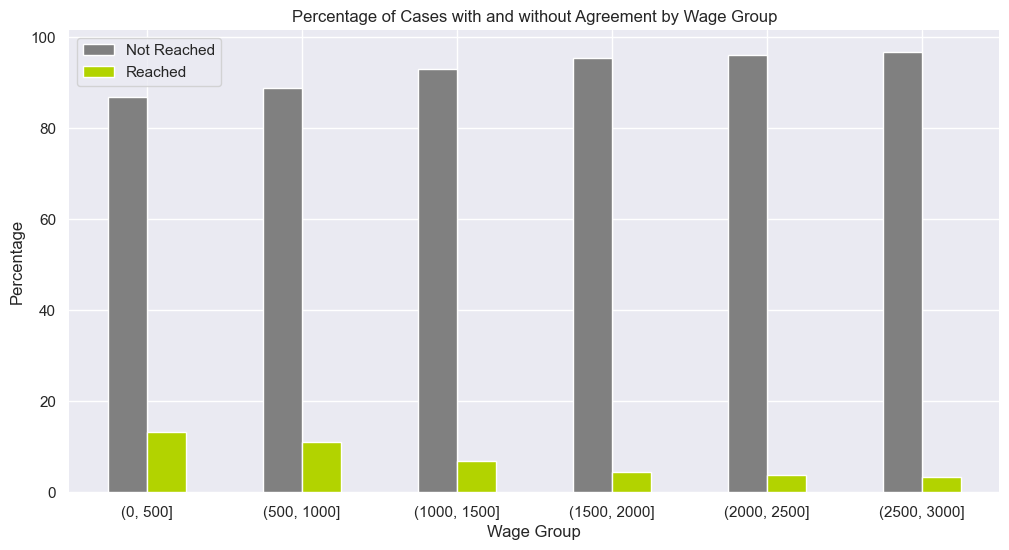

In [1775]:
agreement_by_wage = pd.crosstab(df_train1['wage_groups'], df_train['Agreement Reached'])
agreement_by_wage.columns = ['Not Reached', 'Reached']
agreement_by_wage['Reached'] = (agreement_by_wage['Reached'] / (agreement_by_wage['Not Reached'] + agreement_by_wage['Reached'])) * 100
agreement_by_wage['Not Reached'] = 100 - agreement_by_wage['Reached']
agreement_by_wage.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Wage Group')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and without Agreement by Wage Group')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Cases in lower wage groups have a higher percentage of agreements reached compared to those in higher wage groups. Additionally, as the level of wage increase, the agreement not being reached also increases.

In [1776]:
df_train['COVID-19 Indicator'] = df_train['COVID-19 Indicator'].replace({'N': 'No', 'Y': 'Yes'})
agreement_by_covid = pd.crosstab(df_train['COVID-19 Indicator'], df_train['Agreement Reached'])
agreement_by_covid.columns = ['Not Reached', 'Reached']

agreement_by_covid['Reached'] = (agreement_by_covid['Reached'] / (agreement_by_covid['Not Reached'] + agreement_by_covid['Reached'])) * 100
agreement_by_covid['Not Reached'] = 100 - agreement_by_covid['Reached']

agreement_covid_table = agreement_by_covid[['Reached', 'Not Reached']].copy()
agreement_covid_table.index.name = 'COVID-19 Indicator'
agreement_covid_table.columns = ['Agreement Reached (%)', 'Agreement Not Reached (%)'] 
pd.DataFrame(agreement_covid_table)

,Agreement Reached (%),Agreement Not Reached (%)
COVID-19 Indicator,,
No,4.807110,95.192890
Yes,1.874932,98.125068


The table indicates that when the claim is not related to COVID-19, the percentage of cases reaching an agreement is higher.

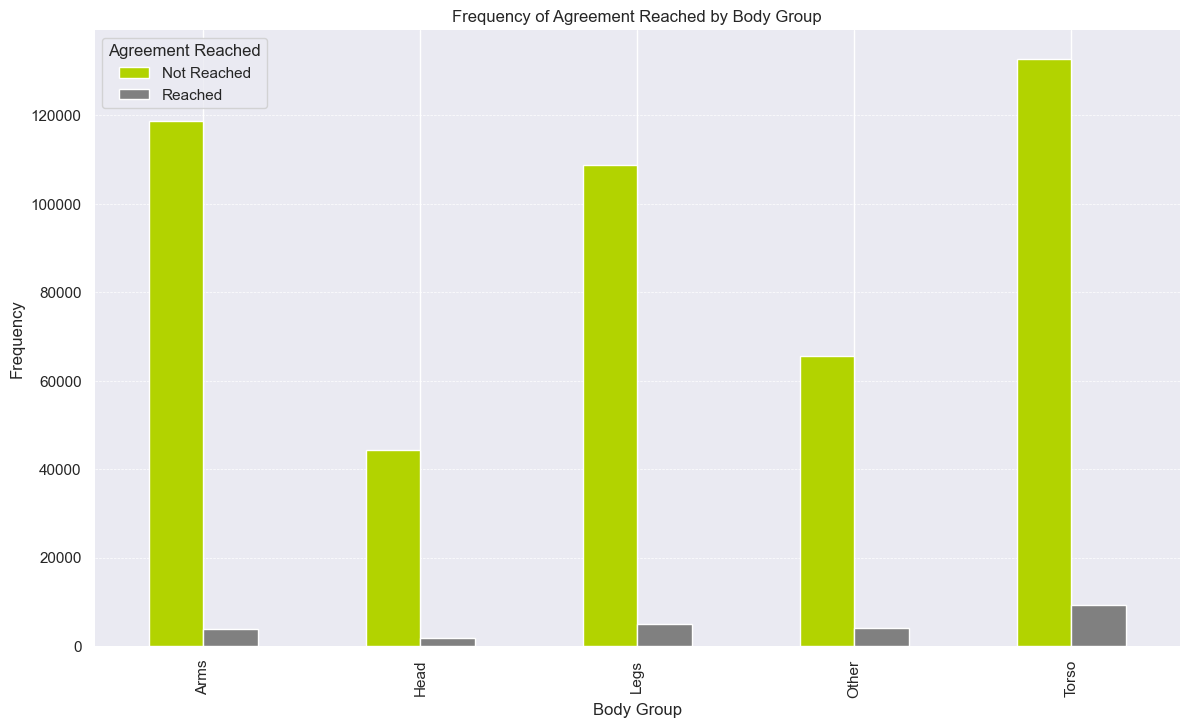

In [1777]:
df_train['Agreement Reached'] = df_train['Agreement Reached'].astype(object)
df_train['Agreement Reached'] = df_train['Agreement Reached'].replace({0: 'Not Reached', 1: 'Reached'})
agreement_by_body_group = df_train.groupby(['Agreement Reached', 'body_group']).size().unstack()

fig, ax = plt.subplots(figsize=(14, 8))
agreement_by_body_group.T.plot(kind='bar', ax=ax, color=['#B2D300', 'Grey'])
ax.set_xlabel('Body Group')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Agreement Reached by Body Group')
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The graph shows that the percentage of cases in which an agreement is reached varies significantly across different body parts. In particular, for arm injuries, the percentage of cases in which an agreement is not reached is significantly higher than the percentage of cases in which an agreement is reached.

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\4262305741.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\4262305741.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


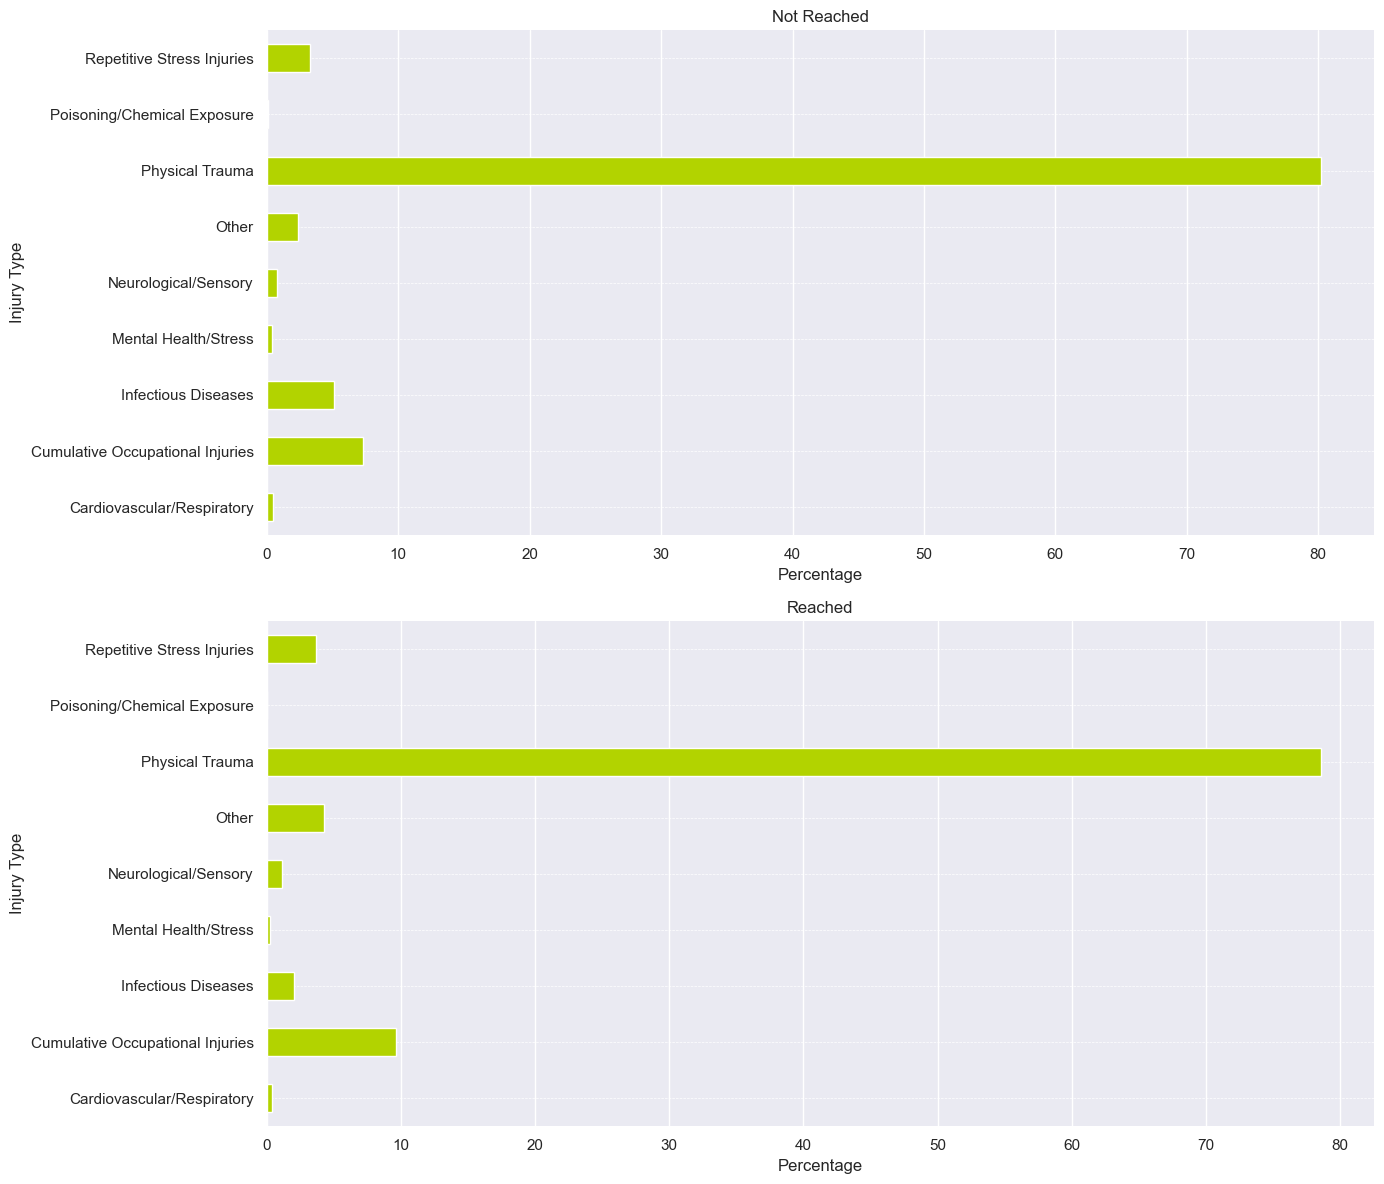

In [1778]:
agreement_by_injury_type = df_train.groupby(['Agreement Reached', 'injury_type']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))
axes = axes.flatten()

for ax, agreement_status in zip(axes, agreement_by_injury_type.index):
    agreement_by_injury_type.loc[agreement_status].plot(kind='barh', ax=ax, color='#B2D300')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(agreement_status)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('Injury Type')
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

In both categories, "Physical Trauma" is overwhelmingly the most common injury type, accounting for the largest proportion by far. Other injuries, such as "Infectious Diseases" and "Cumulative Occupational Injuries," are present but with much smaller percentages, and the overall pattern of injury types is quite similar between the two groups. This suggests that regardless of the group, physical trauma is the predominant injury type faced

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\204109365.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\204109365.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


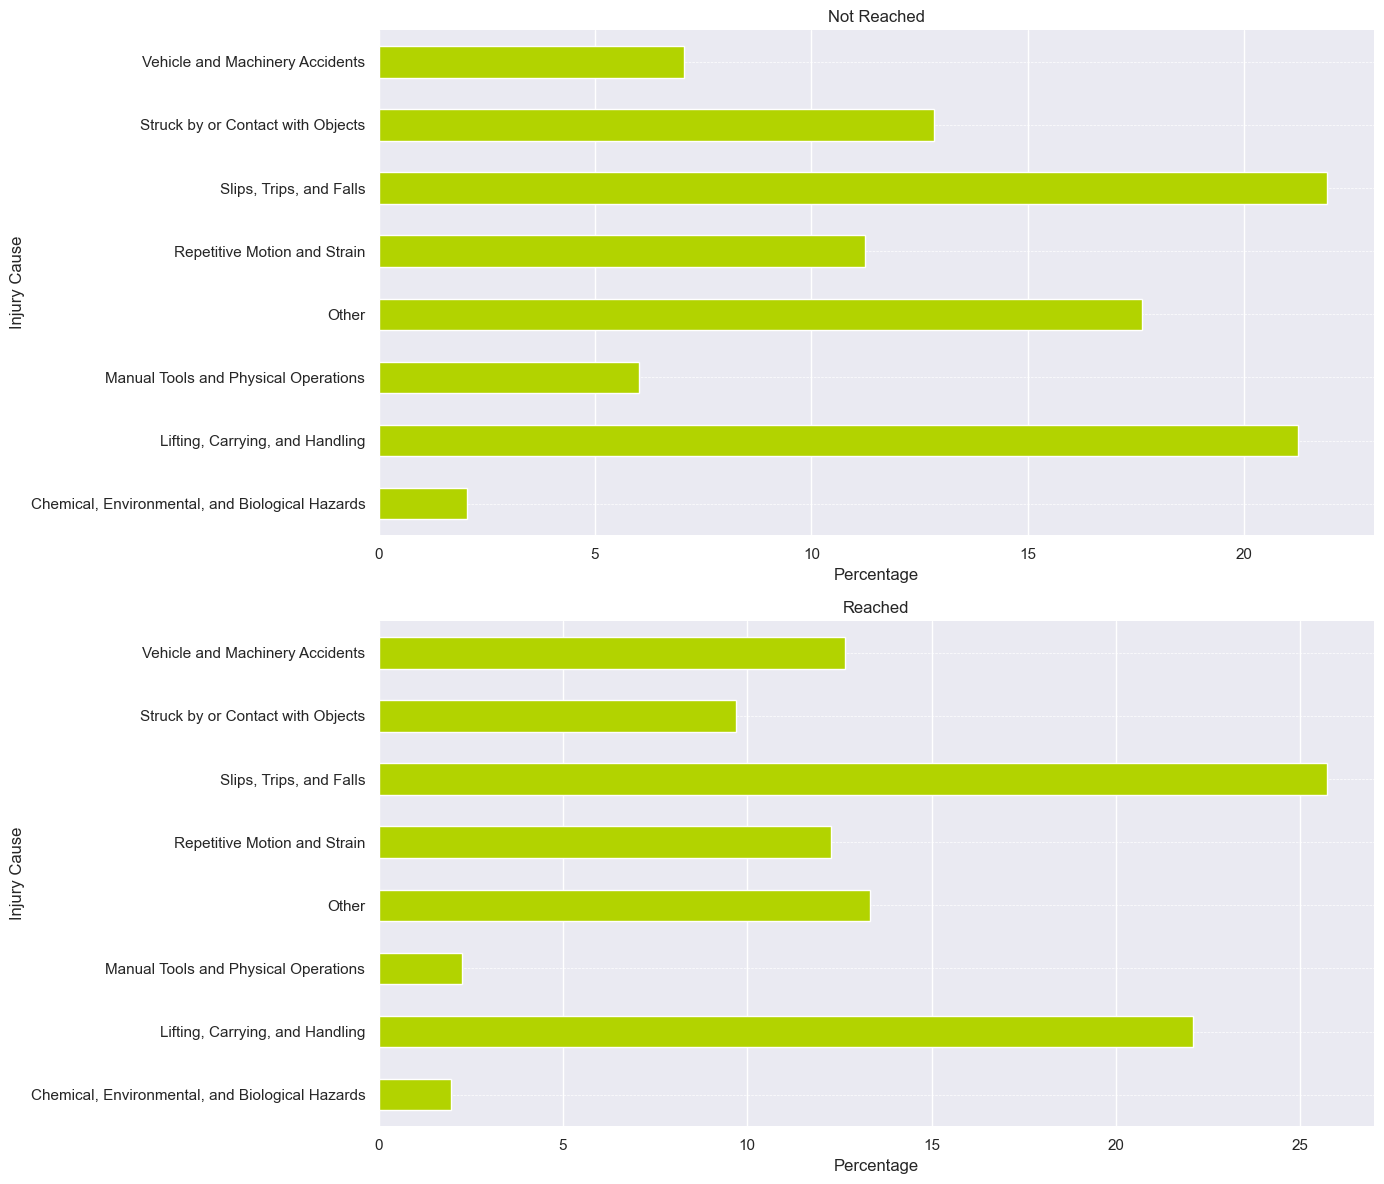

In [1779]:
agreement_by_injury_cause = df_train.groupby(['Agreement Reached', 'injury_cause']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))
axes = axes.flatten()

for ax, agreement_status in zip(axes, agreement_by_injury_cause.index):
    agreement_by_injury_cause.loc[agreement_status].plot(kind='barh', ax=ax, color='#B2D300')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(agreement_status)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('Injury Cause')
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

The chart indicates that certain injury types, such as "Slips, Trips, and Falls" and "Lifting, Carrying, and Handling" are consistently significant contributors to injuries in both "Reached" and "Not Reached" cases. This trend could reflect common challenges in resolving cases involving these types of injuries or their overall higher frequency. Meanwhile, less common causes, like "Chemical, Environmental, and Biological Hazards" are rare across both groups, suggesting that they may be easier to resolve or simply occur less frequently.

## Zip Codes

For zip codes, we can group them into nine main groups:
- Syracuse
- Rochester
- Albany
- Hauppage
- NYC
- Buffalo
- Binghamton
- Stadewide
- Other

This has to be done manually as we did before with the other groups.

In [1780]:
unique_zip_codes = df_train[['Zip Code']].drop_duplicates()

In [1781]:
unique_zip_codes

,Zip Code
0,13662
1,14569
2,12589
4,12603
5,11772
...,...
592341,30046
592553,90241
592799,G9B0Y
592810,15143


In [1782]:
df_train = df_train[df_train['Zip Code'].notna()]
df_train = df_train[df_train['Zip Code'].astype(str).str.isnumeric()]
df_train['Zip Code'] = df_train['Zip Code'].astype(int)

zip_ranges = [
    (10001, 10282, 'NYC'), (11722, 11788, 'Hauppage'), (12201, 12288, 'Albany'), 
    (13120, 13290, 'Syracuse'), (13901, 13905, 'Binghamton'), (14201, 14280, 'Buffalo'), 
    (14602, 14694, 'Rochester')
]

def get_range_label(zip_code):
    for lower, upper, label in zip_ranges:
        if lower <= zip_code <= upper:
            return label
    return 'Statewide'

df_train['zip_group'] = df_train['Zip Code'].apply(get_range_label)

df_train[['zip_group']]

,zip_group
0,Statewide
1,Statewide
2,Statewide
4,Statewide
5,Hauppage
...,...
593451,Statewide
593455,Statewide
593456,Buffalo
593457,NYC


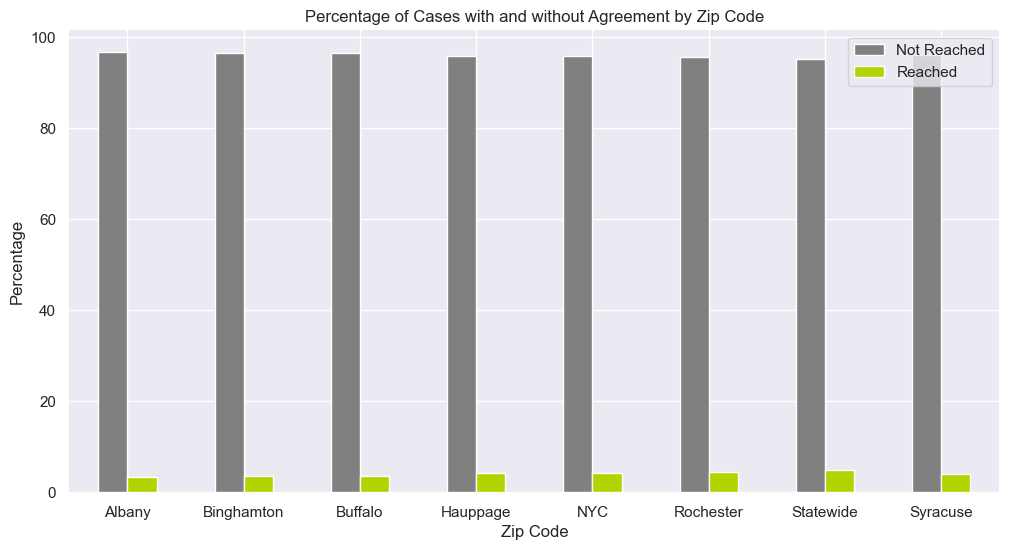

In [1783]:
agreement_by_zip_code = pd.crosstab(df_train['zip_group'], df_train['Agreement Reached'])
agreement_by_zip_code.columns = ['Not Reached', 'Reached']
agreement_by_zip_code['Reached'] = (agreement_by_zip_code['Reached'] / (agreement_by_zip_code['Not Reached'] + agreement_by_zip_code['Reached'])) * 100
agreement_by_zip_code['Not Reached'] = 100 - agreement_by_zip_code['Reached']
agreement_by_zip_code.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Zip Code')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and without Agreement by Zip Code')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

## Time to Assembly Date

How does the time between accidents and the day of the claim assembly vary?

To create this variable we subtract the accdient date from the assembly date.

Note: The assembly date is the date the claim was first assembled.

In [1784]:
df_train['days_accident_to_assembly'] = (df_train['Assembly Date'] - df_train['Accident Date']).dt.days

In [1785]:
negative_days = df_train[df_train['days_accident_to_assembly'] < 0]
negative_days

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,...,Agreement Reached,Number of Dependents,age_group,wage_groups,body_group,injury_type,injury_cause,industry_group,zip_group,days_accident_to_assembly
168,2020-02-26,57,N,2020-01-01,Yes,1997.87,1962.0,2019-12-31,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,...,Not Reached,0,51-60,High Wage,Arms,Cumulative Occupational Injuries,Repetitive Motion and Strain,Education Health and Public Services,Statewide,-56.0
412,2020-01-23,62,N,2020-01-02,Yes,1775.89,1957.0,2020-01-14,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,...,Not Reached,3,61-70,High Wage,Other,Cumulative Occupational Injuries,Other,Services,Statewide,-21.0
798,2020-01-27,57,N,2020-01-03,Yes,1450.00,NaN,2020-01-15,NEW YORK CITY TRANSIT AUTH,3A. SELF PUBLIC,...,Not Reached,5,51-60,Medium Wage,Head,Neurological/Sensory,Other,Services,Statewide,-24.0
1332,2020-01-23,56,N,2020-01-03,Yes,1334.92,0.0,2020-01-06,STATE INSURANCE FUND,2A. SIF,...,Reached,3,51-60,Medium Wage,Arms,Repetitive Stress Injuries,Other,NaN,Statewide,-20.0
1926,2020-01-20,54,N,2020-01-06,Yes,NaN,1966.0,2020-03-19,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,...,Not Reached,1,51-60,NaN,Arms,Cumulative Occupational Injuries,Repetitive Motion and Strain,Education Health and Public Services,Statewide,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589744,2023-02-07,51,N,2022-12-22,Yes,1646.06,1971.0,2022-12-22,LIBERTY INSURANCE CORP.,1A. PRIVATE,...,Not Reached,3,51-60,High Wage,Arms,Repetitive Stress Injuries,Repetitive Motion and Strain,Goods Production and Trade,Statewide,-47.0
589838,2022-12-23,53,N,2022-12-22,Yes,2945.09,1969.0,2023-02-15,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,...,Not Reached,2,51-60,High Wage,NaN,Cumulative Occupational Injuries,"Lifting, Carrying, and Handling",Education Health and Public Services,Hauppage,-1.0
590739,2023-02-02,52,N,2022-12-26,Yes,992.39,1970.0,2022-12-26,MASSACHUSETTS BAY INS.CO.C/O,1A. PRIVATE,...,Not Reached,6,51-60,Medium Wage,Arms,Physical Trauma,Repetitive Motion and Strain,Services,Statewide,-38.0
590745,2022-12-28,55,N,2022-12-26,No,0.00,1967.0,2022-12-26,STATE INSURANCE FUND,2A. SIF,...,Not Reached,3,51-60,No Wage,Torso,Physical Trauma,"Slips, Trips, and Falls",Education Health and Public Services,Statewide,-2.0


In [1786]:
print(f'There are {len(negative_days)} rows where the Assembly Date is before the Accident Date, this amounts to {round(len(negative_days)/len(df_train)*100, 2)}% of the data.')

There are 1283 rows where the Assembly Date is before the Accident Date, this amounts to 0.24% of the data.


There are cases where the date of the accident precedes the data of the assembly, obviously this should be impossible. These rows will be adressed in the data cleaning proccess.

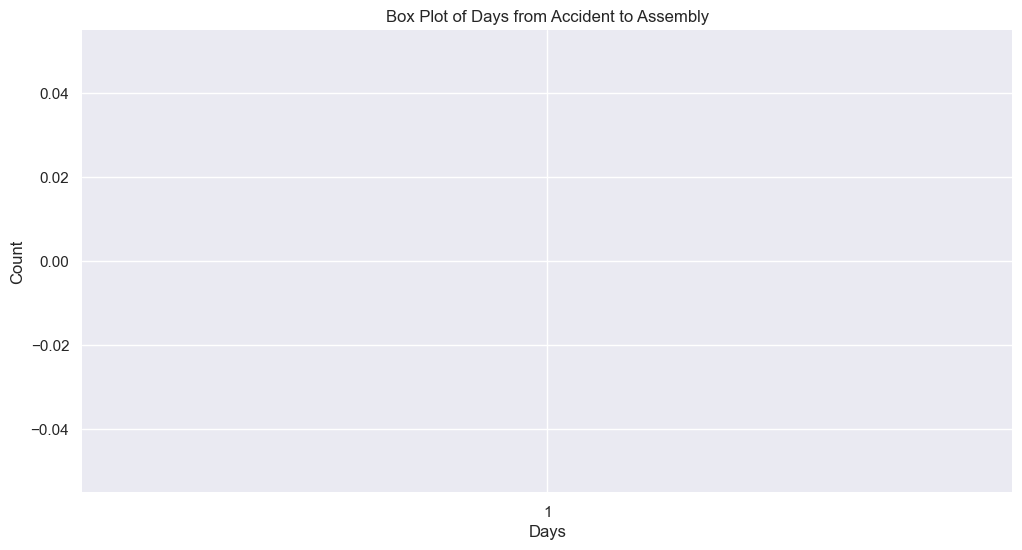

In [1787]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_train['days_accident_to_assembly'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Box Plot of Days from Accident to Assembly')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The days can be grouped into the following categories:
- 1 week (7 days)
- 1 month (30 days)
- 3 Months (90 days)
- 6 months (180 days)
- 1 year (365 days)
- 365 x 10 (10 years)
- 365 x 60 (60 years, this group was created to encompass all observations)

In [1788]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_train['days_accident_to_assembly_binned'] = pd.cut(df_train['days_accident_to_assembly'], bins=bins, labels=labels)

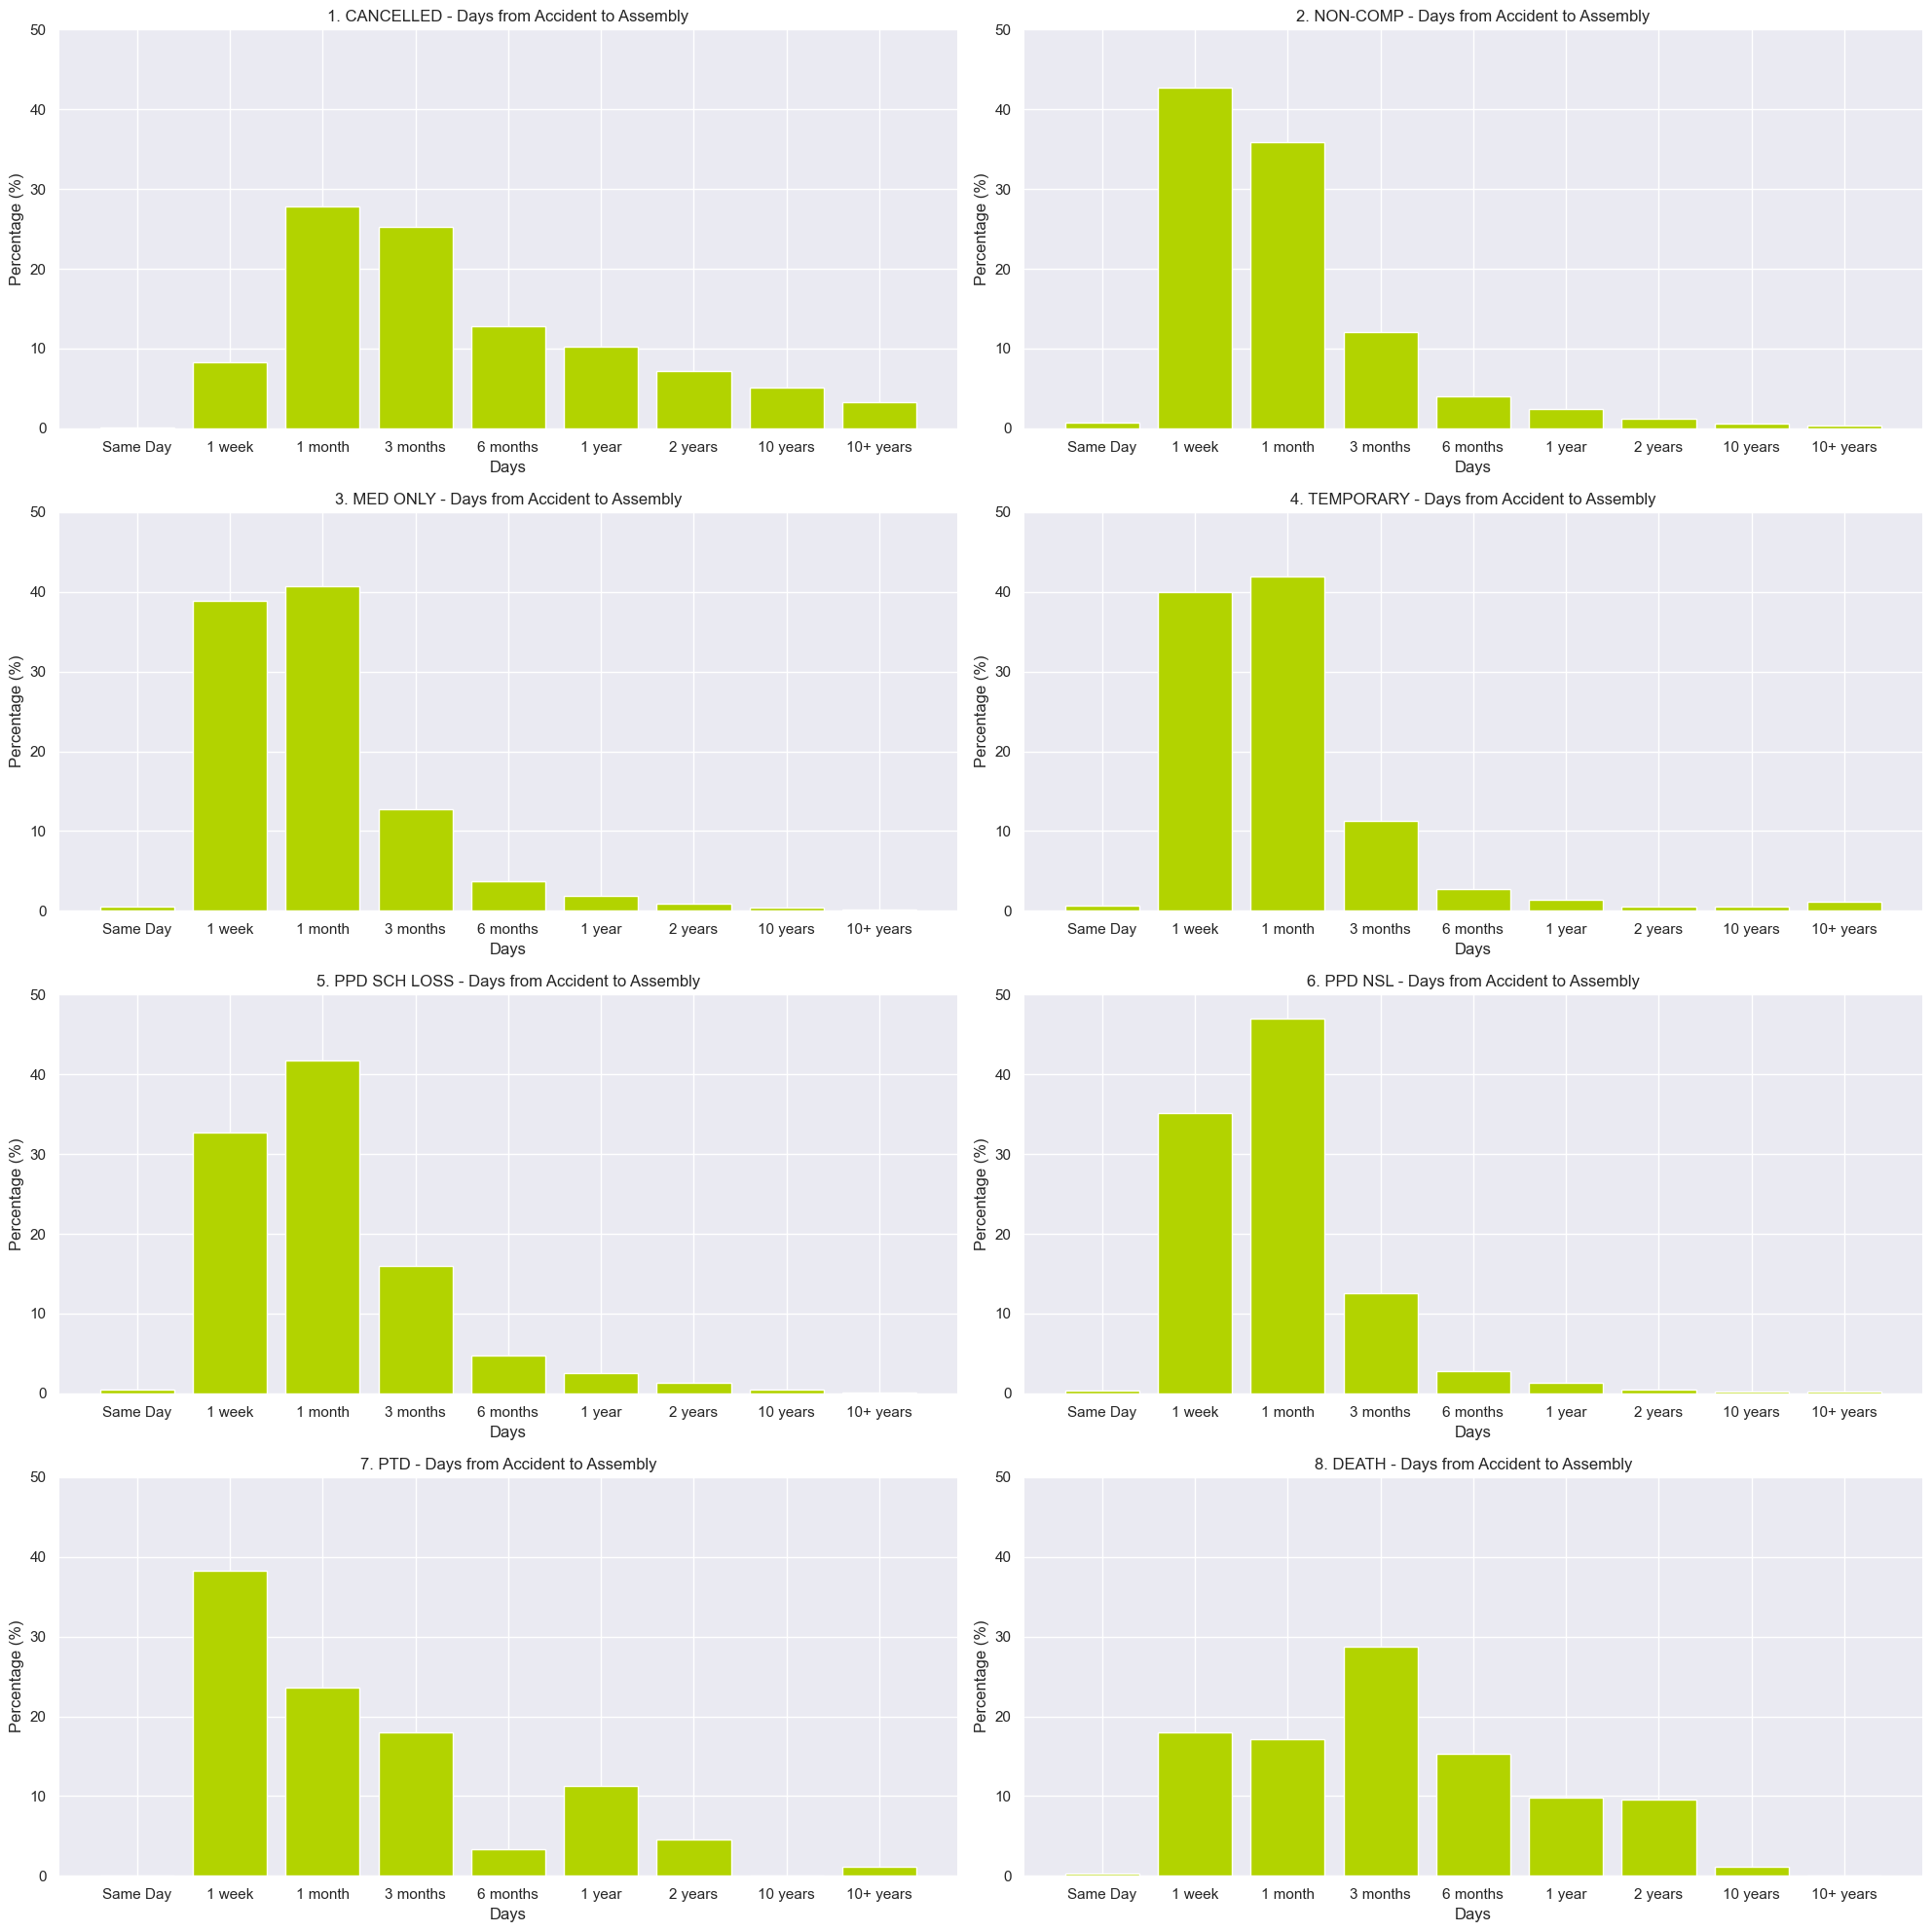

In [1789]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
claim_list = ['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH']

for ax, claim in zip(axes.flatten(), claim_list):
    days_accident_binned = df_train[df_train['Claim Injury Type'] == claim]['days_accident_to_assembly_binned'].value_counts().sort_index()
    bars = ax.bar(days_accident_binned.index.astype(str), days_accident_binned.values / days_accident_binned.values.sum() * 100, color='#B2D300')
    ax.set_title(f'{claim} - Days from Accident to Assembly')
    ax.set_xlabel('Days')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 50)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

Expectedly most of the claiments present in the dataset had their claims assembled within a month of the accident date. Unexpectedly the type of claim where more time elapsed between accident and claim assembly is the cases envolving death. This rise in 'waiting time' could possibly be due to the compexity of creating a claim for a case where a person died (such as the need for an autopsy report or police investigations)

There are some outliers - one observation waited for almost 60 years before assembeling the claim - but these cases will most likely be removed in the data cleaning phase, as they represent outliers.

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\1111260897.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_train_encoded[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df_train_encoded[column]):
C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\1111260897.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_train_encoded[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df_train_encoded[column]):
C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\1111260897.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df_train_encoded[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df_train_encoded[column]):


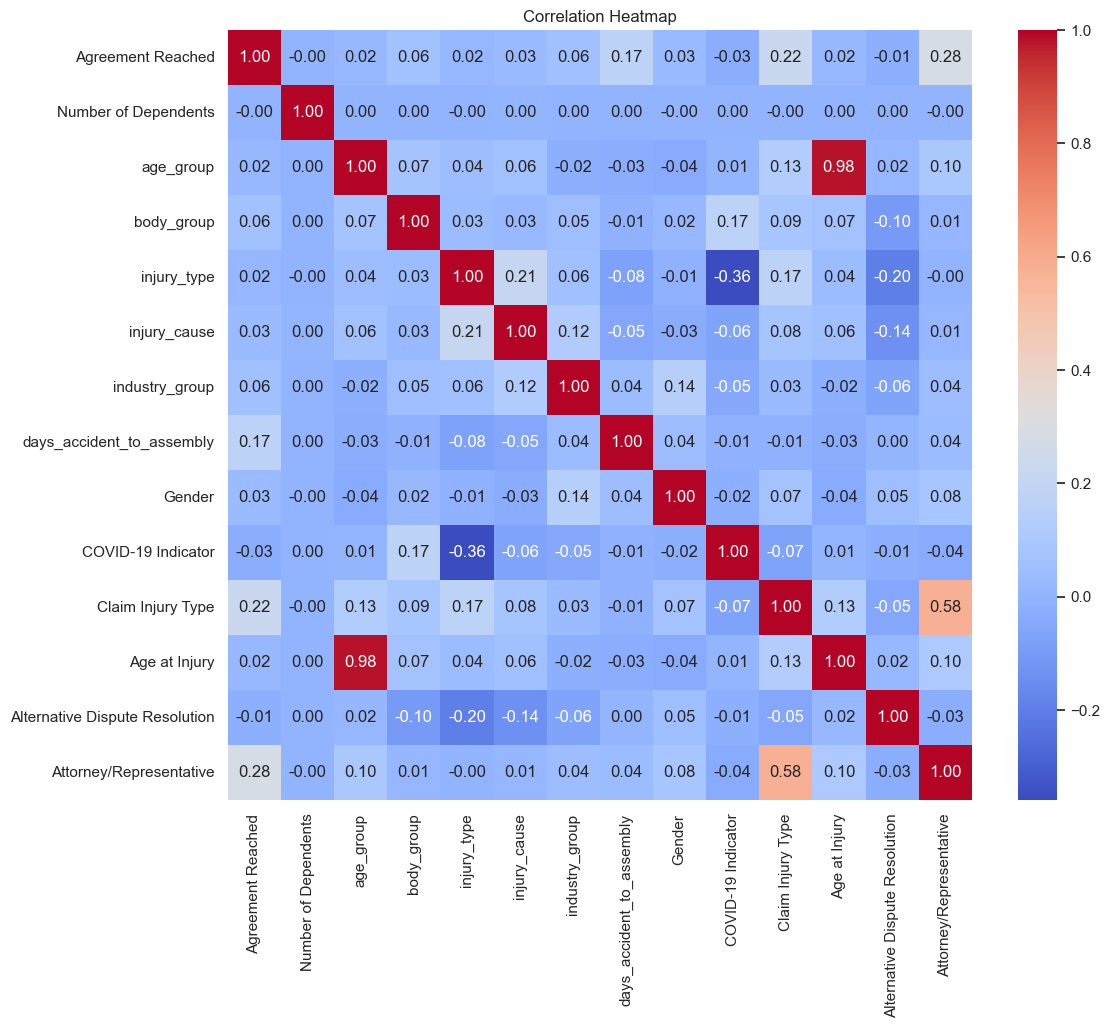

In [1790]:
lists = [
    "Agreement Reached",
    "Number of Dependents",
    "age_group",
    "body_group",
    "injury_type",
    "injury_cause",
    "industry_group",
    "days_accident_to_assembly",
    "Gender",
    "COVID-19 Indicator",
    "Claim Injury Type",
    "Age at Injury",
    "Alternative Dispute Resolution",
    "Attorney/Representative"
]
df_train_encoded = df_train.copy()
for column in lists:
    if df_train_encoded[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df_train_encoded[column]):
        df_train_encoded[column] = df_train_encoded[column].astype('category').cat.codes

correlation_matrix = df_train_encoded[lists].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


There seem te be no such values

## Cramér's V

Cramér's V is a metric for measuring the correlation between categorical variables. In python there are no functions to calculate this metric, instead a function that is available online will be used.

References:<br>
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792<br>
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

### Claim Injury Type

In [1791]:
var_list = ['age_group', 'body_group', 'injury_type', 'injury_cause', 'industry_group','Attorney/Representative', 'COVID-19 Indicator', 'days_accident_to_assembly_binned', 'Carrier Type', 'zip_group']

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

for i in var_list:
    cvi = cramers_v(df_train['Claim Injury Type'], df_train[i])
    if cvi >= 0.1:
        print(f'{i} : {cvi:.2f}')

body_group : 0.10
Attorney/Representative : 0.61
COVID-19 Indicator : 0.10


According to Cramér's V the only variable that is correlated to the 1st traget variable is "Attorney/Representative".

### Agreement Reached

In [1792]:
for i in var_list:
    cvi = cramers_v(df_train['Agreement Reached'], df_train[i])
    if cvi >= 0.1:
        print(f'{i} : {cvi:.2f}')

Attorney/Representative : 0.28
days_accident_to_assembly_binned : 0.18
Carrier Type : 0.10


The same result is obtain in the second variable, althought the connection is weaker.

The variables concerning the codes might be correlated if joined together being that they are the causes and results of the accidents.

In [1793]:
df_train['combined_group'] = df_train['age_group'].astype(str) + "_" + df_train['industry_group'].astype(str)
df_train['combined_injury_group'] = df_train['injury_type'].astype(str) + "_" + df_train['injury_cause'].astype(str) + df_train['body_group'].astype(str) + df_train['industry_group'].astype(str)
#df_train['super_group'] = df_train['combined_group'].astype(str) + "_" + df_train['combined_injury_group'].astype(str)
print(f"Cramér's V for Claim Injury Type and combined_group: {cramers_v(df_train['Claim Injury Type'], df_train['combined_group']):.2f}")
print(f"Cramér's V for Claim Injury Type and combined_injury_group: {cramers_v(df_train['Claim Injury Type'], df_train['combined_injury_group']):.2f}")
#print(cramers_v(df_train['Claim Injury Type'], df_train['super_group']))

Cramér's V for Claim Injury Type and combined_group: 0.13
Cramér's V for Claim Injury Type and combined_injury_group: 0.25


In [1794]:
df_train['combined_group'] = df_train['age_group'].astype(str) + "_" + df_train['industry_group'].astype(str)
df_train['combined_injury_group'] = df_train['injury_type'].astype(str) + "_" + df_train['injury_cause'].astype(str) + df_train['body_group'].astype(str) + df_train['industry_group'].astype(str)
#df_train['super_group'] = df_train['combined_group'].astype(str) + "_" + df_train['combined_injury_group'].astype(str)
print(f"Cramér's V for Agreement Reached and combined_group: {cramers_v(df_train['Agreement Reached'], df_train['combined_group']):.2f}")
print(f"Cramér's V for Agreement Reached and combined_injury_group: {cramers_v(df_train['Agreement Reached'], df_train['combined_injury_group']):.2f}")
#print(cramers_v(df_train['Claim Injury Type'], df_train['super_group']))

Cramér's V for Agreement Reached and combined_group: 0.10
Cramér's V for Agreement Reached and combined_injury_group: 0.16


In [1796]:
df_train.to_csv('df_train_v1.csv', index=False)

# Data Cleaning

### Transforming the test data

Before beginning the data cleaning process, all the alterations that were performed on df_train will be applied to df_test:

In [1797]:
df_test = pd.read_csv('test_data.csv')
df_train = pd.read_csv('df_train_v1.csv')

In [1798]:
# Check for the columns in the training set are in the testing set

for i in df_train.columns:
    if i not in df_test.columns:
        print(i)

Claim Injury Type
Agreement Reached
age_group
wage_groups
body_group
injury_type
injury_cause
industry_group
zip_group
days_accident_to_assembly
days_accident_to_assembly_binned
combined_group
combined_injury_group


In [1799]:
# Check for missing values in df_train
missing_rows_train = df_train.isnull().any(axis=1).sum()
total_rows_train = len(df_train)
percent_missing_train = (missing_rows_train / total_rows_train) * 100
print(f"Missing rows in df_train: {round(percent_missing_train, 2)}%")

Missing rows in df_train: 28.19%


In [1800]:
df_test = df_test.drop(columns=['OIICS Nature of Injury Description', 'C-3 Date', 'First Hearing Date', 'IME-4 Count'])

In [1801]:
int_list = ['Age at Injury', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']
for i in int_list:
    df_test[i] = pd.to_numeric(df_test[i], errors='coerce').astype('Int64')
    df_train[i] = pd.to_numeric(df_train[i], errors='coerce').astype('Int64')

In [1802]:
date_list = ['Accident Date', 'Assembly Date', 'C-2 Date']
for i in date_list:
    df_test[i] = pd.to_datetime(df_test[i], errors='coerce')
    df_train[i] = pd.to_datetime(df_train[i], errors='coerce')

In [1803]:
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 130)
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '+100']
df_test['age_group'] = pd.cut(df_test['Age at Injury'], bins=bins, labels=labels)

In [1804]:
bins = [-1, 0, 750, 1500, 3000, df_train['Average Weekly Wage'].max()]
labels = ['No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
df_train['wage_groups'] = pd.cut(df_train['Average Weekly Wage'], bins=bins, labels=labels)

In [1805]:
head = [
    "MULTIPLE HEAD INJURY", "EYE(S)", "MOUTH", "EAR(S)", "SKULL", "FACIAL BONES", 
    "TEETH", "NOSE", "BRAIN", "LARYNX", "TRACHEA", "MULTIPLE NECK INJURY"
]

torso = [
    "TORSO", "SHOULDER(S)", "LUNGS", "BUTTOCKS", "LOWER BACK AREA", "ABDOMEN INCLUDING GROIN", 
    "HIP", "CHEST", "DISC", "UPPER BACK AREA", "PELVIS", "HEART", "VERTEBRAE", 
    "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA", "SACRUM AND COCCYX", "SPINAL CORD"
]

arm = [
    "ARMS", "FINGER(S)", "THUMB", "WRIST", "HAND", "UPPER ARM", "ELBOW", "WRIST (S) & HAND(S)"
]

leg = [
    "LEGS", "ANKLE", "KNEE", "LOWER LEG", "UPPER LEG", "FOOT", "TOES", "GREAT TOE", 
    "MULTIPLE LOWER EXTREMITIES"
]

other = [
    "SPINAL CORD", "SOFT TISSUE", "MULTIPLE UPPER EXTREMITIES", "MULTIPLE BODY PARTS (INCLUDING BODY", 
    "BODY SYSTEMS AND MULTIPLE BODY SYSTEMS", "NO PHYSICAL INJURY", "MULTIPLE TRUNK", 
    "WHOLE BODY", "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...", "INTERNAL ORGANS"
]

In [1806]:
# Checking for new information
defined_body_parts = set(head + torso + arm + leg + other)

unique_body_parts = set(df_test['WCIO Part Of Body Description'].dropna().unique())

new = list(unique_body_parts - defined_body_parts)

print(new)

['ARTIFICIAL APPLIANCE', 'INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED', 'LOWER ARM', 'MULTIPLE']


In [1807]:
arm.append('LOWER ARM')
other.extend(['ARTIFICIAL APPLIANCE', 'INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED', 'MULTIPLE'])

In [1808]:
df_test['body_group'] = np.nan
df_test.loc[df_test['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(torso), 'body_group'] = 'Torso'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(arm), 'body_group'] = 'Arms'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(leg), 'body_group'] = 'Legs'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(other), 'body_group'] = 'Other'

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\301018767.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Head' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'


In [1809]:
physical_trauma = ["CONTUSION", "SPRAIN OR TEAR", "CONCUSSION", "PUNCTURE", "LACERATION", "BURN", 
                   "STRAIN OR TEAR", "FRACTURE", "FOREIGN BODY", "RUPTURE", "DISLOCATION", "CRUSHING", 
                   "SEVERANCE", "ELECTRIC SHOCK", "AMPUTATION"]

repetitive_stress_injuries = ["INFLAMMATION", "CARPAL TUNNEL SYNDROME", "HERNIA", "VDT - RELATED DISEASES"]

cumulative_occupational_injuries = ["ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC", "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER CUMULATIVE INJURY, NOC", 
                                    "DUST DISEASE, NOC", "ASBESTOSIS", "SILICOSIS", "BLACK LUNG", "BYSSINOSIS"]

infectious_diseases = ["INFECTION", "COVID-19", "CONTAGIOUS DISEASE", "HEPATITIS C", "AIDS"]

poisoning_chemical_exposure = ["POISONING - GENERAL (NOT OD OR CUMULATIVE)", "POISONING - CHEMICAL, (OTHER THAN METALS)", "POISONING - METAL", 
                               "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION"]

cardiovascular_respiratory = ["ANGINA PECTORIS", "MYOCARDIAL INFARCTION", "RESPIRATORY DISORDERS", 
                              "VASCULAR", "ASPHYXIATION", "HEAT PROSTRATION"]

neurological_sensory = ["HEARING LOSS OR IMPAIRMENT", "LOSS OF HEARING", "VISION LOSS", "ENUCLEATION", "SYNCOPE"]

mental_health_stress = ["MENTAL STRESS", "MENTAL DISORDER"]

other = ["MULTIPLE PHYSICAL INJURIES ONLY", "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL", 
         "FREEZING", "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION"]

In [1810]:
# Checking for new information
defined_nature_types = set(physical_trauma + repetitive_stress_injuries + cumulative_occupational_injuries + infectious_diseases + poisoning_chemical_exposure + cardiovascular_respiratory + neurological_sensory + mental_health_stress + other)	

unique_nature_types = set(df_test['WCIO Nature of Injury Description'].dropna().unique())

new = list(unique_nature_types - defined_nature_types)

print(new)

['NO PHYSICAL INJURY', 'POISONING - GENERAL (NOT OD OR CUMULATIVE', 'CANCER', 'DERMATITIS']


In [1811]:
poisoning_chemical_exposure.append('POISONING - GENERAL (NOT OD OR CUMULATIVE')
other.extend(['NO PHYSICAL INJURY', 'CANCER', 'DERMATITIS'])

In [1812]:
df_test['injury_type'] = np.nan
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(repetitive_stress_injuries), 'injury_type'] = 'Repetitive Stress Injuries'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(cumulative_occupational_injuries), 'injury_type'] = 'Cumulative Occupational Injuries'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(infectious_diseases), 'injury_type'] = 'Infectious Diseases'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(poisoning_chemical_exposure), 'injury_type'] = 'Poisoning/Chemical Exposure'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(cardiovascular_respiratory), 'injury_type'] = 'Cardiovascular/Respiratory'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(neurological_sensory), 'injury_type'] = 'Neurological/Sensory'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(mental_health_stress), 'injury_type'] = 'Mental Health/Stress'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(other), 'injury_type'] = 'Other'

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\1236285978.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Physical Trauma' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'


In [1813]:
slips_trips_falls = ["FROM LIQUID OR GREASE SPILLS", "FALL, SLIP OR TRIP, NOC", "ON SAME LEVEL", "FROM DIFFERENT LEVEL (ELEVATION)", 
                     "ON ICE OR SNOW", "INTO OPENINGS", "ON STAIRS", "FROM LADDER OR SCAFFOLDING", "SLIP, OR TRIP, DID NOT FALL", 
                     "JUMPING OR LEAPING"]

lifting_carrying_handling = ["OBJECT BEING LIFTED OR HANDLED", "LIFTING", "PUSHING OR PULLING", "HOLDING OR CARRYING", 
                             "OBJECT HANDLED", "OBJECT HANDLED BY OTHERS"]

struck_by_or_contact = ["STRUCK OR INJURED, NOC", "FALLING OR FLYING OBJECT", "STEAM OR HOT FLUIDS", 
                        "STATIONARY OBJECT", "ELECTRICAL CURRENT", "HOT OBJECTS OR SUBSTANCES", 
                        "CAUGHT IN, UNDER OR BETWEEN, NOC", "FIRE OR FLAME", "CONTACT WITH, NOC", 
                        "BROKEN GLASS", "STEPPING ON SHARP OBJECT", "GUNSHOT", "ANIMAL OR INSECT"]

vehicle_machinery_accidents = ["COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE", "MOTOR VEHICLE, NOC", "MOTOR VEHICLE", "VEHICLE UPSET", "COLLISION WITH A FIXED OBJECT", 
                               "CRASH OF RAIL VEHICLE", "CRASH OF WATER VEHICLE", "CRASH OF AIRPLANE", "MOVING PARTS OF MACHINE", "MACHINE OR MACHINERY", "POWERED HAND TOOL, APPLIANCE", 
                               "USING TOOL OR MACHINERY", "MOVING PART OF MACHINE", "HAND TOOL OR MACHINE IN USE"]

chemical_environmental_biological = ["CHEMICALS", "DUST, GASES, FUMES OR VAPORS", "ABSORPTION, INGESTION OR INHALATION, NOC", 
                                     "MOLD", "CUMULATIVE, NOC", "TEMPERATURE EXTREMES", "COLD OBJECTS OR SUBSTANCES", "RADIATION", 
                                     "ABNORMAL AIR PRESSURE"]

manual_tools_operations = ["HAND TOOL, UTENSIL; NOT POWERED", "CUT, PUNCTURE, SCRAPE, NOC", "RUBBED OR ABRADED, NOC", 
                           "SANDING, SCRAPING, CLEANING OPERATION", "WELDING OPERATION", "STRIKING AGAINST OR STEPPING ON, NOC", 
                           "USING TOOL OR MACHINERY"]

repetitive_motion_strain = ["REPETITIVE MOTION", "REACHING", "TWISTING", "STRAIN OR INJURY BY, NOC"]

Other = ["OTHER - MISCELLANEOUS, NOC", "FELLOW WORKER, PATIENT OR OTHER PERSON", "FOREIGN MATTER (BODY) IN EYE(S)",
                "OTHER THAN PHYSICAL CAUSE OF INJURY", "PANDEMIC", "TERRORISM", "NATURAL DISASTERS", "EXPLOSION OR FLARE BACK", 
                "COLLAPSING MATERIALS (SLIDES OF EARTH)"]

In [1814]:
# Checking for new information
defined_cause_types = set(slips_trips_falls + lifting_carrying_handling + struck_by_or_contact + vehicle_machinery_accidents + chemical_environmental_biological + manual_tools_operations + repetitive_motion_strain + Other)

unique_cause_types = set(df_test['WCIO Cause of Injury Description'].dropna().unique())

new = list(unique_cause_types - defined_cause_types)

print(new)

['PERSON IN ACT OF A CRIME', 'CONTINUAL NOISE', 'WIELDING OR THROWING']


In [1815]:
Other.extend(['CONTINUAL NOISE', 'WIELDING OR THROWING', 'PERSON IN ACT OF A CRIME'])

In [1816]:
df_test['injury_cause'] = np.nan
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(lifting_carrying_handling), 'injury_cause'] = 'Lifting, Carrying, and Handling'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(struck_by_or_contact), 'injury_cause'] = 'Struck by or Contact with Objects'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(vehicle_machinery_accidents), 'injury_cause'] = 'Vehicle and Machinery Accidents'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(chemical_environmental_biological), 'injury_cause'] = 'Chemical, Environmental, and Biological Hazards'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(manual_tools_operations), 'injury_cause'] = 'Manual Tools and Physical Operations'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(repetitive_motion_strain), 'injury_cause'] = 'Repetitive Motion and Strain'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(Other), 'injury_cause'] = 'Other'


C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\2328039025.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Slips, Trips, and Falls' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'


In [1817]:
natural_resources_utilities = [
    "AGRICULTURE, FORESTRY, FISHING AND HUNTING", "MINING", "UTILITIES"
]

goods_production_and_trade = [
    "CONSTRUCTION", "MANUFACTURING", "WHOLESALE TRADE", "RETAIL TRADE"
]

services = [
    "TRANSPORTATION AND WAREHOUSING", "INFORMATION", "FINANCE AND INSURANCE", "REAL ESTATE AND RENTAL AND LEASING", 
    "PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES", "MANAGEMENT OF COMPANIES AND ENTERPRISES", 
    "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION SERVICES",
    "OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)"
]

education_health_public_services = [
    "EDUCATIONAL SERVICES", "HEALTH CARE AND SOCIAL ASSISTANCE", "PUBLIC ADMINISTRATION"
]

leisure_hospitality = [
    "ARTS, ENTERTAINMENT, AND RECREATION", "ACCOMMODATION AND FOOD SERVICES"
]

In [1818]:
# Checking for new information

defined_industries = set(natural_resources_utilities + goods_production_and_trade + services + education_health_public_services + leisure_hospitality)

unique_industries = set(df_test['Industry Code Description'].dropna().unique())

new_industries = list(unique_industries - defined_industries)
print(new_industries)


['ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT']


In [1819]:
services.append('ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT')

In [1820]:
df_test['industry_group'] = np.nan
df_test.loc[df_test['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources Utilities'
df_test.loc[df_test['Industry Code Description'].isin(goods_production_and_trade), 'industry_group'] = 'Goods Production and Trade'
df_test.loc[df_test['Industry Code Description'].isin(services), 'industry_group'] = 'Services'
df_test.loc[df_test['Industry Code Description'].isin(education_health_public_services), 'industry_group'] = 'Education Health Public Services'
df_test.loc[df_test['Industry Code Description'].isin(leisure_hospitality), 'industry_group'] = 'Leisure Hospitality'

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\1778020932.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Natural Resources Utilities' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources Utilities'


In [1821]:
df_test['days_accident_to_assembly'] = (df_test['Assembly Date'] - df_test['Accident Date']).dt.days

In [1822]:
negative_days = df_test[df_test['days_accident_to_assembly'] < 0]
percentage_negative_days = len(negative_days) / len(df_test) * 100
print(f'Percentage of rows with negative days: {percentage_negative_days:.2f}%')

Percentage of rows with negative days: 0.06%


0.06% of the rows in 'df_test' have accident dates that happen after the claim was assembled, this should be impossible and will therefore be changed

In [1823]:
df_train.loc[df_train['days_accident_to_assembly'] < 0, 'days_accident_to_assembly'] = np.nan
df_test.loc[df_test['days_accident_to_assembly'] < 0, 'days_accident_to_assembly'] = np.nan

In [1824]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_test['days_accident_to_assembly_binned'] = pd.cut(df_test['days_accident_to_assembly'], bins=bins, labels=labels)

In [1825]:
df_test['combined_group'] = df_test['age_group'].astype(str) + "_" + df_test['industry_group'].astype(str)
df_test['combined_injury_group'] = df_test['injury_type'].astype(str) + "_" + df_test['injury_cause'].astype(str) + df_test['body_group'].astype(str) + df_test['industry_group'].astype(str)

In [1826]:
bins = [-1, 0, 750, 1500, 3000, df_test['Average Weekly Wage'].max()]
labels = ['No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
df_test['wage_groups'] = pd.cut(df_test['Average Weekly Wage'], bins=bins, labels=labels)

In [1827]:
bins = (0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_test['days_accident_to_assembly_binned'] = pd.cut(df_test['days_accident_to_assembly'], bins=bins, labels=labels)

In [1828]:
df_test = df_test[df_test['Zip Code'].notna()]
df_test = df_test[df_test['Zip Code'].astype(str).str.isnumeric()]
df_test['Zip Code'] = df_test['Zip Code'].astype(int)

zip_ranges = [
    (10001, 10282, 'NYC'), (11722, 11788, 'Hauppage'), (12201, 12288, 'Albany'), 
    (13120, 13290, 'Syracuse'), (13901, 13905, 'Binghamton'), (14201, 14280, 'Buffalo'), 
    (14602, 14694, 'Rochester')
]

def get_range_label(zip_code):
    for lower, upper, label in zip_ranges:
        if lower <= zip_code <= upper:
            return label
    return 'Statewide'

df_test['zip_group'] = df_test['Zip Code'].apply(get_range_label)

df_test[['zip_group']]

,zip_group
0,Statewide
1,Statewide
2,Statewide
3,Statewide
4,Statewide
...,...
387970,Statewide
387971,Hauppage
387972,Statewide
387973,Statewide


In [1829]:
# Do a final check of columns not present in both dataframes
for i in df_train.columns:
    if i not in df_test.columns:
        print(i)
    

Claim Injury Type
Agreement Reached


In [1830]:
df_test['wage_groups'].unique()

[NaN, 'No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
Categories (5, object): ['No Wage' < 'Low Wage' < 'Medium Wage' < 'High Wage' < 'Very High Wage']

In [1831]:
df_train['wage_groups'].unique()

['No Wage', 'High Wage', 'Medium Wage', NaN, 'Low Wage', 'Very High Wage']
Categories (5, object): ['No Wage' < 'Low Wage' < 'Medium Wage' < 'High Wage' < 'Very High Wage']

### Irrelevant Data

Some of the data columns are simply irrelevant to the project's goal, they will therefore be removed.

In [1832]:
dropping = ['Carrier Name', 'Industry Code', 'Industry Code Description',
            'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
            'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description']

df_train.drop(columns=dropping, inplace=True)
df_test.drop(columns=dropping, inplace=True)

### Duplicates

The training set has already beeen checked for duplicates but the test set has not.

In [1833]:
duplicates = df_test[df_test.duplicated()]
if not duplicates.empty:
    display(duplicates)

## Duvida

Given that the test data can not be tampered with (as in no rows can be removed), these duplicates cannot be removed.

### Type Conversion

Most conversions were handled to simplify the data exploration, but a second check is necessary to make sure no column was overlooked in both datasets.

In [1834]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368352 entries, 0 to 387974
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Accident Date                     366033 non-null  datetime64[ns]
 1   Age at Injury                     368352 non-null  Int64         
 2   Alternative Dispute Resolution    368352 non-null  object        
 3   Assembly Date                     368352 non-null  datetime64[ns]
 4   Attorney/Representative           368352 non-null  object        
 5   Average Weekly Wage               350130 non-null  float64       
 6   Birth Year                        349863 non-null  float64       
 7   C-2 Date                          359670 non-null  datetime64[ns]
 8   Carrier Type                      368352 non-null  object        
 9   Claim Identifier                  368352 non-null  int64         
 10  County of Injury                  368

In [1835]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530014 entries, 0 to 530013
Data columns (total 30 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Accident Date                     526584 non-null  datetime64[ns]
 1   Age at Injury                     530014 non-null  Int64         
 2   Alternative Dispute Resolution    530014 non-null  object        
 3   Assembly Date                     530014 non-null  datetime64[ns]
 4   Attorney/Representative           530014 non-null  object        
 5   Average Weekly Wage               503602 non-null  float64       
 6   Birth Year                        503235 non-null  float64       
 7   C-2 Date                          516540 non-null  datetime64[ns]
 8   Carrier Type                      530014 non-null  object        
 9   Claim Identifier                  530014 non-null  int64         
 10  Claim Injury Type               

## Splitting the Data

To avoid data leakage the train and validation data is separated before imputation.

In [1836]:
df_train['claim_injury_num'] = df_train['Claim Injury Type'].astype('category').cat.codes + 1

In [1837]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train.drop(columns ={'Claim Injury Type', 'claim_injury_num'}, axis = 1),
                                                  df_train['claim_injury_num'], test_size = 0.25, 
                                                  random_state = 0, 
                                                  stratify = df_train['claim_injury_num'],
                                                  shuffle = True)

In [1838]:
X_train

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Type,Claim Identifier,...,wage_groups,body_group,injury_type,injury_cause,industry_group,zip_group,days_accident_to_assembly,days_accident_to_assembly_binned,combined_group,combined_injury_group
119520,2020-09-08,25,N,2020-09-21,Yes,1008.49,1995.0,2021-01-04,3A. SELF PUBLIC,5562153,...,Medium Wage,Legs,Physical Trauma,Struck by or Contact with Objects,Education Health and Public Services,Statewide,13.0,1 month,21-30_Education Health and Public Services,Physical Trauma_Struck by or Contact with Obje...
313293,2021-10-27,33,N,2021-11-13,Yes,1742.63,1988.0,2022-03-09,3A. SELF PUBLIC,5856377,...,High Wage,NaN,Physical Trauma,"Lifting, Carrying, and Handling",Education Health and Public Services,NYC,17.0,1 month,31-40_Education Health and Public Services,"Physical Trauma_Lifting, Carrying, and Handlin..."
147458,2020-11-18,56,N,2020-11-19,No,0.00,0.0,2020-11-19,2A. SIF,5603450,...,No Wage,Arms,Physical Trauma,Vehicle and Machinery Accidents,Education Health and Public Services,Statewide,1.0,1 week,51-60_Education Health and Public Services,Physical Trauma_Vehicle and Machinery Accident...
256956,2021-06-23,34,N,2021-07-29,Yes,535.97,1986.0,2021-07-29,3A. SELF PUBLIC,5777522,...,Low Wage,Arms,Cumulative Occupational Injuries,Other,Education Health and Public Services,Statewide,36.0,3 months,31-40_Education Health and Public Services,Cumulative Occupational Injuries_OtherArmsEduc...
147084,2020-11-09,47,N,2020-11-18,Yes,0.00,1973.0,2021-05-27,3A. SELF PUBLIC,5601722,...,No Wage,Arms,Physical Trauma,"Slips, Trips, and Falls",Education Health and Public Services,Statewide,9.0,1 month,41-50_Education Health and Public Services,"Physical Trauma_Slips, Trips, and FallsArmsEdu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224084,2021-03-15,54,N,2021-04-28,Yes,765.00,1967.0,2021-05-05,3A. SELF PUBLIC,5709790,...,Medium Wage,Other,Physical Trauma,"Slips, Trips, and Falls",Education Health and Public Services,Statewide,44.0,3 months,51-60_Education Health and Public Services,"Physical Trauma_Slips, Trips, and FallsOtherEd..."
251248,2021-07-14,63,N,2021-07-20,Yes,2956.22,1958.0,2021-07-20,3A. SELF PUBLIC,5769172,...,High Wage,Legs,Physical Trauma,Repetitive Motion and Strain,Education Health and Public Services,Statewide,6.0,1 week,61-70_Education Health and Public Services,Physical Trauma_Repetitive Motion and StrainLe...
493411,2022-10-20,41,N,2022-10-20,No,0.00,1981.0,2022-10-20,3A. SELF PUBLIC,6112203,...,No Wage,Arms,Physical Trauma,Other,Education Health and Public Services,Statewide,0.0,Same Day,41-50_Education Health and Public Services,Physical Trauma_OtherArmsEducation Health and ...
205358,2019-12-03,0,N,2021-03-22,No,0.00,0.0,NaT,UNKNOWN,5683951,...,No Wage,NaN,NaN,NaN,NaN,Statewide,475.0,2 years,nan_nan,nan_nannannan


## Imputation

References:<br>
https://towardsdatascience.com/missing-value-imputation-explained-a-visual-guide-with-code-examples-for-beginners-93e0726284eb<br>
https://medium.com/@megha.natarajan/mastering-data-imputation-a-comprehensive-guide-with-visualizations-43466c51bcab<br>


The first columns to undergo the process are the code group variables (those created by the group to reduce cardinality). Due to project time constraints, the group decided that using predictive models for imputation would be too time-intensive, so an alternative imputation method was chosen.<br>
The group proposed using a conditional mode approach, the reasoning behind this choice was the following: code variables are likely to influence each other, as they are related to the causes and outcomes of accidents. This suggests that certain code or code group combinations are more probable than others (i.e. more frequent). With this in mind, missing values can be filled using the most common value for each code variable, conditional on the values of the other code variables.

However, a problem remains: some rows have most (if not all) codes missing. In these cases, the approach is to impute based on the column mode.

In [1839]:
def imputer(target, list_of_features, df):
    mode_df = (df.dropna(subset=[target])
                 .groupby(list_of_features)[target]
                 .agg(lambda x: x.value_counts().idxmax())
                 .reset_index()
                 .rename(columns={target: f"{target}_mode"}))
    df = df.merge(mode_df, on=list_of_features, how='left')
    df[target] = df[target].fillna(df[f"{target}_mode"])
    df = df.drop(columns=[f"{target}_mode"])
    overall_mode = df[target].mode()[0]
    df[target] = df[target].fillna(overall_mode)
    return df

X_train = imputer('body_group', ['injury_type', 'injury_cause', 'industry_group'], X_train)
X_train = imputer('injury_cause', ['body_group', 'injury_type', 'industry_group'], X_train)
X_train = imputer('injury_type', ['body_group', 'injury_cause', 'industry_group'], X_train)
X_train = imputer('industry_group', ['body_group', 'injury_type', 'injury_cause'], X_train)

In [1840]:
X_val = imputer('body_group', ['injury_type', 'injury_cause', 'industry_group'], X_val)
X_val = imputer('injury_cause', ['body_group', 'injury_type', 'industry_group'], X_val)
X_val = imputer('injury_type', ['body_group', 'injury_cause', 'industry_group'], X_val)
X_val = imputer('industry_group', ['body_group', 'injury_type', 'injury_cause'], X_val)

In [1841]:
df_test = imputer('body_group', ['injury_type', 'injury_cause', 'industry_group'], df_test)
df_test = imputer('injury_cause', ['body_group', 'injury_type', 'industry_group'], df_test)
df_test = imputer('injury_type', ['body_group', 'injury_cause', 'industry_group'], df_test)
df_test = imputer('industry_group', ['body_group', 'injury_type', 'injury_cause'], df_test)

It was previously noted that in some rows the date of the accident and the birth year are available and can be used to calculate the age of the claimant. <br>

Firstly it is necessary to replace any values equaling to 0 into missing values, this is done in order to avoid the calculation result being the year the accident took place in.

In [1842]:
df_test['Birth Year'] = df_test['Birth Year'].replace(0, np.nan)
X_train['Birth Year'] = X_train['Birth Year'].replace(0, np.nan)
X_val['Birth Year'] = X_val['Birth Year'].replace(0, np.nan)


In [1843]:
def age_correction(df):
    mask = (df['Age at Injury'] == 0)
    valid_conditions = mask & df['Accident Date'].notnull() & df['Birth Year'].notnull()
    df.loc[valid_conditions, 'Age at Injury'] = (df.loc[valid_conditions, 'Accident Date'].dt.year).astype(int) - (df.loc[valid_conditions, 'Birth Year']).astype(int)
    df.loc[mask & ~valid_conditions, 'Age at Injury'] = np.nan

age_correction(X_train)
age_correction(df_test)
age_correction(X_val)

Check what percentage of the data is still missing

In [1844]:
print(X_train['Age at Injury'].isnull().sum() / len(X_train) * 100)
print(X_val['Age at Injury'].isnull().sum() / len(X_val) * 100)
print(df_test['Age at Injury'].isnull().sum() / len(df_test) * 100)

0.9446303237654399
0.9184628388576949
0.7970636782208322


There are still missing values but they represent a small percentage of the data. We use the median to fill these values.

In [1845]:
X_train['Age at Injury'] = X_train['Age at Injury'].fillna(X_train['Age at Injury'].median())
X_val['Age at Injury'] = X_val['Age at Injury'].fillna(X_val['Age at Injury'].median())
df_test['Age at Injury'] = df_test['Age at Injury'].fillna(df_test['Age at Injury'].median())

In [1846]:
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 130)
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '+100']
df_test['age_group'] = pd.cut(df_test['Age at Injury'], bins=bins, labels=labels)
X_train['age_group'] = pd.cut(X_train['Age at Injury'], bins=bins, labels=labels)
X_val['age_group'] = pd.cut(X_val['Age at Injury'], bins=bins, labels=labels)

In [1847]:
X_train.drop(columns=['Birth Year'], inplace=True)
X_val.drop(columns=['Birth Year'], inplace=True)
df_test.drop(columns=['Birth Year'], inplace=True)

Previously the group had encontered negative values in the variable "days_accident_to_assembly", these values were dismissed as errors and turned into missing values. To fill these values the median will be used.

In [1848]:
X_train['days_accident_to_assembly'] = X_train['days_accident_to_assembly'].fillna(X_train['days_accident_to_assembly'].median())
X_val['days_accident_to_assembly'] = X_val['days_accident_to_assembly'].fillna(X_val['days_accident_to_assembly'].median())
df_test['days_accident_to_assembly'] = df_test['days_accident_to_assembly'].fillna(df_test['days_accident_to_assembly'].median())

In [1849]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
X_train['days_accident_to_assembly_binned'] = pd.cut(X_train['days_accident_to_assembly'], bins=bins, labels=labels)
X_val['days_accident_to_assembly_binned'] = pd.cut(X_val['days_accident_to_assembly'], bins=bins, labels=labels)
df_test['days_accident_to_assembly_binned'] = pd.cut(df_test['days_accident_to_assembly'], bins=bins, labels=labels)

In [1850]:
X_train = imputer('wage_groups', ['Average Weekly Wage'], X_train)
X_val = imputer('wage_groups', ['Average Weekly Wage'], X_val)
df_test = imputer('wage_groups', ['Average Weekly Wage'], df_test)

In [1851]:
median_wages_train = X_train.groupby('wage_groups')['Average Weekly Wage'].median()
median_wages_val = X_val.groupby('wage_groups')['Average Weekly Wage'].median()
median_wages_test = df_test.groupby('wage_groups')['Average Weekly Wage'].median()

def fill_missing_wages(df, median_wages):
    for group, median in median_wages.items():
        df.loc[(df['wage_groups'] == group) & (df['Average Weekly Wage'].isnull()), 'Average Weekly Wage'] = median
    return df

X_train = fill_missing_wages(X_train, median_wages_train)
X_val = fill_missing_wages(X_train, median_wages_val)
df_test = fill_missing_wages(df_test, median_wages_test)

C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\2914765846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_wages_train = X_train.groupby('wage_groups')['Average Weekly Wage'].median()
C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\2914765846.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_wages_val = X_val.groupby('wage_groups')['Average Weekly Wage'].median()
C:\Users\alexr\AppData\Local\Temp\ipykernel_67656\2914765846.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

Missing values in dates Accident Date were also filled in using the median. The median of df_train was used to fill in df_test to avoid data leakage

### não tenho a certeza se isto está correto porque supostamente nós fazíamos isto tudo a um dataset antes de separar em test e train não é?

In [1852]:
X_train['Accident Date'] = X_train['Accident Date'].fillna(X_train['Accident Date'].median())
X_val['Accident Date'] = X_val['Accident Date'].fillna(X_val['Accident Date'].median())
df_test['Accident Date'] = df_test['Accident Date'].fillna(df_test['Accident Date'].median())

For C-2 Date, as mentioned in the Visualization section, missing values mean the report was never received. Therefore, in order to clean the missing values, it will be considered than in these cases C-2 Date = Accident Date.

In [1853]:
X_train['C-2 Date'] = X_train['C-2 Date'].fillna(X_train['Accident Date'])
X_val['C-2 Date'] = X_val['C-2 Date'].fillna(X_val['Accident Date'])
df_test['C-2 Date'] = df_test['C-2 Date'].fillna(df_test['Accident Date'])

In the data visualization section, it was noted that some values of C-2 Date did not seem correct as they preceeded Accident Date. This must also be fixed

In [1854]:
c2_before_accident = X_train[X_train['C-2 Date'] < X_train['Accident Date']]
print(f"Number of times the C-2 report is filled before the accident happens in X_train (after previous data treatments): {c2_before_accident.shape[0]}")

c2_before_accident = X_val[X_val['C-2 Date'] < X_val['Accident Date']]
print(f"Number of times the C-2 report is filled before the accident happens in X_train (after previous data treatments): {c2_before_accident.shape[0]}")

c2_before_accident = df_test[df_test['C-2 Date'] < df_test['Accident Date']]
print(f"Number of times the C-2 report is filled before the accident happens in df_test: {c2_before_accident.shape[0]}")


Number of times the C-2 report is filled before the accident happens in X_train (after previous data treatments): 1408
Number of times the C-2 report is filled before the accident happens in X_train (after previous data treatments): 1408
Number of times the C-2 report is filled before the accident happens in df_test: 692


A helper column will be created:


In [1855]:
X_train['days_to_c2'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days
X_val['days_to_c2'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
df_test['days_to_c2'] = (df_test['C-2 Date'] - df_test['Accident Date']).dt.days

In these cases, the values for C-2 Date will be considered incorrect and treated as NaN, since rows cannot be deleted. Thus, the previous approach will be adopted, and these values will be set to the corresponding Accident Date

In [1856]:
# correcting C-2 Date
X_train['C-2 Date'] = np.where(X_train['days_to_c2'] < 0, X_train['Accident Date'], X_train['C-2 Date'])
X_val['C-2 Date'] = np.where(X_val['days_to_c2'] < 0, X_val['Accident Date'], X_val['C-2 Date'])
df_test['C-2 Date'] = np.where(df_test['days_to_c2'] < 0, df_test['Accident Date'], df_test['C-2 Date'])

# updating days_to_c2
X_train['days_to_c2'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days
X_val['days_to_c2'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
df_test['days_to_c2'] = (df_test['C-2 Date'] - df_test['Accident Date']).dt.days

## Dealing with Outliers

Now that the missing values have been attended, outliers have to be dealt with.

In [1857]:
X_train.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,C-2 Date,Claim Identifier,Zip Code,Number of Dependents,days_accident_to_assembly,days_to_c2
count,397510,397510.0,397510,3.975100e+05,397510,3.975100e+05,397510.000000,397510.0,397510.000000,397510.000000
mean,2021-05-01 06:24:45.499232768,42.514163,2021-07-21 03:41:27.877035264,4.643513e+02,2021-07-09 00:18:00.896581376,5.780173e+06,12500.181055,3.004068,81.431197,68.745317
min,1961-09-06 00:00:00,5.0,2020-01-01 00:00:00,0.000000e+00,1973-02-27 00:00:00,5.393091e+06,0.000000,0.0,0.000000,0.000000
25%,2020-09-10 00:00:00,31.0,2020-10-20 00:00:00,0.000000e+00,2020-10-27 00:00:00,5.581666e+06,11106.000000,1.0,5.000000,4.000000
50%,2021-07-13 00:00:00,42.0,2021-08-13 00:00:00,0.000000e+00,2021-08-17 00:00:00,5.789086e+06,11727.000000,3.0,10.000000,9.000000
75%,2022-03-28 00:00:00,54.0,2022-04-27 00:00:00,7.963700e+02,2022-04-29 00:00:00,5.976734e+06,13159.000000,5.0,24.000000,26.750000
max,2023-09-29 00:00:00,120.0,2022-12-31 00:00:00,2.828079e+06,2024-06-01 00:00:00,6.165685e+06,99999.000000,6.0,21439.000000,21439.000000
std,NaN,13.676103,NaN,5.334004e+03,NaN,2.253639e+05,5375.171765,2.001025,598.101916,497.761002


There is a maximum value of 21503 days between the accident date and assembly date. The same happens in the time from the accident to the submission of the C-2 form.

In [1858]:
X_val.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,C-2 Date,Claim Identifier,Zip Code,Number of Dependents,days_accident_to_assembly,days_to_c2
count,397510,397510.0,397510,3.975100e+05,397510,3.975100e+05,397510.000000,397510.0,397510.000000,397510.000000
mean,2021-05-01 06:24:45.499232768,42.514163,2021-07-21 03:41:27.877035264,4.643513e+02,2021-07-09 00:18:00.896581376,5.780173e+06,12500.181055,3.004068,81.431197,68.745317
min,1961-09-06 00:00:00,5.0,2020-01-01 00:00:00,0.000000e+00,1973-02-27 00:00:00,5.393091e+06,0.000000,0.0,0.000000,0.000000
25%,2020-09-10 00:00:00,31.0,2020-10-20 00:00:00,0.000000e+00,2020-10-27 00:00:00,5.581666e+06,11106.000000,1.0,5.000000,4.000000
50%,2021-07-13 00:00:00,42.0,2021-08-13 00:00:00,0.000000e+00,2021-08-17 00:00:00,5.789086e+06,11727.000000,3.0,10.000000,9.000000
75%,2022-03-28 00:00:00,54.0,2022-04-27 00:00:00,7.963700e+02,2022-04-29 00:00:00,5.976734e+06,13159.000000,5.0,24.000000,26.750000
max,2023-09-29 00:00:00,120.0,2022-12-31 00:00:00,2.828079e+06,2024-06-01 00:00:00,6.165685e+06,99999.000000,6.0,21439.000000,21439.000000
std,NaN,13.676103,NaN,5.334004e+03,NaN,2.253639e+05,5375.171765,2.001025,598.101916,497.761002


In [1859]:
df_test.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,C-2 Date,Claim Identifier,Zip Code,Number of Dependents,days_accident_to_assembly,days_to_c2
count,368352,368352.0,368352,3.683520e+05,368352,3.683520e+05,368352.000000,368352.0,368352.000000,368352.000000
mean,2023-07-11 23:03:32.275215360,41.803017,2023-09-16 21:43:26.645816832,1.744227e+02,2023-09-05 07:46:45.316653312,6.359842e+06,12444.565589,3.000681,66.715956,55.363345
min,1966-10-28 00:00:00,5.0,2023-01-02 00:00:00,0.000000e+00,1973-01-12 00:00:00,6.165686e+06,0.000000,0.0,0.000000,0.000000
25%,2023-04-14 00:00:00,30.0,2023-05-10 00:00:00,0.000000e+00,2023-05-10 00:00:00,6.262779e+06,11010.000000,1.0,4.000000,4.000000
50%,2023-08-22 00:00:00,41.0,2023-09-18 00:00:00,0.000000e+00,2023-09-16 00:00:00,6.359854e+06,11717.000000,3.0,8.000000,8.000000
75%,2024-01-05 00:00:00,53.0,2024-01-26 00:00:00,0.000000e+00,2024-01-26 00:00:00,6.456916e+06,13148.000000,5.0,20.000000,20.000000
max,2024-06-04 00:00:00,119.0,2024-06-05 00:00:00,1.950317e+06,2024-06-04 00:00:00,6.554041e+06,99999.000000,6.0,20822.000000,20822.000000
std,NaN,14.080343,NaN,3.540253e+03,NaN,1.120911e+05,5592.545507,1.99809,560.548188,481.872574


Like in the train data there is a extreme value in the column refering to days elapsed from the accident to the assembly of the claim (20822 days). The same happens in the time from the accident to the submission of the C-2 form.

In [1860]:
X_train.loc[[X_train['days_to_c2'].idxmax()]]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,Carrier Type,Claim Identifier,County of Injury,...,body_group,injury_type,injury_cause,industry_group,zip_group,days_accident_to_assembly,days_accident_to_assembly_binned,combined_group,combined_injury_group,days_to_c2
153899,1961-09-06,28,N,2020-05-18,No,0.0,2020-05-18,1A. PRIVATE,5483928,NEW YORK,...,Torso,Physical Trauma,"Lifting, Carrying, and Handling",Education Health and Public Services,Statewide,21439.0,10+ years,21-30_Education Health and Public Services,"Physical Trauma_Lifting, Carrying, and Handlin...",21439


In [1861]:
X_val.loc[[X_val['days_to_c2'].idxmax()]]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,Carrier Type,Claim Identifier,County of Injury,...,body_group,injury_type,injury_cause,industry_group,zip_group,days_accident_to_assembly,days_accident_to_assembly_binned,combined_group,combined_injury_group,days_to_c2
153899,1961-09-06,28,N,2020-05-18,No,0.0,2020-05-18,1A. PRIVATE,5483928,NEW YORK,...,Torso,Physical Trauma,"Lifting, Carrying, and Handling",Education Health and Public Services,Statewide,21439.0,10+ years,21-30_Education Health and Public Services,"Physical Trauma_Lifting, Carrying, and Handlin...",21439


In [1862]:
df_test.loc[[df_test['days_to_c2'].idxmax()]]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,Carrier Type,Claim Identifier,County of Injury,...,injury_type,injury_cause,industry_group,days_accident_to_assembly,days_accident_to_assembly_binned,combined_group,combined_injury_group,wage_groups,zip_group,days_to_c2
217918,1966-10-28,38,N,2023-10-31,N,0.0,2023-10-31,3A. SELF PUBLIC,6396017,NASSAU,...,Cumulative Occupational Injuries,Struck by or Contact with Objects,Education Health Public Services,20822.0,10+ years,31-40_Education Health Public Services,Cumulative Occupational Injuries_Struck by or ...,No Wage,Statewide,20822


In both data sets, this happens in extreme cases where the accident occurs in the 1960s but are only brought to court in the 2020s.

## não sei o que fazer a isto dado que não podemos apagar linhas
- n me faz sentido mudar a data do acidente para a mediana... ent resolver como?

In [1863]:
X_train = X_train.drop(columns=['Accident Date', 'Assembly Date', 'County of Injury', 'Zip Code', 'combined_group', 'combined_injury_group', 'C-2 Date'])
X_train = X_train.drop(columns=['Agreement Reached'])
X_train['days_accident_to_assembly'] = X_train['days_accident_to_assembly'].astype(int)

In [1864]:
X_val = X_val.drop(columns=['Accident Date', 'Assembly Date', 'County of Injury', 'Zip Code', 'combined_group', 'combined_injury_group', 'C-2 Date'])
X_val = X_val.drop(columns=['Agreement Reached'])
X_val['days_accident_to_assembly'] = X_val['days_accident_to_assembly'].astype(int)

In [1865]:
X_test = df_test

In [1866]:
X_test = X_test.drop(columns=['Accident Date', 'Assembly Date', 'County of Injury', 'Zip Code', 'combined_group', 'combined_injury_group', 'C-2 Date'])
X_val['days_accident_to_assembly'] = X_val['days_accident_to_assembly'].astype(int)

In [1867]:
X_train.to_csv('X_train_v1.csv', index=False)
X_val.to_csv('X_val_v1.csv', index=False)
X_test.to_csv('X_test_v1.csv', index=False)
y_train.to_csv('y_train_v1.csv', index=False)
y_val.to_csv('y_val_v1.csv', index=False)

In [1929]:
X_train = pd.read_csv('X_train_v1.csv')
X_val = pd.read_csv('X_val_v1.csv')
X_test = pd.read_csv('X_test_v1.csv')
y_train = pd.read_csv('y_train_v1.csv')
y_val = pd.read_csv('y_val_v1.csv')

# Feature Selection

## Encoding

In [ ]:
X_train

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Type,Claim Identifier,COVID-19 Indicator,District Name,Gender,Medical Fee Region,...,age_group,body_group,injury_type,injury_cause,industry_group,days_accident_to_assembly,days_accident_to_assembly_binned,wage_groups,zip_group,days_to_c2
0,19,N,N,0.0,1A. PRIVATE,6165911,N,NYC,M,IV,...,11-20,Legs,Physical Trauma,"Slips, Trips, and Falls",Services,9.0,1 month,No Wage,Statewide,9
1,19,N,N,0.0,1A. PRIVATE,6166141,N,NYC,F,IV,...,11-20,Head,Physical Trauma,Struck by or Contact with Objects,Goods Production and Trade,43.0,3 months,No Wage,Statewide,43
2,59,N,N,0.0,1A. PRIVATE,6165907,N,NYC,F,III,...,51-60,Torso,Physical Trauma,Struck by or Contact with Objects,Services,7.0,1 week,No Wage,Statewide,5
3,55,N,N,0.0,1A. PRIVATE,6166047,N,NYC,F,IV,...,51-60,Legs,Physical Trauma,"Slips, Trips, and Falls",Services,5.0,1 week,No Wage,Statewide,5
4,25,N,N,0.0,1A. PRIVATE,6166102,N,NYC,M,IV,...,21-30,Arms,Physical Trauma,"Lifting, Carrying, and Handling",Services,13.0,1 month,No Wage,Statewide,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368347,52,N,N,0.0,2A. SIF,6553137,N,SYRACUSE,M,I,...,51-60,Arms,Physical Trauma,"Slips, Trips, and Falls",Goods Production and Trade,4284.0,10+ years,No Wage,Statewide,41
368348,59,N,Y,0.0,3A. SELF PUBLIC,6553119,N,HAUPPAUGE,F,IV,...,51-60,Arms,Physical Trauma,"Slips, Trips, and Falls",Goods Production and Trade,14.0,1 month,No Wage,Hauppage,0
368349,45,N,Y,0.0,2A. SIF,6553542,N,NYC,M,IV,...,41-50,Arms,Physical Trauma,"Slips, Trips, and Falls",Goods Production and Trade,30.0,1 month,No Wage,Statewide,0
368350,42,N,Y,0.0,4A. SELF PRIVATE,6553455,N,NYC,M,IV,...,41-50,Arms,Physical Trauma,"Slips, Trips, and Falls",Goods Production and Trade,102.0,6 months,No Wage,Statewide,0


In [1930]:
binary_features = ['Attorney/Representative', 'COVID-19 Indicator']
for feature in binary_features:
    X_train[feature] = X_train[feature].map({'No': 0, 'Yes': 1})
    X_val[feature] = X_val[feature].map({'No': 0, 'Yes': 1})
    X_test[feature] = X_test[feature].map({'N': 0, 'Y': 1})

(https://towardsdatascience.com/4-ways-to-encode-categorical-features-with-high-cardinality-1bc6d8fd7b13#99d8)

In [1931]:
from category_encoders.count import CountEncoder
        
# Adjust the categorical_features list to match the actual columns in X_train
categorical_features = ['age_group', 'body_group', 'injury_type', 'injury_cause', 'industry_group', 'Carrier Type', 'zip_group',
                        'days_accident_to_assembly_binned', 'wage_groups', 'Alternative Dispute Resolution', 'District Name',
                        'Gender', 'Medical Fee Region']

enc = CountEncoder(cols=categorical_features).fit(X_train, y_train)
X_train_encoded = enc.transform(X_train)
X_val_encoded = enc.transform(X_val)
X_test_encoded = enc.transform(X_test)

In [1937]:
new_order = []
X_train_encoded = pd.DataFrame(X_train_encoded)
for col in X_train_encoded.columns:
    new_order.append(col)
X_train_encoded = X_train_encoded.reindex(columns=new_order)

# Scaling

In [1938]:
from sklearn.preprocessing import MinMaxScaler

#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_encoded)

#transform the data
X_train_encoded = scaler.transform(X_train_encoded)
X_val_encoded = scaler.transform(X_val_encoded)
X_test_encoded = scaler.transform(X_test_encoded)

#show results
X_train_encoded

c:\Users\alexr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[1.73913043e-01, 1.00000000e+00, 1.00000000e+00, ...,
        6.06371566e-04, 9.83455207e-01, 5.50398806e-03],
       [2.43478261e-01, 1.00000000e+00, 1.00000000e+00, ...,
        7.92947432e-04, 9.83455207e-01, 6.20364756e-03],
       [4.43478261e-01, 1.00000000e+00, 0.00000000e+00, ...,
        4.66439666e-05, 1.00000000e+00, 4.66439666e-05],
       ...,
       [3.13043478e-01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.30142061e-03, 0.00000000e+00],
       [3.21739130e-01, 1.00000000e+00, 0.00000000e+00, ...,
        2.21558841e-02, 1.35940470e-02, 0.00000000e+00],
       [4.69565217e-01, 1.00000000e+00, 0.00000000e+00, ...,
        6.20364756e-03, 8.31491802e-02, 6.20364756e-03]])

## Filter Methods

In [ ]:
import numpy as np
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = X_train_encoded.corr()

# Get the correlation values for the target variable 'Claim Injury Type'
correlation_with_target = y_train

# Filter features with high correlation with the target variable
high_correlation_features = correlation_with_target[abs(correlation_with_target) > 0.1].index.tolist()

# Print the selected features
print("Selected features with high correlation to the target variable:")
print(high_correlation_features)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [ ]:
error = 

SyntaxError: invalid syntax (3026150132.py, line 1)

In [ ]:
a = 

## Wrapper Methods

## Embedded Methods

In [ ]:
error = 

# Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher

features = ['Attorney/Representative', 'wage_groups', 'body_group', 'injury_type', 'injury_cause', 'industry_group', 'days_accident_to_assembly_binned', 'COVID-19 Indicator']
target = 'Claim Injury Type'

X_train, X_test = train_test_split(df_train, test_size=0.2, random_state=42)
y_train = X_train[target]
y_test = X_test[target]
X_train = X_train[features]
X_test = X_test[features]
binary_features = ['Attorney/Representative', 'COVID-19 Indicator']
for feature in binary_features:
    X_train[feature] = X_train[feature].apply(lambda x: 1 if x == 'Yes' else 0)
    X_test[feature] = X_test[feature].apply(lambda x: 1 if x == 'Yes' else 0)

categorical_features = ['wage_groups', 'body_group', 'injury_type', 'injury_cause', 'industry_group', 'days_accident_to_assembly_binned']
for column in categorical_features:
    X_train[column] = X_train[column].astype('category').cat.codes
    X_test[column] = X_test[column].astype('category').cat.codes

## Model 1: Decision Tree Classifier

In [ ]:
# Initialize and train the classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.76
F1 Score: 0.71
Classification Report:
                 precision    recall  f1-score   support

   1. CANCELLED       0.45      0.30      0.36      2382
    2. NON-COMP       0.84      0.97      0.90     53798
    3. MED ONLY       0.27      0.04      0.06     12647
   4. TEMPORARY       0.69      0.87      0.77     27381
5. PPD SCH LOSS       0.58      0.37      0.45      8924
     6. PPD NSL       0.00      0.00      0.00       747
         7. PTD       0.00      0.00      0.00        23
       8. DEATH       0.21      0.04      0.07       101

       accuracy                           0.76    106003
      macro avg       0.38      0.32      0.33    106003
   weighted avg       0.70      0.76      0.71    106003



In [ ]:
features = ['Attorney/Representative', 'wage_groups', 'body_group', 'injury_type', 'injury_cause', 'industry_group', 'days_accident_to_assembly', 'COVID-19 Indicator']
target = 'Agreement Reached'

X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.4, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.89
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    202196
           1       0.16      0.49      0.24      9810

    accuracy                           0.86    212006
   macro avg       0.57      0.68      0.58    212006
weighted avg       0.94      0.86      0.89    212006

Confusion Matrix:
[[176936  25260]
 [  4987   4823]]
